# Project 2 - Andrew Eden

The goal of this project will be to predict the color of Magic The Gathering cards from full images of the cards. Magic The Gathering is a popular trading card game released in 1993 with over 20,000 cards printed. The cards will be accessed from a third-party API and will be stored locally by color. 

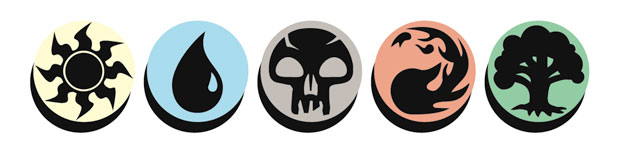

There exists 5 colors in Magic the Gathering, which are white, blue, black, red, and green. Each card can be one of these colors, or a combination of these colors. The color of the card is clearly depicted with the symbols in the top right corner of the card as well as the appropriate color background, as shown below. 

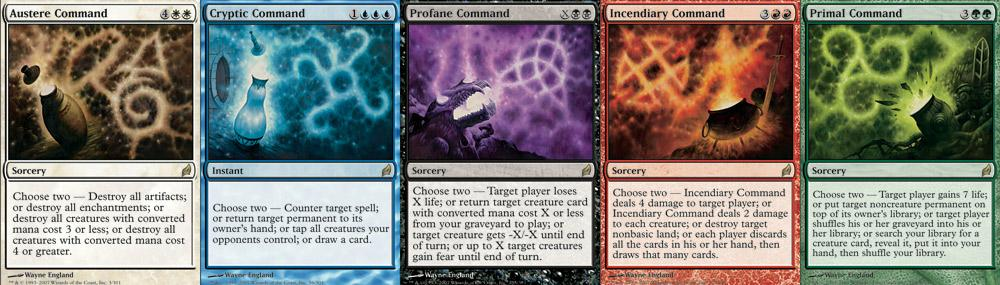

Cards can also have no color at all, and such cards are considered to be colorless.

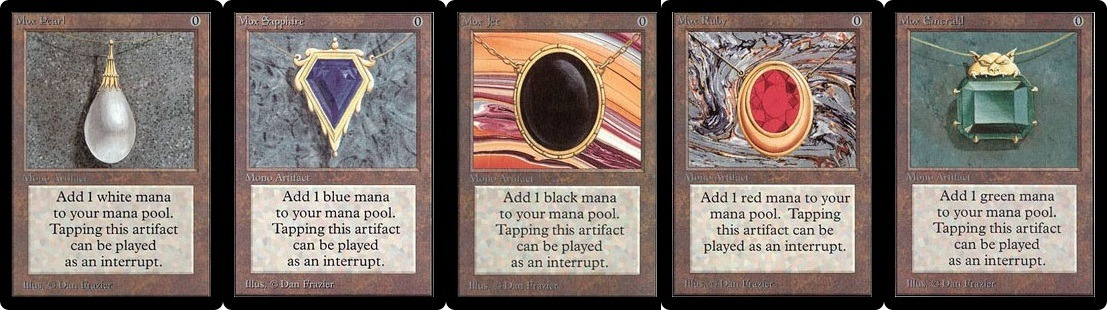

One final consideration is that over the years, the card frames and borders have evolved, so our neural network will have to adapt to this chage.

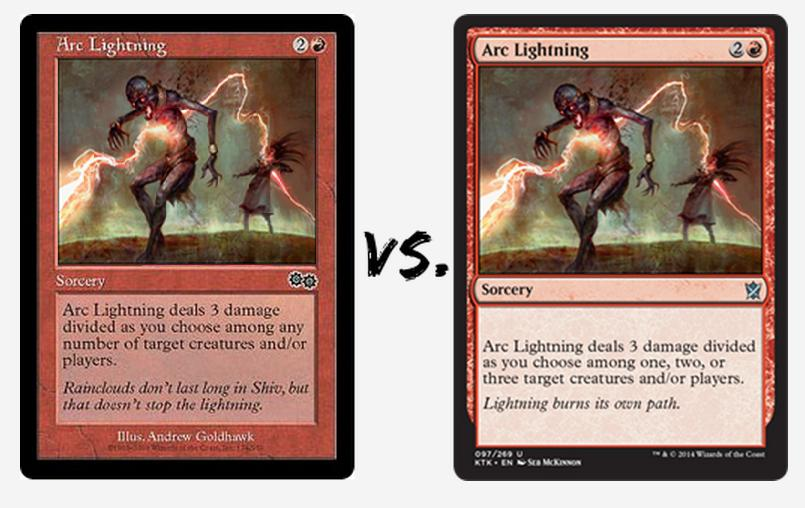

## I.  Data Preparation

The data we are using is bulk data for individual Magic the Gathering cards throughout history. To access this data, we have locally downloaded a bulk data file in json formatting from `https://scryfall.com/docs/api/bulk-data`. The particular dataset we will be using is the `Oracle Cards` dataset, which contains the latest version of each card, thus preventing duplicate cards. Furthermore, this data is conveniently stored in a JSON file, and uncompressed only amounts to `126 MB`. 

### Accessing Data

We can reuse our Project 1 code for reading and cleaning the data as follows.

In [1]:
import json

# Open and read local json
path = 'oracle-cards-20231009090140.json'
with open(path, 'r') as json_file:
    data = json.load(json_file)

In [2]:
# Specify the sets to be removed
specified_sets = ["40k", "who", "clb", "afr", "fj22", "fltr"] 
specified_set_type = ["funny", "memorabilia"]

# Filter out cards from the data
data = [
    card_data for card_data in data 
    if 'normal' in card_data.get('layout', [])                   # remove problematic layouts
    and 'paper' in card_data.get('games', [])                    # remove non-paper cards (ie. online cards)
    and card_data.get('layout', '') != 'token'                   # remove tokens
    and card_data.get('set', '') not in specified_sets           # remove problematic sets
    and card_data.get('set_type', '') not in specified_set_type  # remove problematic set types
]

Let's also make a directory to store the images.

In [15]:
import os

# Create a directory to store the images
data_directory = "magic_data"
os.makedirs(data_directory, exist_ok=True)

### Saving Data

Unlike Project 1, we actually want to use images rather than just text. Because of this, we need to iterate through each card in the database and download the image locally from the url provided. 

In [17]:
import requests

# Iterate through each card in teh data
for card_data in data:
    # Check if the "normal" image is stored for this card
    if "normal" in card_data["image_uris"]:
        # Get the color path from the card color
        if card_data["colors"]:
            color_label = "".join(sorted(card_data["colors"]))
        else:
            color_label = "colorless"
        
        # Create the color directory if it does not exist
        directory_path = os.path.join(data_directory, color_label)
        os.makedirs(directory_path, exist_ok=True)
            
        # Declare the file name and path for the individual card
        file_name = f"{card_data['name']}_normal.jpg"
        file_path = os.path.join(data_directory, color_label, file_name)

        # Request the image from the "normal" image link
        response = requests.get(card_data["image_uris"]["normal"])
        
        # If the response is a success
        if response.status_code == 200:
            # Download the image
            with open(file_path, 'wb') as f:
                f.write(response.content)
            print(f"Image downloaded to {file_path}")
        # Otherwise print an error message
        else:
            print(f"Failed to download image from {card_data['image_uris']['normal']}")

Image downloaded to magic_data/colorless/Static Orb_normal.jpg
Image downloaded to magic_data/U/Sensory Deprivation_normal.jpg
Image downloaded to magic_data/G/Road of Return_normal.jpg
Image downloaded to magic_data/U/Storm Crow_normal.jpg
Image downloaded to magic_data/U/Walking Sponge_normal.jpg
Image downloaded to magic_data/W/Ravnica at War_normal.jpg
Image downloaded to magic_data/BG/Greta, Sweettooth Scourge_normal.jpg
Image downloaded to magic_data/R/Torrent of Fire_normal.jpg
Image downloaded to magic_data/U/Pteramander_normal.jpg
Image downloaded to magic_data/G/Nantuko Elder_normal.jpg
Image downloaded to magic_data/GU/Vedalken Heretic_normal.jpg
Image downloaded to magic_data/U/Waterknot_normal.jpg
Image downloaded to magic_data/B/Ruthless Knave_normal.jpg
Image downloaded to magic_data/G/Hua Tuo, Honored Physician_normal.jpg
Image downloaded to magic_data/G/Veil of Summer_normal.jpg
Image downloaded to magic_data/W/Disposal Mummy_normal.jpg
Image downloaded to magic_data/U

Image downloaded to magic_data/R/Reckless Cohort_normal.jpg
Image downloaded to magic_data/R/Ragefire Hellkite_normal.jpg
Image downloaded to magic_data/U/Giant's Amulet_normal.jpg
Image downloaded to magic_data/B/Minotaur Abomination_normal.jpg
Image downloaded to magic_data/R/Arcbond_normal.jpg
Image downloaded to magic_data/G/Summit Apes_normal.jpg
Image downloaded to magic_data/B/Zulaport Chainmage_normal.jpg
Image downloaded to magic_data/R/Zodiac Goat_normal.jpg
Image downloaded to magic_data/R/Cinder Elemental_normal.jpg
Image downloaded to magic_data/B/Gix's Caress_normal.jpg
Image downloaded to magic_data/B/Cabal Therapy_normal.jpg
Image downloaded to magic_data/colorless/Urborg Volcano_normal.jpg
Image downloaded to magic_data/B/Throttle_normal.jpg
Image downloaded to magic_data/R/Mindclaw Shaman_normal.jpg
Image downloaded to magic_data/R/Ashen Monstrosity_normal.jpg
Image downloaded to magic_data/G/Leafcrown Dryad_normal.jpg
Image downloaded to magic_data/BG/Uurg, Spawn of 

Image downloaded to magic_data/RU/Zaffai, Thunder Conductor_normal.jpg
Image downloaded to magic_data/G/Walker of the Grove_normal.jpg
Image downloaded to magic_data/B/Midnight Entourage_normal.jpg
Image downloaded to magic_data/U/Glimpse of Freedom_normal.jpg
Image downloaded to magic_data/U/Mizzium Skin_normal.jpg
Image downloaded to magic_data/W/Catapult Master_normal.jpg
Image downloaded to magic_data/G/Benefaction of Rhonas_normal.jpg
Image downloaded to magic_data/U/Chief Engineer_normal.jpg
Image downloaded to magic_data/R/Scorching Missile_normal.jpg
Image downloaded to magic_data/colorless/Obelisk of Naya_normal.jpg
Image downloaded to magic_data/U/Coast Watcher_normal.jpg
Image downloaded to magic_data/colorless/Spine of Ish Sah_normal.jpg
Image downloaded to magic_data/colorless/Ancient Den_normal.jpg
Image downloaded to magic_data/U/Research the Deep_normal.jpg
Image downloaded to magic_data/colorless/Zephyr Boots_normal.jpg
Image downloaded to magic_data/W/Angel of Destiny

Image downloaded to magic_data/B/Reckoner's Bargain_normal.jpg
Image downloaded to magic_data/BGU/Titans' Nest_normal.jpg
Image downloaded to magic_data/GR/Hallar, the Firefletcher_normal.jpg
Image downloaded to magic_data/R/Heartlash Cinder_normal.jpg
Image downloaded to magic_data/B/Deadly Rollick_normal.jpg
Image downloaded to magic_data/GR/Yavimaya Barbarian_normal.jpg
Image downloaded to magic_data/W/Soul's Attendant_normal.jpg
Image downloaded to magic_data/R/Mudbutton Torchrunner_normal.jpg
Image downloaded to magic_data/R/Kargan Intimidator_normal.jpg
Image downloaded to magic_data/W/Dragon Scales_normal.jpg
Image downloaded to magic_data/R/Yamabushi's Flame_normal.jpg
Image downloaded to magic_data/G/Rime Dryad_normal.jpg
Image downloaded to magic_data/G/Surging Might_normal.jpg
Image downloaded to magic_data/BG/Ebony Treefolk_normal.jpg
Image downloaded to magic_data/R/Breath of Fire_normal.jpg
Image downloaded to magic_data/W/Immolating Glare_normal.jpg
Image downloaded to m

Image downloaded to magic_data/W/Unruly Mob_normal.jpg
Image downloaded to magic_data/G/Unnatural Restoration_normal.jpg
Image downloaded to magic_data/colorless/Wastes_normal.jpg
Image downloaded to magic_data/W/Bring Down_normal.jpg
Image downloaded to magic_data/R/Ghirapur Aether Grid_normal.jpg
Image downloaded to magic_data/R/Volcanic Offering_normal.jpg
Image downloaded to magic_data/W/Defiant Stand_normal.jpg
Image downloaded to magic_data/W/Elspeth, Sun's Champion_normal.jpg
Image downloaded to magic_data/U/Roost of Drakes_normal.jpg
Image downloaded to magic_data/R/Rampaging War Mammoth_normal.jpg
Image downloaded to magic_data/BRU/Nicol Bolas, Planeswalker_normal.jpg
Image downloaded to magic_data/R/Flame Jab_normal.jpg
Image downloaded to magic_data/G/Feline Sovereign_normal.jpg
Image downloaded to magic_data/U/Merfolk Coralsmith_normal.jpg
Image downloaded to magic_data/B/Revenant_normal.jpg
Image downloaded to magic_data/colorless/Mind Raker_normal.jpg
Image downloaded to 

Image downloaded to magic_data/R/Sarkhan, Fireblood_normal.jpg
Image downloaded to magic_data/R/Rain of Rust_normal.jpg
Image downloaded to magic_data/U/Scholar of Stars_normal.jpg
Image downloaded to magic_data/U/Fortress Crab_normal.jpg
Image downloaded to magic_data/G/Chorus of Might_normal.jpg
Image downloaded to magic_data/W/Blinding Beam_normal.jpg
Image downloaded to magic_data/colorless/Fathom Feeder_normal.jpg
Image downloaded to magic_data/colorless/Skeleton Shard_normal.jpg
Image downloaded to magic_data/B/Subversion_normal.jpg
Image downloaded to magic_data/B/Cemetery Recruitment_normal.jpg
Image downloaded to magic_data/R/Etali, Primal Storm_normal.jpg
Image downloaded to magic_data/R/Kolaghan Stormsinger_normal.jpg
Image downloaded to magic_data/R/War Elemental_normal.jpg
Image downloaded to magic_data/R/Trial of Zeal_normal.jpg
Image downloaded to magic_data/G/Thunderous Debut_normal.jpg
Image downloaded to magic_data/colorless/Fountain of Cho_normal.jpg
Image downloaded

Image downloaded to magic_data/B/Rathi Trapper_normal.jpg
Image downloaded to magic_data/R/Mogg Salvage_normal.jpg
Image downloaded to magic_data/G/Take Down_normal.jpg
Image downloaded to magic_data/BR/Neheb, the Worthy_normal.jpg
Image downloaded to magic_data/G/Swift Warden_normal.jpg
Image downloaded to magic_data/BR/Angrath, the Flame-Chained_normal.jpg
Image downloaded to magic_data/W/Rune of Protection: Blue_normal.jpg
Image downloaded to magic_data/B/Baleful Eidolon_normal.jpg
Image downloaded to magic_data/B/Deadly Grub_normal.jpg
Image downloaded to magic_data/B/Infectious Horror_normal.jpg
Image downloaded to magic_data/G/Fractal Harness_normal.jpg
Image downloaded to magic_data/R/Dwarven Miner_normal.jpg
Image downloaded to magic_data/colorless/Restless Vinestalk_normal.jpg
Image downloaded to magic_data/W/Metallurgeon_normal.jpg
Image downloaded to magic_data/G/Verdant Haven_normal.jpg
Image downloaded to magic_data/G/Elephant Ambush_normal.jpg
Image downloaded to magic_da

Image downloaded to magic_data/RU/Steam Augury_normal.jpg
Image downloaded to magic_data/R/Keldon Vandals_normal.jpg
Image downloaded to magic_data/B/Omen of the Dead_normal.jpg
Image downloaded to magic_data/W/Gravel Slinger_normal.jpg
Image downloaded to magic_data/U/Willbender_normal.jpg
Image downloaded to magic_data/G/Centaur Rootcaster_normal.jpg
Image downloaded to magic_data/U/Perilous Voyage_normal.jpg
Image downloaded to magic_data/B/Razaketh's Rite_normal.jpg
Image downloaded to magic_data/U/One with the Stars_normal.jpg
Image downloaded to magic_data/R/Roar of the Crowd_normal.jpg
Image downloaded to magic_data/B/Incarnation Technique_normal.jpg
Image downloaded to magic_data/B/Gisa's Bidding_normal.jpg
Image downloaded to magic_data/G/Penumbra Kavu_normal.jpg
Image downloaded to magic_data/BW/Identity Crisis_normal.jpg
Image downloaded to magic_data/B/Clawing Torment_normal.jpg
Image downloaded to magic_data/colorless/Thran Lens_normal.jpg
Image downloaded to magic_data/B/

Image downloaded to magic_data/G/Timber Paladin_normal.jpg
Image downloaded to magic_data/colorless/Malachite Talisman_normal.jpg
Image downloaded to magic_data/U/Curiosity Crafter_normal.jpg
Image downloaded to magic_data/colorless/Lithoform Engine_normal.jpg
Image downloaded to magic_data/B/Initiates of the Ebon Hand_normal.jpg
Image downloaded to magic_data/G/Titania's Boon_normal.jpg
Image downloaded to magic_data/W/Benalish Cavalry_normal.jpg
Image downloaded to magic_data/colorless/Ulamog, the Ceaseless Hunger_normal.jpg
Image downloaded to magic_data/R/Dragon's Rage Channeler_normal.jpg
Image downloaded to magic_data/W/Piety_normal.jpg
Image downloaded to magic_data/W/Skyhunter Skirmisher_normal.jpg
Image downloaded to magic_data/B/Urborg Repossession_normal.jpg
Image downloaded to magic_data/colorless/Gearsmith Guardian_normal.jpg
Image downloaded to magic_data/UW/Niambi, Faithful Healer_normal.jpg
Image downloaded to magic_data/B/Life's Finale_normal.jpg
Image downloaded to ma

Image downloaded to magic_data/W/Fasting_normal.jpg
Image downloaded to magic_data/U/Faerie Impostor_normal.jpg
Image downloaded to magic_data/G/Sachi, Daughter of Seshiro_normal.jpg
Image downloaded to magic_data/R/Tibalt's Rager_normal.jpg
Image downloaded to magic_data/colorless/Gallows at Willow Hill_normal.jpg
Image downloaded to magic_data/BR/Lyzolda, the Blood Witch_normal.jpg
Image downloaded to magic_data/R/Igneous Cur_normal.jpg
Image downloaded to magic_data/colorless/Brass Secretary_normal.jpg
Image downloaded to magic_data/B/Custodi Lich_normal.jpg
Image downloaded to magic_data/G/Green Sun's Zenith_normal.jpg
Image downloaded to magic_data/U/Grasp of Phantoms_normal.jpg
Image downloaded to magic_data/R/Krenko's Enforcer_normal.jpg
Image downloaded to magic_data/R/Vulshok Heartstoker_normal.jpg
Image downloaded to magic_data/W/Luminous Guardian_normal.jpg
Image downloaded to magic_data/R/Laccolith Titan_normal.jpg
Image downloaded to magic_data/UW/Yotian Tactician_normal.j

Image downloaded to magic_data/G/Charging Binox_normal.jpg
Image downloaded to magic_data/U/Mind Unbound_normal.jpg
Image downloaded to magic_data/R/Manabarbs_normal.jpg
Image downloaded to magic_data/BG/Gyome, Master Chef_normal.jpg
Image downloaded to magic_data/W/Soraya the Falconer_normal.jpg
Image downloaded to magic_data/B/Rabid Rats_normal.jpg
Image downloaded to magic_data/U/Cryptic Serpent_normal.jpg
Image downloaded to magic_data/B/Force of Despair_normal.jpg
Image downloaded to magic_data/B/Lobelia, Defender of Bag End_normal.jpg
Image downloaded to magic_data/G/Killer Service_normal.jpg
Image downloaded to magic_data/W/Nimbus Wings_normal.jpg
Image downloaded to magic_data/R/Cathartic Reunion_normal.jpg
Image downloaded to magic_data/W/Aven Liberator_normal.jpg
Image downloaded to magic_data/U/Venser, Shaper Savant_normal.jpg
Image downloaded to magic_data/U/Mistform Mutant_normal.jpg
Image downloaded to magic_data/W/Gustcloak Runner_normal.jpg
Image downloaded to magic_dat

Image downloaded to magic_data/G/Groundshaker Sliver_normal.jpg
Image downloaded to magic_data/U/Coral Eel_normal.jpg
Image downloaded to magic_data/colorless/Lumengrid Gargoyle_normal.jpg
Image downloaded to magic_data/B/Abyssal Nightstalker_normal.jpg
Image downloaded to magic_data/B/Misshapen Fiend_normal.jpg
Image downloaded to magic_data/U/Magus of the Future_normal.jpg
Image downloaded to magic_data/BW/Beckon Apparition_normal.jpg
Image downloaded to magic_data/BGRUW/Niv-Mizzet Reborn_normal.jpg
Image downloaded to magic_data/R/Stormwing Dragon_normal.jpg
Image downloaded to magic_data/RW/Lorehold Command_normal.jpg
Image downloaded to magic_data/W/Akroma, Angel of Wrath_normal.jpg
Image downloaded to magic_data/GW/Qasali Pridemage_normal.jpg
Image downloaded to magic_data/R/Goblin Wardriver_normal.jpg
Image downloaded to magic_data/B/Felhide Minotaur_normal.jpg
Image downloaded to magic_data/U/Wall of Wonder_normal.jpg
Image downloaded to magic_data/R/Geistblast_normal.jpg
Image

Image downloaded to magic_data/U/Zephyr Sprite_normal.jpg
Image downloaded to magic_data/W/Soulbound Guardians_normal.jpg
Image downloaded to magic_data/R/Borderland Marauder_normal.jpg
Image downloaded to magic_data/colorless/Imi Statue_normal.jpg
Image downloaded to magic_data/colorless/Halo Scarab_normal.jpg
Image downloaded to magic_data/G/Unnatural Predation_normal.jpg
Image downloaded to magic_data/BU/Unmoored Ego_normal.jpg
Image downloaded to magic_data/R/Frenzied Raider_normal.jpg
Image downloaded to magic_data/colorless/Horizon Spellbomb_normal.jpg
Image downloaded to magic_data/G/Advocate of the Beast_normal.jpg
Image downloaded to magic_data/W/Samite Alchemist_normal.jpg
Image downloaded to magic_data/U/Trade Routes_normal.jpg
Image downloaded to magic_data/BU/Stalking Assassin_normal.jpg
Image downloaded to magic_data/R/Relentless Rohirrim_normal.jpg
Image downloaded to magic_data/W/Aerie Mystics_normal.jpg
Image downloaded to magic_data/R/Marauding Dreadship_normal.jpg
Im

Image downloaded to magic_data/colorless/Altar of Mogis_normal.jpg
Image downloaded to magic_data/B/Razaketh, the Foulblooded_normal.jpg
Image downloaded to magic_data/B/Sovereign's Bite_normal.jpg
Image downloaded to magic_data/G/Tree of Redemption_normal.jpg
Image downloaded to magic_data/BR/Anathemancer_normal.jpg
Image downloaded to magic_data/colorless/Ulamog's Reclaimer_normal.jpg
Image downloaded to magic_data/R/Raging Spirit_normal.jpg
Image downloaded to magic_data/U/Homarid Shaman_normal.jpg
Image downloaded to magic_data/GW/Jasmine Boreal of the Seven_normal.jpg
Image downloaded to magic_data/R/Bonfire of the Damned_normal.jpg
Image downloaded to magic_data/U/Breezekeeper_normal.jpg
Image downloaded to magic_data/B/Dusk Imp_normal.jpg
Image downloaded to magic_data/G/Pistus Strike_normal.jpg
Image downloaded to magic_data/B/Corpse Lunge_normal.jpg
Image downloaded to magic_data/B/Battlefly Swarm_normal.jpg
Image downloaded to magic_data/G/Spellwild Ouphe_normal.jpg
Image dow

Image downloaded to magic_data/W/Angelic Quartermaster_normal.jpg
Image downloaded to magic_data/B/Rune-Scarred Demon_normal.jpg
Image downloaded to magic_data/W/Jawbone Duelist_normal.jpg
Image downloaded to magic_data/BG/Swarm Guildmage_normal.jpg
Image downloaded to magic_data/G/Regenesis_normal.jpg
Image downloaded to magic_data/W/Sigardian Savior_normal.jpg
Image downloaded to magic_data/U/Dewdrop Spy_normal.jpg
Image downloaded to magic_data/U/Stitcher's Apprentice_normal.jpg
Image downloaded to magic_data/BU/Malicious Advice_normal.jpg
Image downloaded to magic_data/BU/Oskar, Rubbish Reclaimer_normal.jpg
Image downloaded to magic_data/W/Benalish Sleeper_normal.jpg
Image downloaded to magic_data/G/Root Cage_normal.jpg
Image downloaded to magic_data/B/Syr Konrad, the Grim_normal.jpg
Image downloaded to magic_data/G/Tyvar Kell_normal.jpg
Image downloaded to magic_data/G/Grizzly Bears_normal.jpg
Image downloaded to magic_data/W/Runed Halo_normal.jpg
Image downloaded to magic_data/W/

Image downloaded to magic_data/R/Cinder Wall_normal.jpg
Image downloaded to magic_data/W/In the Trenches_normal.jpg
Image downloaded to magic_data/GU/Mystic Snake_normal.jpg
Image downloaded to magic_data/B/Grimclaw Bats_normal.jpg
Image downloaded to magic_data/W/Convalescent Care_normal.jpg
Image downloaded to magic_data/G/Ashaya, Soul of the Wild_normal.jpg
Image downloaded to magic_data/RU/Noggle Ransacker_normal.jpg
Image downloaded to magic_data/B/Demonic Gifts_normal.jpg
Image downloaded to magic_data/B/Demonic Taskmaster_normal.jpg
Image downloaded to magic_data/W/Honorable Scout_normal.jpg
Image downloaded to magic_data/R/Countryside Crusher_normal.jpg
Image downloaded to magic_data/U/Replication Technique_normal.jpg
Image downloaded to magic_data/W/Pious Warrior_normal.jpg
Image downloaded to magic_data/W/Sunbond_normal.jpg
Image downloaded to magic_data/B/Fatal Push_normal.jpg
Image downloaded to magic_data/BGRUW/Unite the Coalition_normal.jpg
Image downloaded to magic_data/

Image downloaded to magic_data/R/Dark-Dweller Oracle_normal.jpg
Image downloaded to magic_data/G/Terastodon_normal.jpg
Image downloaded to magic_data/BRU/Marchesa, the Black Rose_normal.jpg
Image downloaded to magic_data/U/Headwater Sentries_normal.jpg
Image downloaded to magic_data/U/Wormfang Manta_normal.jpg
Image downloaded to magic_data/U/Illusionary Terrain_normal.jpg
Image downloaded to magic_data/B/Warpath Ghoul_normal.jpg
Image downloaded to magic_data/GR/Hellkite Hatchling_normal.jpg
Image downloaded to magic_data/colorless/Trigon of Mending_normal.jpg
Image downloaded to magic_data/W/Smuggler's Share_normal.jpg
Image downloaded to magic_data/colorless/Perpetual Timepiece_normal.jpg
Image downloaded to magic_data/colorless/Mystic Sanctuary_normal.jpg
Image downloaded to magic_data/W/Serra's Liturgy_normal.jpg
Image downloaded to magic_data/B/Leech Fanatic_normal.jpg
Image downloaded to magic_data/W/Bennie Bracks, Zoologist_normal.jpg
Image downloaded to magic_data/colorless/Vi

Image downloaded to magic_data/B/Plague Wind_normal.jpg
Image downloaded to magic_data/W/Master of Ceremonies_normal.jpg
Image downloaded to magic_data/colorless/Foundry Inspector_normal.jpg
Image downloaded to magic_data/B/Malicious Affliction_normal.jpg
Image downloaded to magic_data/R/Adamaro, First to Desire_normal.jpg
Image downloaded to magic_data/W/Cage of Hands_normal.jpg
Image downloaded to magic_data/colorless/Pearl Medallion_normal.jpg
Image downloaded to magic_data/colorless/Agent of Acquisitions_normal.jpg
Image downloaded to magic_data/U/Dawnray Archer_normal.jpg
Image downloaded to magic_data/colorless/Gorgon's Head_normal.jpg
Image downloaded to magic_data/colorless/Desert of the Glorified_normal.jpg
Image downloaded to magic_data/BW/Cliffhaven Vampire_normal.jpg
Image downloaded to magic_data/BU/Dimir Doppelganger_normal.jpg
Image downloaded to magic_data/UW/Lyev Skyknight_normal.jpg
Image downloaded to magic_data/BG/Diregraf Rebirth_normal.jpg
Image downloaded to magi

Image downloaded to magic_data/B/Netherborn Phalanx_normal.jpg
Image downloaded to magic_data/R/Magma Pummeler_normal.jpg
Image downloaded to magic_data/B/Liliana's Specter_normal.jpg
Image downloaded to magic_data/GR/Apocalypse Hydra_normal.jpg
Image downloaded to magic_data/W/Kor Line-Slinger_normal.jpg
Image downloaded to magic_data/B/Tainted Pact_normal.jpg
Image downloaded to magic_data/colorless/Thunderstaff_normal.jpg
Image downloaded to magic_data/GR/Tahngarth, First Mate_normal.jpg
Image downloaded to magic_data/W/Professor of Symbology_normal.jpg
Image downloaded to magic_data/U/Glimmerbell_normal.jpg
Image downloaded to magic_data/W/Patrol Signaler_normal.jpg
Image downloaded to magic_data/W/Loran's Escape_normal.jpg
Image downloaded to magic_data/W/Guardian Angel_normal.jpg
Image downloaded to magic_data/W/Acrobatic Maneuver_normal.jpg
Image downloaded to magic_data/W/Noble Stand_normal.jpg
Image downloaded to magic_data/G/Living Hive_normal.jpg
Image downloaded to magic_da

Image downloaded to magic_data/U/Floodchaser_normal.jpg
Image downloaded to magic_data/R/Psychotic Fury_normal.jpg
Image downloaded to magic_data/colorless/Geistcatcher's Rig_normal.jpg
Image downloaded to magic_data/GW/Harmonic Sliver_normal.jpg
Image downloaded to magic_data/R/Melt Terrain_normal.jpg
Image downloaded to magic_data/R/Mana Cache_normal.jpg
Image downloaded to magic_data/W/Field Marshal_normal.jpg
Image downloaded to magic_data/U/Pull from the Deep_normal.jpg
Image downloaded to magic_data/colorless/Pentavus_normal.jpg
Image downloaded to magic_data/B/Blight Pile_normal.jpg
Image downloaded to magic_data/B/Highborn Ghoul_normal.jpg
Image downloaded to magic_data/colorless/Runed Stalactite_normal.jpg
Image downloaded to magic_data/R/Mogg Alarm_normal.jpg
Image downloaded to magic_data/R/Lunk Errant_normal.jpg
Image downloaded to magic_data/W/Mavinda, Students' Advocate_normal.jpg
Image downloaded to magic_data/G/Reckless Amplimancer_normal.jpg
Image downloaded to magic_d

Image downloaded to magic_data/W/Robaran Mercenaries_normal.jpg
Image downloaded to magic_data/B/Mind Rake_normal.jpg
Image downloaded to magic_data/GR/Colossal Might_normal.jpg
Image downloaded to magic_data/W/Bonescythe Sliver_normal.jpg
Image downloaded to magic_data/colorless/Talisman of Indulgence_normal.jpg
Image downloaded to magic_data/R/Raiding Party_normal.jpg
Image downloaded to magic_data/R/Shenanigans_normal.jpg
Image downloaded to magic_data/R/Ravenous Baboons_normal.jpg
Image downloaded to magic_data/colorless/Umezawa's Jitte_normal.jpg
Image downloaded to magic_data/U/Windcaller Aven_normal.jpg
Image downloaded to magic_data/BGRUW/Genju of the Realm_normal.jpg
Image downloaded to magic_data/RU/Izzet Chronarch_normal.jpg
Image downloaded to magic_data/colorless/Decoction Module_normal.jpg
Image downloaded to magic_data/R/Vertigo_normal.jpg
Image downloaded to magic_data/R/Zealous Conscripts_normal.jpg
Image downloaded to magic_data/W/Purify the Grave_normal.jpg
Image dow

Image downloaded to magic_data/G/Assemble the Entmoot_normal.jpg
Image downloaded to magic_data/colorless/Sleeper Dart_normal.jpg
Image downloaded to magic_data/GU/Selkie Hedge-Mage_normal.jpg
Image downloaded to magic_data/BW/Sorin, Solemn Visitor_normal.jpg
Image downloaded to magic_data/B/Nest of Scarabs_normal.jpg
Image downloaded to magic_data/W/When We Were Young_normal.jpg
Image downloaded to magic_data/B/Deepcavern Imp_normal.jpg
Image downloaded to magic_data/R/Slobad, Goblin Tinkerer_normal.jpg
Image downloaded to magic_data/BUW/Obscura Confluence_normal.jpg
Image downloaded to magic_data/R/Ember Shot_normal.jpg
Image downloaded to magic_data/W/Essence Sliver_normal.jpg
Image downloaded to magic_data/B/Rotting Rats_normal.jpg
Image downloaded to magic_data/R/Pyroclastic Elemental_normal.jpg
Image downloaded to magic_data/G/Reckless Pangolin_normal.jpg
Image downloaded to magic_data/U/Ninja of the Deep Hours_normal.jpg
Image downloaded to magic_data/G/Court of Garenbrig_normal

Image downloaded to magic_data/G/Chomping Kavu_normal.jpg
Image downloaded to magic_data/R/Treasure Nabber_normal.jpg
Image downloaded to magic_data/R/Goblin Grenade_normal.jpg
Image downloaded to magic_data/colorless/Vivid Marsh_normal.jpg
Image downloaded to magic_data/colorless/Boreal Shelf_normal.jpg
Image downloaded to magic_data/U/Coral Net_normal.jpg
Image downloaded to magic_data/colorless/Haunted Guardian_normal.jpg
Image downloaded to magic_data/U/Beguiler of Wills_normal.jpg
Image downloaded to magic_data/R/Improvised Club_normal.jpg
Image downloaded to magic_data/W/Shrieking Grotesque_normal.jpg
Image downloaded to magic_data/W/Selfless Samurai_normal.jpg
Image downloaded to magic_data/B/Covenant of Blood_normal.jpg
Image downloaded to magic_data/GRW/Naya Charm_normal.jpg
Image downloaded to magic_data/B/Ragamuffyn_normal.jpg
Image downloaded to magic_data/R/Myojin of Roaring Blades_normal.jpg
Image downloaded to magic_data/B/Boon of Emrakul_normal.jpg
Image downloaded to m

Image downloaded to magic_data/G/Atraxa's Fall_normal.jpg
Image downloaded to magic_data/R/Glitterfang_normal.jpg
Image downloaded to magic_data/BW/Liesa, Shroud of Dusk_normal.jpg
Image downloaded to magic_data/U/Jace, Architect of Thought_normal.jpg
Image downloaded to magic_data/R/Markov Warlord_normal.jpg
Image downloaded to magic_data/GU/Beetleform Mage_normal.jpg
Image downloaded to magic_data/R/Intimidator Initiate_normal.jpg
Image downloaded to magic_data/W/Kitsune Diviner_normal.jpg
Image downloaded to magic_data/BRU/Dark Intimations_normal.jpg
Image downloaded to magic_data/R/Riot Devils_normal.jpg
Image downloaded to magic_data/G/Land Leeches_normal.jpg
Image downloaded to magic_data/R/Thermo-Alchemist_normal.jpg
Image downloaded to magic_data/colorless/Crawlspace_normal.jpg
Image downloaded to magic_data/W/Silent Artisan_normal.jpg
Image downloaded to magic_data/W/Entangling Trap_normal.jpg
Image downloaded to magic_data/colorless/Grim Monolith_normal.jpg
Image downloaded t

Image downloaded to magic_data/U/Hapless Researcher_normal.jpg
Image downloaded to magic_data/G/Blessing of Frost_normal.jpg
Image downloaded to magic_data/B/Victimize_normal.jpg
Image downloaded to magic_data/G/Threats Undetected_normal.jpg
Image downloaded to magic_data/B/Wall of Tombstones_normal.jpg
Image downloaded to magic_data/colorless/Scour from Existence_normal.jpg
Image downloaded to magic_data/G/Stonehoof Chieftain_normal.jpg
Image downloaded to magic_data/G/Hitchclaw Recluse_normal.jpg
Image downloaded to magic_data/R/Makeshift Munitions_normal.jpg
Image downloaded to magic_data/R/Fling_normal.jpg
Image downloaded to magic_data/U/Corruption of Towashi_normal.jpg
Image downloaded to magic_data/BGR/Karrthus, Tyrant of Jund_normal.jpg
Image downloaded to magic_data/B/Carrionette_normal.jpg
Image downloaded to magic_data/GW/Wilt-Leaf Liege_normal.jpg
Image downloaded to magic_data/colorless/Sliversmith_normal.jpg
Image downloaded to magic_data/B/Zhang Liao, Hero of Hefei_norma

Image downloaded to magic_data/B/Moment of Defiance_normal.jpg
Image downloaded to magic_data/W/Seedpod Caretaker_normal.jpg
Image downloaded to magic_data/W/Aven Trooper_normal.jpg
Image downloaded to magic_data/B/Necra Sanctuary_normal.jpg
Image downloaded to magic_data/B/Death of a Thousand Stings_normal.jpg
Image downloaded to magic_data/B/Blacklance Paragon_normal.jpg
Image downloaded to magic_data/colorless/Graven Abomination_normal.jpg
Image downloaded to magic_data/U/Sky Weaver_normal.jpg
Image downloaded to magic_data/B/Minion of the Wastes_normal.jpg
Image downloaded to magic_data/colorless/Golden Egg_normal.jpg
Image downloaded to magic_data/W/Songbirds' Blessing_normal.jpg
Image downloaded to magic_data/G/Ranger's Path_normal.jpg
Image downloaded to magic_data/GUW/Flurry of Wings_normal.jpg
Image downloaded to magic_data/R/Orcish Bloodpainter_normal.jpg
Image downloaded to magic_data/colorless/Levitating Statue_normal.jpg
Image downloaded to magic_data/R/Bulwark_normal.jpg


Image downloaded to magic_data/W/Mtenda Griffin_normal.jpg
Image downloaded to magic_data/R/Crackle with Power_normal.jpg
Image downloaded to magic_data/U/Bruvac the Grandiloquent_normal.jpg
Image downloaded to magic_data/W/Defend the Campus_normal.jpg
Image downloaded to magic_data/B/Jovial Evil_normal.jpg
Image downloaded to magic_data/W/Ancestor's Prophet_normal.jpg
Image downloaded to magic_data/B/Feast of the Unicorn_normal.jpg
Image downloaded to magic_data/W/Rally_normal.jpg
Image downloaded to magic_data/B/Undercity Scrounger_normal.jpg
Image downloaded to magic_data/W/Gerrard Capashen_normal.jpg
Image downloaded to magic_data/G/Beneath the Sands_normal.jpg
Image downloaded to magic_data/BGRUW/Two-Headed Hellkite_normal.jpg
Image downloaded to magic_data/R/Firemantle Mage_normal.jpg
Image downloaded to magic_data/U/Precognitive Perception_normal.jpg
Image downloaded to magic_data/W/Pristine Angel_normal.jpg
Image downloaded to magic_data/colorless/Tower of Calamities_normal.jpg

Image downloaded to magic_data/W/Fated Retribution_normal.jpg
Image downloaded to magic_data/R/Incendiary Sabotage_normal.jpg
Image downloaded to magic_data/B/Damnable Pact_normal.jpg
Image downloaded to magic_data/G/Elvish Harbinger_normal.jpg
Image downloaded to magic_data/W/Excise_normal.jpg
Image downloaded to magic_data/U/Illusionary Servant_normal.jpg
Image downloaded to magic_data/W/Terashi's Verdict_normal.jpg
Image downloaded to magic_data/G/Nantuko Vigilante_normal.jpg
Image downloaded to magic_data/UW/Stormcaller's Boon_normal.jpg
Image downloaded to magic_data/G/Tyrranax_normal.jpg
Image downloaded to magic_data/U/Fascination_normal.jpg
Image downloaded to magic_data/G/Ghor-Clan Savage_normal.jpg
Image downloaded to magic_data/B/Undercity Shade_normal.jpg
Image downloaded to magic_data/B/Annihilate_normal.jpg
Image downloaded to magic_data/G/Aboroth_normal.jpg
Image downloaded to magic_data/UW/Iridescent Angel_normal.jpg
Image downloaded to magic_data/GRW/Obuun, Mul Daya An

Image downloaded to magic_data/U/Shrieking Drake_normal.jpg
Image downloaded to magic_data/B/Maulfist Squad_normal.jpg
Image downloaded to magic_data/G/Bequeathal_normal.jpg
Image downloaded to magic_data/G/Ageless Entity_normal.jpg
Image downloaded to magic_data/colorless/Golem-Skin Gauntlets_normal.jpg
Image downloaded to magic_data/G/Garenbrig Squire_normal.jpg
Image downloaded to magic_data/R/Sabertooth Outrider_normal.jpg
Image downloaded to magic_data/RUW/Jeskai Charm_normal.jpg
Image downloaded to magic_data/RU/Suffocating Blast_normal.jpg
Image downloaded to magic_data/R/Gibbering Fiend_normal.jpg
Image downloaded to magic_data/B/Gloomlance_normal.jpg
Image downloaded to magic_data/G/Nourishing Shoal_normal.jpg
Image downloaded to magic_data/colorless/Aladdin's Lamp_normal.jpg
Image downloaded to magic_data/BGR/Rebuild the City_normal.jpg
Image downloaded to magic_data/W/Sparring Regimen_normal.jpg
Image downloaded to magic_data/U/Court of Cunning_normal.jpg
Image downloaded to

Image downloaded to magic_data/B/Gravebreaker Lamia_normal.jpg
Image downloaded to magic_data/R/Flailing Soldier_normal.jpg
Image downloaded to magic_data/R/Embereth Veteran_normal.jpg
Image downloaded to magic_data/colorless/Orb of Dreams_normal.jpg
Image downloaded to magic_data/GW/Sterling Grove_normal.jpg
Image downloaded to magic_data/R/Widespread Thieving_normal.jpg
Image downloaded to magic_data/G/Moonmist_normal.jpg
Image downloaded to magic_data/R/Retromancer_normal.jpg
Image downloaded to magic_data/U/Stormrider Spirit_normal.jpg
Image downloaded to magic_data/colorless/Remote Farm_normal.jpg
Image downloaded to magic_data/U/Sakashima's Will_normal.jpg
Image downloaded to magic_data/R/Incendiary Oracle_normal.jpg
Image downloaded to magic_data/R/Needletooth Raptor_normal.jpg
Image downloaded to magic_data/R/Weapon Surge_normal.jpg
Image downloaded to magic_data/R/Bloodfire Mentor_normal.jpg
Image downloaded to magic_data/colorless/Kry Shield_normal.jpg
Image downloaded to mag

Image downloaded to magic_data/R/Quest for the Goblin Lord_normal.jpg
Image downloaded to magic_data/B/Merciless Repurposing_normal.jpg
Image downloaded to magic_data/R/Skinbrand Goblin_normal.jpg
Image downloaded to magic_data/R/Avarax_normal.jpg
Image downloaded to magic_data/RW/Aurelia, Exemplar of Justice_normal.jpg
Image downloaded to magic_data/BR/Monstrous Carabid_normal.jpg
Image downloaded to magic_data/B/Twisted Embrace_normal.jpg
Image downloaded to magic_data/R/Harmonic Prodigy_normal.jpg
Image downloaded to magic_data/R/Igneous Inspiration_normal.jpg
Image downloaded to magic_data/colorless/Power Conduit_normal.jpg
Image downloaded to magic_data/G/Rushwood Herbalist_normal.jpg
Image downloaded to magic_data/B/Cruel Reality_normal.jpg
Image downloaded to magic_data/B/Plaguecrafter_normal.jpg
Image downloaded to magic_data/B/Crumbling Ashes_normal.jpg
Image downloaded to magic_data/colorless/Gnottvold Slumbermound_normal.jpg
Image downloaded to magic_data/G/Arachnoform_norma

Image downloaded to magic_data/W/Angelic Guardian_normal.jpg
Image downloaded to magic_data/U/Dive Down_normal.jpg
Image downloaded to magic_data/colorless/Tower Worker_normal.jpg
Image downloaded to magic_data/B/Orcish Medicine_normal.jpg
Image downloaded to magic_data/B/Carrion Crow_normal.jpg
Image downloaded to magic_data/B/Ravenous Rats_normal.jpg
Image downloaded to magic_data/W/Graceblade Artisan_normal.jpg
Image downloaded to magic_data/colorless/Bösium Strip_normal.jpg
Image downloaded to magic_data/U/Regress_normal.jpg
Image downloaded to magic_data/R/Spearpoint Oread_normal.jpg
Image downloaded to magic_data/R/Electrostatic Field_normal.jpg
Image downloaded to magic_data/G/Summoning Trap_normal.jpg
Image downloaded to magic_data/G/Greenwarden of Murasa_normal.jpg
Image downloaded to magic_data/colorless/Roadside Reliquary_normal.jpg
Image downloaded to magic_data/colorless/Reflecting Mirror_normal.jpg
Image downloaded to magic_data/G/Pheres-Band Raiders_normal.jpg
Image down

Image downloaded to magic_data/GR/Boggart Ram-Gang_normal.jpg
Image downloaded to magic_data/G/Vexing Beetle_normal.jpg
Image downloaded to magic_data/W/Duelist of Deep Faith_normal.jpg
Image downloaded to magic_data/R/Explosive Singularity_normal.jpg
Image downloaded to magic_data/R/Thunderblust_normal.jpg
Image downloaded to magic_data/W/Soul Nova_normal.jpg
Image downloaded to magic_data/B/Drag Down_normal.jpg
Image downloaded to magic_data/U/Mischievous Quanar_normal.jpg
Image downloaded to magic_data/G/Evolving Door_normal.jpg
Image downloaded to magic_data/G/Magus of the Candelabra_normal.jpg
Image downloaded to magic_data/B/Raving Dead_normal.jpg
Image downloaded to magic_data/R/Thriving Grubs_normal.jpg
Image downloaded to magic_data/B/Imp's Mischief_normal.jpg
Image downloaded to magic_data/GW/Tolsimir Wolfblood_normal.jpg
Image downloaded to magic_data/G/Mirkwood Channeler_normal.jpg
Image downloaded to magic_data/G/Blossoming Bogbeast_normal.jpg
Image downloaded to magic_dat

Image downloaded to magic_data/G/Hidden Herbalists_normal.jpg
Image downloaded to magic_data/U/Psychic Corrosion_normal.jpg
Image downloaded to magic_data/colorless/Crashing Drawbridge_normal.jpg
Image downloaded to magic_data/RU/Stormchaser Mage_normal.jpg
Image downloaded to magic_data/B/Scourge of Nel Toth_normal.jpg
Image downloaded to magic_data/W/Calciderm_normal.jpg
Image downloaded to magic_data/BR/Rakdos Ickspitter_normal.jpg
Image downloaded to magic_data/G/Groffskithur_normal.jpg
Image downloaded to magic_data/B/Infernal Reckoning_normal.jpg
Image downloaded to magic_data/colorless/Fetid Pools_normal.jpg
Image downloaded to magic_data/W/Teroh's Vanguard_normal.jpg
Image downloaded to magic_data/W/Benalish Knight_normal.jpg
Image downloaded to magic_data/R/Bonethorn Valesk_normal.jpg
Image downloaded to magic_data/G/Balduvian Bears_normal.jpg
Image downloaded to magic_data/B/Pharika's Libation_normal.jpg
Image downloaded to magic_data/colorless/Radiant Grove_normal.jpg
Image 

Image downloaded to magic_data/W/Hopeful Vigil_normal.jpg
Image downloaded to magic_data/W/Master of Diversion_normal.jpg
Image downloaded to magic_data/U/Wavebreak Hippocamp_normal.jpg
Image downloaded to magic_data/colorless/Nemesis Mask_normal.jpg
Image downloaded to magic_data/B/Sidisi, Undead Vizier_normal.jpg
Image downloaded to magic_data/U/Negate_normal.jpg
Image downloaded to magic_data/U/Phyrexian Metamorph_normal.jpg
Image downloaded to magic_data/colorless/Witness the End_normal.jpg
Image downloaded to magic_data/U/Mana Chains_normal.jpg
Image downloaded to magic_data/W/Sunhome Stalwart_normal.jpg
Image downloaded to magic_data/colorless/Lavaclaw Reaches_normal.jpg
Image downloaded to magic_data/W/Rising Populace_normal.jpg
Image downloaded to magic_data/B/Pitiless Vizier_normal.jpg
Image downloaded to magic_data/W/Kiyomaro, First to Stand_normal.jpg
Image downloaded to magic_data/RW/Wake the Past_normal.jpg
Image downloaded to magic_data/BW/Treasury Thrull_normal.jpg
Image

Image downloaded to magic_data/G/Mirran Mettle_normal.jpg
Image downloaded to magic_data/R/Sanguine Statuette_normal.jpg
Image downloaded to magic_data/U/Era of Innovation_normal.jpg
Image downloaded to magic_data/B/Fear_normal.jpg
Image downloaded to magic_data/colorless/Thermal Navigator_normal.jpg
Image downloaded to magic_data/W/Damning Verdict_normal.jpg
Image downloaded to magic_data/GU/Galloping Lizrog_normal.jpg
Image downloaded to magic_data/R/Vandalblast_normal.jpg
Image downloaded to magic_data/W/Lady of Laughter_normal.jpg
Image downloaded to magic_data/R/Goblin Mountaineer_normal.jpg
Image downloaded to magic_data/R/Visions of Ruin_normal.jpg
Image downloaded to magic_data/G/Iwamori of the Open Fist_normal.jpg
Image downloaded to magic_data/W/Rhoda, Geist Avenger_normal.jpg
Image downloaded to magic_data/colorless/Alchemist's Refuge_normal.jpg
Image downloaded to magic_data/RW/Forth Eorlingas!_normal.jpg
Image downloaded to magic_data/G/Ravenous Lindwurm_normal.jpg
Image d

Image downloaded to magic_data/B/Horrifying Revelation_normal.jpg
Image downloaded to magic_data/G/Gristleback_normal.jpg
Image downloaded to magic_data/B/Sorin's Guide_normal.jpg
Image downloaded to magic_data/W/Restoration Specialist_normal.jpg
Image downloaded to magic_data/W/Pack Leader_normal.jpg
Image downloaded to magic_data/B/Rat Out_normal.jpg
Image downloaded to magic_data/U/Machine Over Matter_normal.jpg
Image downloaded to magic_data/U/Mysteries of the Deep_normal.jpg
Image downloaded to magic_data/R/Ardent Dustspeaker_normal.jpg
Image downloaded to magic_data/B/Nightshade Assassin_normal.jpg
Image downloaded to magic_data/colorless/Lucky Clover_normal.jpg
Image downloaded to magic_data/R/Ragavan, Nimble Pilferer_normal.jpg
Image downloaded to magic_data/BR/Fatal Grudge_normal.jpg
Image downloaded to magic_data/R/Experimental Frenzy_normal.jpg
Image downloaded to magic_data/W/Angelic Favor_normal.jpg
Image downloaded to magic_data/R/Blind-Spot Giant_normal.jpg
Image downloa

Image downloaded to magic_data/G/Oath of the Ancient Wood_normal.jpg
Image downloaded to magic_data/G/Seek the Wilds_normal.jpg
Image downloaded to magic_data/RU/Baral and Kari Zev_normal.jpg
Image downloaded to magic_data/colorless/Murk Strider_normal.jpg
Image downloaded to magic_data/UW/Righteous Authority_normal.jpg
Image downloaded to magic_data/G/Nantuko Shaman_normal.jpg
Image downloaded to magic_data/G/Wayward Swordtooth_normal.jpg
Image downloaded to magic_data/G/Smoke Teller_normal.jpg
Image downloaded to magic_data/BRU/Grixis Charm_normal.jpg
Image downloaded to magic_data/R/Lava Axe_normal.jpg
Image downloaded to magic_data/colorless/Fortified Beachhead_normal.jpg
Image downloaded to magic_data/B/Ayara, First of Locthwain_normal.jpg
Image downloaded to magic_data/colorless/Bane of Bala Ged_normal.jpg
Image downloaded to magic_data/W/Topple the Statue_normal.jpg
Image downloaded to magic_data/B/Poisonbelly Ogre_normal.jpg
Image downloaded to magic_data/U/Spell Snare_normal.j

Image downloaded to magic_data/G/Jolrael's Centaur_normal.jpg
Image downloaded to magic_data/W/Serra Redeemer_normal.jpg
Image downloaded to magic_data/RW/Nahiri, Heir of the Ancients_normal.jpg
Image downloaded to magic_data/R/Emberwilde Augur_normal.jpg
Image downloaded to magic_data/G/Barbary Apes_normal.jpg
Image downloaded to magic_data/B/Underworld Connections_normal.jpg
Image downloaded to magic_data/U/Keeper of the Nine Gales_normal.jpg
Image downloaded to magic_data/BG/Shaman of the Pack_normal.jpg
Image downloaded to magic_data/BR/Spawn of Rix Maadi_normal.jpg
Image downloaded to magic_data/B/Black Poplar Shaman_normal.jpg
Image downloaded to magic_data/W/Encircling Fissure_normal.jpg
Image downloaded to magic_data/U/Mechanized Production_normal.jpg
Image downloaded to magic_data/G/Wrap in Vigor_normal.jpg
Image downloaded to magic_data/G/Bassara Tower Archer_normal.jpg
Image downloaded to magic_data/W/Soltari Crusader_normal.jpg
Image downloaded to magic_data/B/Ghoulish Proc

Image downloaded to magic_data/colorless/Trigon of Rage_normal.jpg
Image downloaded to magic_data/W/Ghalma's Warden_normal.jpg
Image downloaded to magic_data/G/Gatherer of Graces_normal.jpg
Image downloaded to magic_data/GW/Torsten, Founder of Benalia_normal.jpg
Image downloaded to magic_data/R/Seismic Rupture_normal.jpg
Image downloaded to magic_data/BRU/Maestros Charm_normal.jpg
Image downloaded to magic_data/W/Guard Duty_normal.jpg
Image downloaded to magic_data/G/Tempting Licid_normal.jpg
Image downloaded to magic_data/G/Galadhrim Ambush_normal.jpg
Image downloaded to magic_data/G/Wild Elephant_normal.jpg
Image downloaded to magic_data/colorless/Surge Node_normal.jpg
Image downloaded to magic_data/G/Deepwood Tantiv_normal.jpg
Image downloaded to magic_data/U/Keeper of the Cadence_normal.jpg
Image downloaded to magic_data/R/March of Reckless Joy_normal.jpg
Image downloaded to magic_data/G/Silhana Starfletcher_normal.jpg
Image downloaded to magic_data/B/Knight of the Ebon Legion_norm

Image downloaded to magic_data/B/Spined Fluke_normal.jpg
Image downloaded to magic_data/U/Somber Hoverguard_normal.jpg
Image downloaded to magic_data/B/Nyxathid_normal.jpg
Image downloaded to magic_data/B/Finishing Blow_normal.jpg
Image downloaded to magic_data/R/Blinding Flare_normal.jpg
Image downloaded to magic_data/W/Sunlance_normal.jpg
Image downloaded to magic_data/BW/Merciless Eviction_normal.jpg
Image downloaded to magic_data/B/Desecrated Earth_normal.jpg
Image downloaded to magic_data/U/Deceiver Exarch_normal.jpg
Image downloaded to magic_data/BR/Manaforge Cinder_normal.jpg
Image downloaded to magic_data/R/Earth Elemental_normal.jpg
Image downloaded to magic_data/colorless/Dominator Drone_normal.jpg
Image downloaded to magic_data/R/Frillscare Mentor_normal.jpg
Image downloaded to magic_data/RU/Squee's Revenge_normal.jpg
Image downloaded to magic_data/colorless/Amaranthine Wall_normal.jpg
Image downloaded to magic_data/G/Savage Punch_normal.jpg
Image downloaded to magic_data/R/

Image downloaded to magic_data/colorless/Waterveil Cavern_normal.jpg
Image downloaded to magic_data/B/Pit Imp_normal.jpg
Image downloaded to magic_data/W/Silverstorm Samurai_normal.jpg
Image downloaded to magic_data/B/Xander's Pact_normal.jpg
Image downloaded to magic_data/BR/Riot Spikes_normal.jpg
Image downloaded to magic_data/colorless/Sejiri Steppe_normal.jpg
Image downloaded to magic_data/G/Fairgrounds Trumpeter_normal.jpg
Image downloaded to magic_data/R/Yamabushi's Storm_normal.jpg
Image downloaded to magic_data/U/Anchor to the Aether_normal.jpg
Image downloaded to magic_data/U/Flash_normal.jpg
Image downloaded to magic_data/B/Onyx Goblet_normal.jpg
Image downloaded to magic_data/B/Mire's Toll_normal.jpg
Image downloaded to magic_data/RW/Akiri, Line-Slinger_normal.jpg
Image downloaded to magic_data/U/Aethersnipe_normal.jpg
Image downloaded to magic_data/colorless/Riot Gear_normal.jpg
Image downloaded to magic_data/colorless/Boarded Window_normal.jpg
Image downloaded to magic_dat

Image downloaded to magic_data/B/Evil Eye of Orms-by-Gore_normal.jpg
Image downloaded to magic_data/BR/Avatar of Discord_normal.jpg
Image downloaded to magic_data/R/Rimescale Dragon_normal.jpg
Image downloaded to magic_data/U/Vedalken Plotter_normal.jpg
Image downloaded to magic_data/W/God-Pharaoh's Faithful_normal.jpg
Image downloaded to magic_data/U/Knights of Dol Amroth_normal.jpg
Image downloaded to magic_data/G/Snowblind_normal.jpg
Image downloaded to magic_data/G/Retreat to Kazandu_normal.jpg
Image downloaded to magic_data/BU/Lim-Dûl's Vault_normal.jpg
Image downloaded to magic_data/W/Kor Celebrant_normal.jpg
Image downloaded to magic_data/G/Wild Might_normal.jpg
Image downloaded to magic_data/G/Thornscape Familiar_normal.jpg
Image downloaded to magic_data/colorless/Obelisk of Bant_normal.jpg
Image downloaded to magic_data/W/Elspeth, Undaunted Hero_normal.jpg
Image downloaded to magic_data/R/Dust Corona_normal.jpg
Image downloaded to magic_data/BG/Golgari Germination_normal.jpg
I

Image downloaded to magic_data/B/Spiteful Bully_normal.jpg
Image downloaded to magic_data/colorless/Alloy Golem_normal.jpg
Image downloaded to magic_data/G/Season of Renewal_normal.jpg
Image downloaded to magic_data/W/Sungold Sentinel_normal.jpg
Image downloaded to magic_data/U/Moonbow Illusionist_normal.jpg
Image downloaded to magic_data/B/Filth_normal.jpg
Image downloaded to magic_data/B/Grim Affliction_normal.jpg
Image downloaded to magic_data/G/Plated Crusher_normal.jpg
Image downloaded to magic_data/G/Crack Open_normal.jpg
Image downloaded to magic_data/U/Cephalid Looter_normal.jpg
Image downloaded to magic_data/U/Jace, Arcane Strategist_normal.jpg
Image downloaded to magic_data/W/Conclave Equenaut_normal.jpg
Image downloaded to magic_data/W/Savior of the Sleeping_normal.jpg
Image downloaded to magic_data/colorless/Ring of Valkas_normal.jpg
Image downloaded to magic_data/colorless/Lurking Automaton_normal.jpg
Image downloaded to magic_data/BU/Flooded Woodlands_normal.jpg
Image dow

Image downloaded to magic_data/BR/Hurl Through Hell_normal.jpg
Image downloaded to magic_data/W/Force of Virtue_normal.jpg
Image downloaded to magic_data/G/Skyshroud Archer_normal.jpg
Image downloaded to magic_data/colorless/Searchlight Companion_normal.jpg
Image downloaded to magic_data/W/Shriek Raptor_normal.jpg
Image downloaded to magic_data/B/Undead Butler_normal.jpg
Image downloaded to magic_data/R/Spur Grappler_normal.jpg
Image downloaded to magic_data/W/Infantry Veteran_normal.jpg
Image downloaded to magic_data/U/Conjured Currency_normal.jpg
Image downloaded to magic_data/RU/Marauding Looter_normal.jpg
Image downloaded to magic_data/U/Flitterstep Eidolon_normal.jpg
Image downloaded to magic_data/R/Tremor_normal.jpg
Image downloaded to magic_data/W/Stoic Farmer_normal.jpg
Image downloaded to magic_data/colorless/Artificer's Dragon_normal.jpg
Image downloaded to magic_data/colorless/Tide Drifter_normal.jpg
Image downloaded to magic_data/U/Broodstar_normal.jpg
Image downloaded to m

Image downloaded to magic_data/G/Elven Bow_normal.jpg
Image downloaded to magic_data/R/Collective Defiance_normal.jpg
Image downloaded to magic_data/colorless/Grim Poppet_normal.jpg
Image downloaded to magic_data/colorless/Snapsail Glider_normal.jpg
Image downloaded to magic_data/B/Krovikan Elementalist_normal.jpg
Image downloaded to magic_data/B/Urgoros, the Empty One_normal.jpg
Image downloaded to magic_data/U/Hakim, Loreweaver_normal.jpg
Image downloaded to magic_data/GR/Gallia of the Endless Dance_normal.jpg
Image downloaded to magic_data/G/Aggressive Urge_normal.jpg
Image downloaded to magic_data/G/Whirling Dervish_normal.jpg
Image downloaded to magic_data/W/Jötun Grunt_normal.jpg
Image downloaded to magic_data/R/Otherworldly Outburst_normal.jpg
Image downloaded to magic_data/U/Haughty Djinn_normal.jpg
Image downloaded to magic_data/W/Ojutai Exemplars_normal.jpg
Image downloaded to magic_data/W/Sheltering Prayers_normal.jpg
Image downloaded to magic_data/colorless/Purging Scythe_n

Image downloaded to magic_data/BW/Ashen Rider_normal.jpg
Image downloaded to magic_data/GU/Gandalf, Westward Voyager_normal.jpg
Image downloaded to magic_data/G/Erithizon_normal.jpg
Image downloaded to magic_data/colorless/Drill-Skimmer_normal.jpg
Image downloaded to magic_data/G/Wrenn and Realmbreaker_normal.jpg
Image downloaded to magic_data/G/Arbor Elf_normal.jpg
Image downloaded to magic_data/B/Crypt Cobra_normal.jpg
Image downloaded to magic_data/colorless/Trip Noose_normal.jpg
Image downloaded to magic_data/G/Nessian Wanderer_normal.jpg
Image downloaded to magic_data/colorless/Voyager Staff_normal.jpg
Image downloaded to magic_data/BR/Azra Oddsmaker_normal.jpg
Image downloaded to magic_data/colorless/Bronze Bombshell_normal.jpg
Image downloaded to magic_data/R/Dromosaur_normal.jpg
Image downloaded to magic_data/colorless/Lorehold Campus_normal.jpg
Image downloaded to magic_data/R/Goblin Medics_normal.jpg
Image downloaded to magic_data/B/Forced March_normal.jpg
Image downloaded to

Image downloaded to magic_data/RW/Arrows of Justice_normal.jpg
Image downloaded to magic_data/GW/Nature's Chant_normal.jpg
Image downloaded to magic_data/colorless/Belbe's Portal_normal.jpg
Image downloaded to magic_data/BGU/Sultai Charm_normal.jpg
Image downloaded to magic_data/colorless/Tolaria West_normal.jpg
Image downloaded to magic_data/G/Wary Okapi_normal.jpg
Image downloaded to magic_data/R/Opportunistic Dragon_normal.jpg
Image downloaded to magic_data/U/Vivisection_normal.jpg
Image downloaded to magic_data/R/Satyr's Cunning_normal.jpg
Image downloaded to magic_data/W/Drogskol Shieldmate_normal.jpg
Image downloaded to magic_data/BG/Pitiless Gorgon_normal.jpg
Image downloaded to magic_data/colorless/Soul Foundry_normal.jpg
Image downloaded to magic_data/BR/Mayhem Devil_normal.jpg
Image downloaded to magic_data/B/Ichor Drinker_normal.jpg
Image downloaded to magic_data/colorless/Aetherworks Marvel_normal.jpg
Image downloaded to magic_data/G/Crabapple Cohort_normal.jpg
Image downlo

Image downloaded to magic_data/U/Dwindle_normal.jpg
Image downloaded to magic_data/U/Mizzium Meddler_normal.jpg
Image downloaded to magic_data/W/Archon of Sun's Grace_normal.jpg
Image downloaded to magic_data/B/Witch Engine_normal.jpg
Image downloaded to magic_data/colorless/Traveler's Amulet_normal.jpg
Image downloaded to magic_data/W/Blessed Alliance_normal.jpg
Image downloaded to magic_data/colorless/Orazca Relic_normal.jpg
Image downloaded to magic_data/B/Gloom Surgeon_normal.jpg
Image downloaded to magic_data/W/Aven Cloudchaser_normal.jpg
Image downloaded to magic_data/colorless/Darksteel Garrison_normal.jpg
Image downloaded to magic_data/W/Gust Walker_normal.jpg
Image downloaded to magic_data/G/Steely Resolve_normal.jpg
Image downloaded to magic_data/R/Goblin Grappler_normal.jpg
Image downloaded to magic_data/U/Oneirophage_normal.jpg
Image downloaded to magic_data/U/Nyxborn Seaguard_normal.jpg
Image downloaded to magic_data/GU/Tawnos, the Toymaker_normal.jpg
Image downloaded to m

Image downloaded to magic_data/R/Coalborn Entity_normal.jpg
Image downloaded to magic_data/U/Riptide Shapeshifter_normal.jpg
Image downloaded to magic_data/G/Satyr Grovedancer_normal.jpg
Image downloaded to magic_data/R/Cleaver Riot_normal.jpg
Image downloaded to magic_data/W/Cenn's Enlistment_normal.jpg
Image downloaded to magic_data/G/Peema Aether-Seer_normal.jpg
Image downloaded to magic_data/B/Doom Whisperer_normal.jpg
Image downloaded to magic_data/W/Otherworldly Journey_normal.jpg
Image downloaded to magic_data/R/Goblin Game_normal.jpg
Image downloaded to magic_data/RW/Scourge of the Nobilis_normal.jpg
Image downloaded to magic_data/W/Oppressive Rays_normal.jpg
Image downloaded to magic_data/G/Cavern Thoctar_normal.jpg
Image downloaded to magic_data/G/Harrier Naga_normal.jpg
Image downloaded to magic_data/B/Predator's Gambit_normal.jpg
Image downloaded to magic_data/G/Display of Dominance_normal.jpg
Image downloaded to magic_data/UW/Filigree Angel_normal.jpg
Image downloaded to m

Image downloaded to magic_data/G/Multani, Yavimaya's Avatar_normal.jpg
Image downloaded to magic_data/G/Rite of Passage_normal.jpg
Image downloaded to magic_data/R/Heckling Fiends_normal.jpg
Image downloaded to magic_data/R/Battle Hymn_normal.jpg
Image downloaded to magic_data/colorless/Cathedral of Serra_normal.jpg
Image downloaded to magic_data/colorless/Sphinx-Bone Wand_normal.jpg
Image downloaded to magic_data/BUW/Elenda and Azor_normal.jpg
Image downloaded to magic_data/colorless/Shire Scarecrow_normal.jpg
Image downloaded to magic_data/W/Valiant Endeavor_normal.jpg
Image downloaded to magic_data/G/Avenger of Zendikar_normal.jpg
Image downloaded to magic_data/B/Torment of Scarabs_normal.jpg
Image downloaded to magic_data/U/Cloudseeder_normal.jpg
Image downloaded to magic_data/W/Honor Guard_normal.jpg
Image downloaded to magic_data/G/Tempt with Discovery_normal.jpg
Image downloaded to magic_data/B/Insidious Dreams_normal.jpg
Image downloaded to magic_data/BU/Thought Erasure_normal.

Image downloaded to magic_data/R/Dual Casting_normal.jpg
Image downloaded to magic_data/W/Spectral Grasp_normal.jpg
Image downloaded to magic_data/W/Ursine Fylgja_normal.jpg
Image downloaded to magic_data/W/Starlight Invoker_normal.jpg
Image downloaded to magic_data/BGRUW/Last Stand_normal.jpg
Image downloaded to magic_data/B/Night Clubber_normal.jpg
Image downloaded to magic_data/B/Deathknell Kami_normal.jpg
Image downloaded to magic_data/W/Patron of the Valiant_normal.jpg
Image downloaded to magic_data/U/Lay Bare_normal.jpg
Image downloaded to magic_data/R/Distemper of the Blood_normal.jpg
Image downloaded to magic_data/B/Consuming Aetherborn_normal.jpg
Image downloaded to magic_data/W/Kelsinko Ranger_normal.jpg
Image downloaded to magic_data/B/Stench of Decay_normal.jpg
Image downloaded to magic_data/W/Siege Veteran_normal.jpg
Image downloaded to magic_data/B/Predators' Hour_normal.jpg
Image downloaded to magic_data/BGW/Overgrown Estate_normal.jpg
Image downloaded to magic_data/R/Ra

Image downloaded to magic_data/UW/Will, Scion of Peace_normal.jpg
Image downloaded to magic_data/U/Brine Giant_normal.jpg
Image downloaded to magic_data/RU/The Royal Scions_normal.jpg
Image downloaded to magic_data/G/Bull Elephant_normal.jpg
Image downloaded to magic_data/U/Coral Merfolk_normal.jpg
Image downloaded to magic_data/W/Shieldmate's Blessing_normal.jpg
Image downloaded to magic_data/B/Skirk Ridge Exhumer_normal.jpg
Image downloaded to magic_data/B/Champion of Stray Souls_normal.jpg
Image downloaded to magic_data/U/Crush of Tentacles_normal.jpg
Image downloaded to magic_data/GW/Othelm, Sigardian Outcast_normal.jpg
Image downloaded to magic_data/U/Misstep_normal.jpg
Image downloaded to magic_data/BUW/Yennett, Cryptic Sovereign_normal.jpg
Image downloaded to magic_data/G/Ridgescale Tusker_normal.jpg
Image downloaded to magic_data/B/Emissary of Despair_normal.jpg
Image downloaded to magic_data/BRU/Sol'Kanar the Tainted_normal.jpg
Image downloaded to magic_data/B/Infernal Kirin_n

Image downloaded to magic_data/colorless/Panoptic Mirror_normal.jpg
Image downloaded to magic_data/R/Goblin Piker_normal.jpg
Image downloaded to magic_data/R/Spark Elemental_normal.jpg
Image downloaded to magic_data/U/Advice from the Fae_normal.jpg
Image downloaded to magic_data/G/Duel for Dominance_normal.jpg
Image downloaded to magic_data/BG/Deadbridge Chant_normal.jpg
Image downloaded to magic_data/B/Choice of Damnations_normal.jpg
Image downloaded to magic_data/colorless/Omarthis, Ghostfire Initiate_normal.jpg
Image downloaded to magic_data/W/Hope and Glory_normal.jpg
Image downloaded to magic_data/BW/Life Insurance_normal.jpg
Image downloaded to magic_data/G/Fyndhorn Elder_normal.jpg
Image downloaded to magic_data/G/Deeproot Champion_normal.jpg
Image downloaded to magic_data/G/Shelkin Brownie_normal.jpg
Image downloaded to magic_data/W/Angelic Exaltation_normal.jpg
Image downloaded to magic_data/R/Orazca Raptor_normal.jpg
Image downloaded to magic_data/B/Bog Wraith_normal.jpg
Imag

Image downloaded to magic_data/B/Species Specialist_normal.jpg
Image downloaded to magic_data/G/Hour of Promise_normal.jpg
Image downloaded to magic_data/R/Ghitu Journeymage_normal.jpg
Image downloaded to magic_data/G/Wild Beastmaster_normal.jpg
Image downloaded to magic_data/B/Sicken_normal.jpg
Image downloaded to magic_data/R/Goblin Kaboomist_normal.jpg
Image downloaded to magic_data/R/Chandler_normal.jpg
Image downloaded to magic_data/U/Will of the Naga_normal.jpg
Image downloaded to magic_data/B/Phylactery Lich_normal.jpg
Image downloaded to magic_data/W/Flight of Equenauts_normal.jpg
Image downloaded to magic_data/B/Anointed Deacon_normal.jpg
Image downloaded to magic_data/R/Fiery Emancipation_normal.jpg
Image downloaded to magic_data/GR/Vengeful Rebirth_normal.jpg
Image downloaded to magic_data/colorless/The Immortal Sun_normal.jpg
Image downloaded to magic_data/U/Mothdust Changeling_normal.jpg
Image downloaded to magic_data/U/Sai, Master Thopterist_normal.jpg
Image downloaded to

Image downloaded to magic_data/W/Kabuto Moth_normal.jpg
Image downloaded to magic_data/G/Nurturing Licid_normal.jpg
Image downloaded to magic_data/G/Bog Gnarr_normal.jpg
Image downloaded to magic_data/G/Warm Welcome_normal.jpg
Image downloaded to magic_data/W/Detention Vortex_normal.jpg
Image downloaded to magic_data/G/Alpha Authority_normal.jpg
Image downloaded to magic_data/G/Willow Faerie_normal.jpg
Image downloaded to magic_data/GU/Overbeing of Myth_normal.jpg
Image downloaded to magic_data/G/Blossom Dryad_normal.jpg
Image downloaded to magic_data/UW/Reflector Mage_normal.jpg
Image downloaded to magic_data/B/Whip of Erebos_normal.jpg
Image downloaded to magic_data/W/Dearly Departed_normal.jpg
Image downloaded to magic_data/colorless/Chromatic Lantern_normal.jpg
Image downloaded to magic_data/R/Oath of Chandra_normal.jpg
Image downloaded to magic_data/BW/Shadewing Laureate_normal.jpg
Image downloaded to magic_data/W/Blinding Mage_normal.jpg
Image downloaded to magic_data/B/March of 

Image downloaded to magic_data/G/Vivien, Nature's Avenger_normal.jpg
Image downloaded to magic_data/G/Still Life_normal.jpg
Image downloaded to magic_data/colorless/Vestige of Emrakul_normal.jpg
Image downloaded to magic_data/G/Korozda Monitor_normal.jpg
Image downloaded to magic_data/W/Sheltering Light_normal.jpg
Image downloaded to magic_data/U/Jace, the Living Guildpact_normal.jpg
Image downloaded to magic_data/UW/Plumes of Peace_normal.jpg
Image downloaded to magic_data/GR/Dire-Strain Rampage_normal.jpg
Image downloaded to magic_data/colorless/Scrapwork Rager_normal.jpg
Image downloaded to magic_data/B/Cabal Surgeon_normal.jpg
Image downloaded to magic_data/B/Kelinore Bat_normal.jpg
Image downloaded to magic_data/BU/Glimpse the Unthinkable_normal.jpg
Image downloaded to magic_data/W/Hope Against Hope_normal.jpg
Image downloaded to magic_data/B/Eye Collector_normal.jpg
Image downloaded to magic_data/colorless/Mishra's Self-Replicator_normal.jpg
Image downloaded to magic_data/colorle

Image downloaded to magic_data/G/Vow of Wildness_normal.jpg
Image downloaded to magic_data/U/Reality Heist_normal.jpg
Image downloaded to magic_data/W/Norn's Wellspring_normal.jpg
Image downloaded to magic_data/W/Valor in Akros_normal.jpg
Image downloaded to magic_data/U/Mantle of Tides_normal.jpg
Image downloaded to magic_data/B/Mer-Ek Nightblade_normal.jpg
Image downloaded to magic_data/B/Contaminated Bond_normal.jpg
Image downloaded to magic_data/U/Clash of Wills_normal.jpg
Image downloaded to magic_data/R/Careless Celebrant_normal.jpg
Image downloaded to magic_data/B/Keening Banshee_normal.jpg
Image downloaded to magic_data/U/Deluxe Dragster_normal.jpg
Image downloaded to magic_data/BU/Dimir Cutpurse_normal.jpg
Image downloaded to magic_data/colorless/Isolation Cell_normal.jpg
Image downloaded to magic_data/B/Grisly Ritual_normal.jpg
Image downloaded to magic_data/G/Ixalli's Diviner_normal.jpg
Image downloaded to magic_data/W/Voiceless Spirit_normal.jpg
Image downloaded to magic_da

Image downloaded to magic_data/R/Rograkh, Son of Rohgahh_normal.jpg
Image downloaded to magic_data/R/Reckless Impulse_normal.jpg
Image downloaded to magic_data/U/Mask of the Schemer_normal.jpg
Image downloaded to magic_data/G/Silk Net_normal.jpg
Image downloaded to magic_data/W/Hallowed Spiritkeeper_normal.jpg
Image downloaded to magic_data/G/Woodland Bellower_normal.jpg
Image downloaded to magic_data/U/Power Taint_normal.jpg
Image downloaded to magic_data/W/Wall of Mourning_normal.jpg
Image downloaded to magic_data/G/Overgrown Battlement_normal.jpg
Image downloaded to magic_data/colorless/Hematite Talisman_normal.jpg
Image downloaded to magic_data/colorless/The Mana Rig_normal.jpg
Image downloaded to magic_data/G/Aura Gnarlid_normal.jpg
Image downloaded to magic_data/U/Vodalian Hypnotist_normal.jpg
Image downloaded to magic_data/R/Disorder_normal.jpg
Image downloaded to magic_data/U/Psychic Trance_normal.jpg
Image downloaded to magic_data/R/Tooth and Claw_normal.jpg
Image downloaded t

Image downloaded to magic_data/B/Tenacious Underdog_normal.jpg
Image downloaded to magic_data/R/Melting_normal.jpg
Image downloaded to magic_data/U/Rise and Shine_normal.jpg
Image downloaded to magic_data/BR/Stromkirk Captain_normal.jpg
Image downloaded to magic_data/W/Ironwright's Cleansing_normal.jpg
Image downloaded to magic_data/U/Harbor Serpent_normal.jpg
Image downloaded to magic_data/G/Nemesis of Mortals_normal.jpg
Image downloaded to magic_data/RU/Crackleburr_normal.jpg
Image downloaded to magic_data/G/Dosan's Oldest Chant_normal.jpg
Image downloaded to magic_data/BG/Drown in Filth_normal.jpg
Image downloaded to magic_data/RU/Stitch in Time_normal.jpg
Image downloaded to magic_data/U/Air Marshal_normal.jpg
Image downloaded to magic_data/U/Cloud Manta_normal.jpg
Image downloaded to magic_data/U/Comparative Analysis_normal.jpg
Image downloaded to magic_data/BW/Graceful Restoration_normal.jpg
Image downloaded to magic_data/B/Morbid Curiosity_normal.jpg
Image downloaded to magic_da

Image downloaded to magic_data/G/Silhana Ledgewalker_normal.jpg
Image downloaded to magic_data/U/Everdream_normal.jpg
Image downloaded to magic_data/G/Rootless Yew_normal.jpg
Image downloaded to magic_data/W/Raise the Alarm_normal.jpg
Image downloaded to magic_data/colorless/Snow-Covered Island_normal.jpg
Image downloaded to magic_data/U/Wicked Slumber_normal.jpg
Image downloaded to magic_data/W/Limited Resources_normal.jpg
Image downloaded to magic_data/G/Mirkwood Elk_normal.jpg
Image downloaded to magic_data/G/Graf Mole_normal.jpg
Image downloaded to magic_data/GR/Voracious Cobra_normal.jpg
Image downloaded to magic_data/B/Lifebane Zombie_normal.jpg
Image downloaded to magic_data/BRW/Kelsien, the Plague_normal.jpg
Image downloaded to magic_data/UW/Dovin Baan_normal.jpg
Image downloaded to magic_data/R/Twist Allegiance_normal.jpg
Image downloaded to magic_data/W/Affa Protector_normal.jpg
Image downloaded to magic_data/G/Recollect_normal.jpg
Image downloaded to magic_data/R/Shinen of F

Image downloaded to magic_data/R/Aerathi Berserker_normal.jpg
Image downloaded to magic_data/R/Kilnmouth Dragon_normal.jpg
Image downloaded to magic_data/colorless/Pyromancer's Gauntlet_normal.jpg
Image downloaded to magic_data/GW/Voice of Resurgence_normal.jpg
Image downloaded to magic_data/BR/Thought Hemorrhage_normal.jpg
Image downloaded to magic_data/RU/Mischievous Chimera_normal.jpg
Image downloaded to magic_data/colorless/Butcher's Cleaver_normal.jpg
Image downloaded to magic_data/W/Silkenfist Order_normal.jpg
Image downloaded to magic_data/G/Primal Bellow_normal.jpg
Image downloaded to magic_data/W/Sram's Expertise_normal.jpg
Image downloaded to magic_data/colorless/Cloudstone Curio_normal.jpg
Image downloaded to magic_data/W/Genju of the Fields_normal.jpg
Image downloaded to magic_data/R/Berserker's Frenzy_normal.jpg
Image downloaded to magic_data/B/Zombie Trailblazer_normal.jpg
Image downloaded to magic_data/B/Flunk_normal.jpg
Image downloaded to magic_data/W/Duelist's Heritag

Image downloaded to magic_data/R/Bloodfire Enforcers_normal.jpg
Image downloaded to magic_data/W/Arcbound Mouser_normal.jpg
Image downloaded to magic_data/U/Take into Custody_normal.jpg
Image downloaded to magic_data/BR/Rakdos Charm_normal.jpg
Image downloaded to magic_data/B/Hopeless Nightmare_normal.jpg
Image downloaded to magic_data/R/Lunge_normal.jpg
Image downloaded to magic_data/U/Sparkshaper Visionary_normal.jpg
Image downloaded to magic_data/BW/Conjurer's Ban_normal.jpg
Image downloaded to magic_data/RU/Ral's Outburst_normal.jpg
Image downloaded to magic_data/G/Permeating Mass_normal.jpg
Image downloaded to magic_data/colorless/Renegade Freighter_normal.jpg
Image downloaded to magic_data/UW/Disorder in the Court_normal.jpg
Image downloaded to magic_data/R/Viashino Pyromancer_normal.jpg
Image downloaded to magic_data/R/Speedway Fanatic_normal.jpg
Image downloaded to magic_data/W/Iona, Shield of Emeria_normal.jpg
Image downloaded to magic_data/R/Reinforced Ronin_normal.jpg
Image 

Image downloaded to magic_data/GUW/Clarion Ultimatum_normal.jpg
Image downloaded to magic_data/G/Hoarding Recluse_normal.jpg
Image downloaded to magic_data/W/Witch Hunter_normal.jpg
Image downloaded to magic_data/B/Black Oak of Odunos_normal.jpg
Image downloaded to magic_data/GU/Kydele, Chosen of Kruphix_normal.jpg
Image downloaded to magic_data/R/Inescapable Blaze_normal.jpg
Image downloaded to magic_data/B/Fell Shepherd_normal.jpg
Image downloaded to magic_data/B/Dauthi Cutthroat_normal.jpg
Image downloaded to magic_data/GW/Sigarda, Font of Blessings_normal.jpg
Image downloaded to magic_data/BGU/Sultai Soothsayer_normal.jpg
Image downloaded to magic_data/U/Jeskai Runemark_normal.jpg
Image downloaded to magic_data/RW/Sky Terror_normal.jpg
Image downloaded to magic_data/colorless/Prying Blade_normal.jpg
Image downloaded to magic_data/R/Electryte_normal.jpg
Image downloaded to magic_data/colorless/Plaza of Harmony_normal.jpg
Image downloaded to magic_data/U/Erdwal Illuminator_normal.jpg

Image downloaded to magic_data/G/Toxic Scorpion_normal.jpg
Image downloaded to magic_data/BW/Debt to the Deathless_normal.jpg
Image downloaded to magic_data/G/Leaf Gilder_normal.jpg
Image downloaded to magic_data/U/Hisoka's Guard_normal.jpg
Image downloaded to magic_data/U/Blue Sun's Zenith_normal.jpg
Image downloaded to magic_data/U/Index_normal.jpg
Image downloaded to magic_data/colorless/Street Sweeper_normal.jpg
Image downloaded to magic_data/B/Odylic Wraith_normal.jpg
Image downloaded to magic_data/G/Corrosive Gale_normal.jpg
Image downloaded to magic_data/G/Funnel-Web Recluse_normal.jpg
Image downloaded to magic_data/G/Howlpack Resurgence_normal.jpg
Image downloaded to magic_data/B/Ghoulraiser_normal.jpg
Image downloaded to magic_data/U/Dreamcatcher_normal.jpg
Image downloaded to magic_data/U/Trial of Knowledge_normal.jpg
Image downloaded to magic_data/W/Sunscape Familiar_normal.jpg
Image downloaded to magic_data/B/Howling Banshee_normal.jpg
Image downloaded to magic_data/colorle

Image downloaded to magic_data/W/Emissary of Hope_normal.jpg
Image downloaded to magic_data/U/Jalira, Master Polymorphist_normal.jpg
Image downloaded to magic_data/B/Archfiend's Vessel_normal.jpg
Image downloaded to magic_data/G/Earthshaking Si_normal.jpg
Image downloaded to magic_data/U/Sage of Mysteries_normal.jpg
Image downloaded to magic_data/GW/Krond the Dawn-Clad_normal.jpg
Image downloaded to magic_data/B/Bond of Revival_normal.jpg
Image downloaded to magic_data/W/Keeper of the Light_normal.jpg
Image downloaded to magic_data/B/Pith Driller_normal.jpg
Image downloaded to magic_data/BGR/The Beamtown Bullies_normal.jpg
Image downloaded to magic_data/R/Soul's Fire_normal.jpg
Image downloaded to magic_data/U/Claustrophobia_normal.jpg
Image downloaded to magic_data/R/Scrap Mastery_normal.jpg
Image downloaded to magic_data/B/Acolyte of Xathrid_normal.jpg
Image downloaded to magic_data/U/Counsel of the Soratami_normal.jpg
Image downloaded to magic_data/W/Abbey Matron_normal.jpg
Image do

Image downloaded to magic_data/BW/Teysa Karlov_normal.jpg
Image downloaded to magic_data/RU/Oggyar Battle-Seer_normal.jpg
Image downloaded to magic_data/U/Sphinx's Herald_normal.jpg
Image downloaded to magic_data/U/Thoughtlace_normal.jpg
Image downloaded to magic_data/colorless/Yotian Soldier_normal.jpg
Image downloaded to magic_data/B/Glistening Oil_normal.jpg
Image downloaded to magic_data/G/Grow from the Ashes_normal.jpg
Image downloaded to magic_data/U/Mystic Skyfish_normal.jpg
Image downloaded to magic_data/colorless/Oboro, Palace in the Clouds_normal.jpg
Image downloaded to magic_data/R/Keldon Strike Team_normal.jpg
Image downloaded to magic_data/RUW/Whirlwind of Thought_normal.jpg
Image downloaded to magic_data/colorless/Power Depot_normal.jpg
Image downloaded to magic_data/U/Talas Merchant_normal.jpg
Image downloaded to magic_data/R/Monstrous Rage_normal.jpg
Image downloaded to magic_data/W/Oketra the True_normal.jpg
Image downloaded to magic_data/U/Extravagant Spirit_normal.jp

Image downloaded to magic_data/R/Fire-Belly Changeling_normal.jpg
Image downloaded to magic_data/U/Surrounded by Orcs_normal.jpg
Image downloaded to magic_data/BR/Hackrobat_normal.jpg
Image downloaded to magic_data/G/Maulfist Revolutionary_normal.jpg
Image downloaded to magic_data/RW/Pia Nalaar, Consul of Revival_normal.jpg
Image downloaded to magic_data/G/Roiling Regrowth_normal.jpg
Image downloaded to magic_data/B/Mind Carver_normal.jpg
Image downloaded to magic_data/U/Peel from Reality_normal.jpg
Image downloaded to magic_data/W/Harrier Griffin_normal.jpg
Image downloaded to magic_data/U/Advanced Hoverguard_normal.jpg
Image downloaded to magic_data/R/Burn Away_normal.jpg
Image downloaded to magic_data/U/Watercourser_normal.jpg
Image downloaded to magic_data/R/Chandra's Phoenix_normal.jpg
Image downloaded to magic_data/R/Storm Shaman_normal.jpg
Image downloaded to magic_data/U/Eligeth, Crossroads Augur_normal.jpg
Image downloaded to magic_data/U/Blue Elemental Blast_normal.jpg
Image 

Image downloaded to magic_data/colorless/Beast of Burden_normal.jpg
Image downloaded to magic_data/B/Drana, Kalastria Bloodchief_normal.jpg
Image downloaded to magic_data/W/Knight of Old Benalia_normal.jpg
Image downloaded to magic_data/G/Cowl Prowler_normal.jpg
Image downloaded to magic_data/G/Sprouting Renewal_normal.jpg
Image downloaded to magic_data/R/Ib Halfheart, Goblin Tactician_normal.jpg
Image downloaded to magic_data/R/Charging Slateback_normal.jpg
Image downloaded to magic_data/B/Bitterheart Witch_normal.jpg
Image downloaded to magic_data/R/Wall of Torches_normal.jpg
Image downloaded to magic_data/GR/Runes of the Deus_normal.jpg
Image downloaded to magic_data/U/Aerie Worshippers_normal.jpg
Image downloaded to magic_data/U/Mirrodin Besieged_normal.jpg
Image downloaded to magic_data/colorless/Inkmoth Nexus_normal.jpg
Image downloaded to magic_data/G/Woodland Champion_normal.jpg
Image downloaded to magic_data/G/Lattice-Blade Mantis_normal.jpg
Image downloaded to magic_data/G/Sa

Image downloaded to magic_data/W/Accorder Paladin_normal.jpg
Image downloaded to magic_data/G/Llanowar Elves_normal.jpg
Image downloaded to magic_data/B/Miara, Thorn of the Glade_normal.jpg
Image downloaded to magic_data/B/Daggerclaw Imp_normal.jpg
Image downloaded to magic_data/B/Duskwalker_normal.jpg
Image downloaded to magic_data/R/Crusher Zendikon_normal.jpg
Image downloaded to magic_data/B/Infernal Tutor_normal.jpg
Image downloaded to magic_data/U/Boreal Elemental_normal.jpg
Image downloaded to magic_data/G/Treefolk Mystic_normal.jpg
Image downloaded to magic_data/W/Gleam of Authority_normal.jpg
Image downloaded to magic_data/W/Battlefield Raptor_normal.jpg
Image downloaded to magic_data/U/Rootwater Thief_normal.jpg
Image downloaded to magic_data/R/Generator Servant_normal.jpg
Image downloaded to magic_data/colorless/Ruin in Their Wake_normal.jpg
Image downloaded to magic_data/R/Form of the Dinosaur_normal.jpg
Image downloaded to magic_data/U/Simic Fluxmage_normal.jpg
Image downlo

Image downloaded to magic_data/R/Prophetic Ravings_normal.jpg
Image downloaded to magic_data/W/Aerial Responder_normal.jpg
Image downloaded to magic_data/R/Bravado_normal.jpg
Image downloaded to magic_data/W/Healer of the Pride_normal.jpg
Image downloaded to magic_data/GR/Tattermunge Maniac_normal.jpg
Image downloaded to magic_data/W/Arashin Cleric_normal.jpg
Image downloaded to magic_data/B/Wake the Dead_normal.jpg
Image downloaded to magic_data/BU/Ruthless Deathfang_normal.jpg
Image downloaded to magic_data/R/Arena Trickster_normal.jpg
Image downloaded to magic_data/W/Alaborn Grenadier_normal.jpg
Image downloaded to magic_data/R/Tail Slash_normal.jpg
Image downloaded to magic_data/B/Rot-Tide Gargantua_normal.jpg
Image downloaded to magic_data/colorless/Archway Commons_normal.jpg
Image downloaded to magic_data/BRU/Sauron, Lord of the Rings_normal.jpg
Image downloaded to magic_data/U/Mitotic Manipulation_normal.jpg
Image downloaded to magic_data/colorless/Dust Stalker_normal.jpg
Image 

Image downloaded to magic_data/colorless/Touch of the Void_normal.jpg
Image downloaded to magic_data/G/Predatory Sliver_normal.jpg
Image downloaded to magic_data/U/Furtive Homunculus_normal.jpg
Image downloaded to magic_data/G/Composer of Spring_normal.jpg
Image downloaded to magic_data/B/Abyssal Horror_normal.jpg
Image downloaded to magic_data/U/Temporal Manipulation_normal.jpg
Image downloaded to magic_data/GW/Wheel of Sun and Moon_normal.jpg
Image downloaded to magic_data/W/Arrester's Zeal_normal.jpg
Image downloaded to magic_data/colorless/Battlefield Forge_normal.jpg
Image downloaded to magic_data/B/Dread Charge_normal.jpg
Image downloaded to magic_data/colorless/Grindclock_normal.jpg
Image downloaded to magic_data/U/Merrow Reejerey_normal.jpg
Image downloaded to magic_data/W/Mobilization_normal.jpg
Image downloaded to magic_data/colorless/Citanul Flute_normal.jpg
Image downloaded to magic_data/colorless/Ugin's Construct_normal.jpg
Image downloaded to magic_data/colorless/Servo Sc

Image downloaded to magic_data/B/Nectar Faerie_normal.jpg
Image downloaded to magic_data/G/Jugan, the Rising Star_normal.jpg
Image downloaded to magic_data/U/Chrome Prowler_normal.jpg
Image downloaded to magic_data/W/Drogskol Reinforcements_normal.jpg
Image downloaded to magic_data/U/Bribery_normal.jpg
Image downloaded to magic_data/G/Sylvan Echoes_normal.jpg
Image downloaded to magic_data/G/Yavimaya Dryad_normal.jpg
Image downloaded to magic_data/U/Precognition_normal.jpg
Image downloaded to magic_data/G/Fyndhorn Brownie_normal.jpg
Image downloaded to magic_data/U/Dichotomancy_normal.jpg
Image downloaded to magic_data/BU/Tomebound Lich_normal.jpg
Image downloaded to magic_data/U/Octopus Umbra_normal.jpg
Image downloaded to magic_data/G/Skyclave Pick-Axe_normal.jpg
Image downloaded to magic_data/W/Curse of Vitality_normal.jpg
Image downloaded to magic_data/B/Farbog Revenant_normal.jpg
Image downloaded to magic_data/B/Gluttonous Zombie_normal.jpg
Image downloaded to magic_data/colorless

Image downloaded to magic_data/R/Satyr Rambler_normal.jpg
Image downloaded to magic_data/R/Pyretic Hunter_normal.jpg
Image downloaded to magic_data/R/Burning-Yard Trainer_normal.jpg
Image downloaded to magic_data/R/Shreds of Sanity_normal.jpg
Image downloaded to magic_data/B/Cavern Lampad_normal.jpg
Image downloaded to magic_data/U/Sage's Row Savant_normal.jpg
Image downloaded to magic_data/U/Wormhole Serpent_normal.jpg
Image downloaded to magic_data/B/Profane Prayers_normal.jpg
Image downloaded to magic_data/R/Frenetic Ogre_normal.jpg
Image downloaded to magic_data/W/Abbey Griffin_normal.jpg
Image downloaded to magic_data/R/Erebor Flamesmith_normal.jpg
Image downloaded to magic_data/U/Distorted Curiosity_normal.jpg
Image downloaded to magic_data/colorless/Mimic Vat_normal.jpg
Image downloaded to magic_data/B/Malakir Soothsayer_normal.jpg
Image downloaded to magic_data/BW/Putrid Warrior_normal.jpg
Image downloaded to magic_data/R/Geosurge_normal.jpg
Image downloaded to magic_data/B/Par

Image downloaded to magic_data/G/Kavu Mauler_normal.jpg
Image downloaded to magic_data/BGRUW/Reaper King_normal.jpg
Image downloaded to magic_data/colorless/Gruul Locket_normal.jpg
Image downloaded to magic_data/W/Angel of the God-Pharaoh_normal.jpg
Image downloaded to magic_data/G/Algae Gharial_normal.jpg
Image downloaded to magic_data/W/Storm of Souls_normal.jpg
Image downloaded to magic_data/G/Adventure Awaits_normal.jpg
Image downloaded to magic_data/W/Kor Bladewhirl_normal.jpg
Image downloaded to magic_data/colorless/Soldier Replica_normal.jpg
Image downloaded to magic_data/GRW/Naya Sojourners_normal.jpg
Image downloaded to magic_data/G/Krosan Colossus_normal.jpg
Image downloaded to magic_data/B/Soul Channeling_normal.jpg
Image downloaded to magic_data/G/Katabatic Winds_normal.jpg
Image downloaded to magic_data/G/Seeker of Skybreak_normal.jpg
Image downloaded to magic_data/U/Daze_normal.jpg
Image downloaded to magic_data/U/Creature Bond_normal.jpg
Image downloaded to magic_data/U/

Image downloaded to magic_data/colorless/Hall of Triumph_normal.jpg
Image downloaded to magic_data/U/Overtaker_normal.jpg
Image downloaded to magic_data/RUW/Gavi, Nest Warden_normal.jpg
Image downloaded to magic_data/R/Goldspan Dragon_normal.jpg
Image downloaded to magic_data/R/Chartooth Cougar_normal.jpg
Image downloaded to magic_data/R/Dissension in the Ranks_normal.jpg
Image downloaded to magic_data/colorless/Henge Guardian_normal.jpg
Image downloaded to magic_data/UW/Millicent, Restless Revenant_normal.jpg
Image downloaded to magic_data/colorless/Reservoir Walker_normal.jpg
Image downloaded to magic_data/U/Paradigm Shift_normal.jpg
Image downloaded to magic_data/B/Shriekmaw_normal.jpg
Image downloaded to magic_data/GW/Sigil Captain_normal.jpg
Image downloaded to magic_data/B/Void Beckoner_normal.jpg
Image downloaded to magic_data/U/Riptide Chimera_normal.jpg
Image downloaded to magic_data/colorless/Crumbling Necropolis_normal.jpg
Image downloaded to magic_data/B/Dark Revenant_norma

Image downloaded to magic_data/W/Desperate Sentry_normal.jpg
Image downloaded to magic_data/U/Call to Mind_normal.jpg
Image downloaded to magic_data/U/Time Stretch_normal.jpg
Image downloaded to magic_data/B/Shinen of Fear's Chill_normal.jpg
Image downloaded to magic_data/colorless/Arcbound Fiend_normal.jpg
Image downloaded to magic_data/colorless/Pentad Prism_normal.jpg
Image downloaded to magic_data/B/Razortooth Rats_normal.jpg
Image downloaded to magic_data/W/Slith Ascendant_normal.jpg
Image downloaded to magic_data/B/Debtors' Transport_normal.jpg
Image downloaded to magic_data/W/Renounce_normal.jpg
Image downloaded to magic_data/B/Spirit of the Night_normal.jpg
Image downloaded to magic_data/B/Ob Nixilis, Unshackled_normal.jpg
Image downloaded to magic_data/W/Field Surgeon_normal.jpg
Image downloaded to magic_data/BGW/Kathril, Aspect Warper_normal.jpg
Image downloaded to magic_data/B/Sanguine Bond_normal.jpg
Image downloaded to magic_data/U/Omniscience_normal.jpg
Image downloaded t

Image downloaded to magic_data/W/Dutiful Thrull_normal.jpg
Image downloaded to magic_data/B/Unworthy Dead_normal.jpg
Image downloaded to magic_data/colorless/Implements of Sacrifice_normal.jpg
Image downloaded to magic_data/R/Pyric Salamander_normal.jpg
Image downloaded to magic_data/G/Ancient Brontodon_normal.jpg
Image downloaded to magic_data/W/D'Avenant Trapper_normal.jpg
Image downloaded to magic_data/R/Sin Prodder_normal.jpg
Image downloaded to magic_data/U/Ominous Roost_normal.jpg
Image downloaded to magic_data/U/Cunning Geysermage_normal.jpg
Image downloaded to magic_data/B/Drag to the Underworld_normal.jpg
Image downloaded to magic_data/UW/Hargilde, Kindly Runechanter_normal.jpg
Image downloaded to magic_data/W/Heroism_normal.jpg
Image downloaded to magic_data/R/Frontline Rebel_normal.jpg
Image downloaded to magic_data/G/Thornado_normal.jpg
Image downloaded to magic_data/BW/Pillory of the Sleepless_normal.jpg
Image downloaded to magic_data/W/Eager First-Year_normal.jpg
Image do

Image downloaded to magic_data/U/Curate_normal.jpg
Image downloaded to magic_data/U/Memory's Journey_normal.jpg
Image downloaded to magic_data/W/Topple_normal.jpg
Image downloaded to magic_data/RU/Ral Zarek_normal.jpg
Image downloaded to magic_data/G/Tangletrap_normal.jpg
Image downloaded to magic_data/GW/Knotvine Paladin_normal.jpg
Image downloaded to magic_data/W/Leonin Snarecaster_normal.jpg
Image downloaded to magic_data/W/Knight of New Benalia_normal.jpg
Image downloaded to magic_data/G/Raking Canopy_normal.jpg
Image downloaded to magic_data/colorless/Obelisk of Alara_normal.jpg
Image downloaded to magic_data/U/Broken Dam_normal.jpg
Image downloaded to magic_data/colorless/Guardians of Meletis_normal.jpg
Image downloaded to magic_data/B/Inscription of Ruin_normal.jpg
Image downloaded to magic_data/G/Rishkar, Peema Renegade_normal.jpg
Image downloaded to magic_data/G/Rhys the Exiled_normal.jpg
Image downloaded to magic_data/B/Lingering Phantom_normal.jpg
Image downloaded to magic_d

Image downloaded to magic_data/R/Catalyst Elemental_normal.jpg
Image downloaded to magic_data/R/Crag Saurian_normal.jpg
Image downloaded to magic_data/G/Return to Nature_normal.jpg
Image downloaded to magic_data/colorless/Forge of Heroes_normal.jpg
Image downloaded to magic_data/R/Fathom Fleet Swordjack_normal.jpg
Image downloaded to magic_data/R/Betrothed of Fire_normal.jpg
Image downloaded to magic_data/W/Disciple of Kangee_normal.jpg
Image downloaded to magic_data/RW/Fortress Cyclops_normal.jpg
Image downloaded to magic_data/colorless/Scrapbasket_normal.jpg
Image downloaded to magic_data/R/Shinka Gatekeeper_normal.jpg
Image downloaded to magic_data/R/Shattering Pulse_normal.jpg
Image downloaded to magic_data/colorless/Palantír of Orthanc_normal.jpg
Image downloaded to magic_data/UW/Kiss of the Amesha_normal.jpg
Image downloaded to magic_data/R/Mad Ratter_normal.jpg
Image downloaded to magic_data/U/Wormfang Behemoth_normal.jpg
Image downloaded to magic_data/B/Crushing Disappointment_

Image downloaded to magic_data/G/Challenger Troll_normal.jpg
Image downloaded to magic_data/R/Tunneling Geopede_normal.jpg
Image downloaded to magic_data/colorless/Thran Tome_normal.jpg
Image downloaded to magic_data/R/Lava Storm_normal.jpg
Image downloaded to magic_data/B/Premature Burial_normal.jpg
Image downloaded to magic_data/R/Skirk Shaman_normal.jpg
Image downloaded to magic_data/G/Setessan Oathsworn_normal.jpg
Image downloaded to magic_data/colorless/Thran Spider_normal.jpg
Image downloaded to magic_data/R/Horned Stoneseeker_normal.jpg
Image downloaded to magic_data/U/Futurist Sentinel_normal.jpg
Image downloaded to magic_data/W/Soul Shepherd_normal.jpg
Image downloaded to magic_data/U/Pale Moon_normal.jpg
Image downloaded to magic_data/U/Windrider Wizard_normal.jpg
Image downloaded to magic_data/W/Selfless Exorcist_normal.jpg
Image downloaded to magic_data/U/Planeswalker's Mischief_normal.jpg
Image downloaded to magic_data/BR/Wake to Slaughter_normal.jpg
Image downloaded to ma

Image downloaded to magic_data/colorless/Wheel of Torture_normal.jpg
Image downloaded to magic_data/colorless/Mox Amber_normal.jpg
Image downloaded to magic_data/G/Rustvine Cultivator_normal.jpg
Image downloaded to magic_data/GR/Skarrg Guildmage_normal.jpg
Image downloaded to magic_data/W/Exiled Doomsayer_normal.jpg
Image downloaded to magic_data/W/Happily Ever After_normal.jpg
Image downloaded to magic_data/G/Wildwood Rebirth_normal.jpg
Image downloaded to magic_data/colorless/Endless One_normal.jpg
Image downloaded to magic_data/W/Serra's Emissary_normal.jpg
Image downloaded to magic_data/W/Mangara of Corondor_normal.jpg
Image downloaded to magic_data/colorless/Adverse Conditions_normal.jpg
Image downloaded to magic_data/W/Circle of Protection: Black_normal.jpg
Image downloaded to magic_data/W/Debt of Loyalty_normal.jpg
Image downloaded to magic_data/G/Ainok Survivalist_normal.jpg
Image downloaded to magic_data/W/Increasing Devotion_normal.jpg
Image downloaded to magic_data/U/Marches

Image downloaded to magic_data/U/Latchkey Faerie_normal.jpg
Image downloaded to magic_data/R/Lightning Dart_normal.jpg
Image downloaded to magic_data/R/Nosy Goblin_normal.jpg
Image downloaded to magic_data/B/Fathom Fleet Captain_normal.jpg
Image downloaded to magic_data/B/Smallpox_normal.jpg
Image downloaded to magic_data/BGR/Jund Charm_normal.jpg
Image downloaded to magic_data/G/Kalonian Hydra_normal.jpg
Image downloaded to magic_data/RW/Belligerent Hatchling_normal.jpg
Image downloaded to magic_data/B/Hound of the Farbogs_normal.jpg
Image downloaded to magic_data/G/Ouphe Vandals_normal.jpg
Image downloaded to magic_data/U/Mistform Ultimus_normal.jpg
Image downloaded to magic_data/B/Moaning Wall_normal.jpg
Image downloaded to magic_data/B/Defiant Bloodlord_normal.jpg
Image downloaded to magic_data/U/Quick Study_normal.jpg
Image downloaded to magic_data/colorless/Mouth of Ronom_normal.jpg
Image downloaded to magic_data/W/Leonin Battlemage_normal.jpg
Image downloaded to magic_data/R/Dag

Image downloaded to magic_data/R/Rally at the Hornburg_normal.jpg
Image downloaded to magic_data/G/Servant of the Scale_normal.jpg
Image downloaded to magic_data/B/Bile Urchin_normal.jpg
Image downloaded to magic_data/U/Bringer of the Blue Dawn_normal.jpg
Image downloaded to magic_data/B/Dire Fleet Hoarder_normal.jpg
Image downloaded to magic_data/R/Forge Armor_normal.jpg
Image downloaded to magic_data/U/Prismwake Merrow_normal.jpg
Image downloaded to magic_data/U/Metallurgic Summonings_normal.jpg
Image downloaded to magic_data/B/Scavenger Drake_normal.jpg
Image downloaded to magic_data/U/Academy Loremaster_normal.jpg
Image downloaded to magic_data/R/Belligerent Sliver_normal.jpg
Image downloaded to magic_data/U/Controlled Instincts_normal.jpg
Image downloaded to magic_data/colorless/Oathkeeper, Takeno's Daisho_normal.jpg
Image downloaded to magic_data/colorless/Sliver Construct_normal.jpg
Image downloaded to magic_data/UW/Pride of the Clouds_normal.jpg
Image downloaded to magic_data/B

Image downloaded to magic_data/colorless/Manaforce Mace_normal.jpg
Image downloaded to magic_data/BU/Cemetery Puca_normal.jpg
Image downloaded to magic_data/BRUW/Yore-Tiller Nephilim_normal.jpg
Image downloaded to magic_data/B/Rogues' Gallery_normal.jpg
Image downloaded to magic_data/RW/Firemane Avenger_normal.jpg
Image downloaded to magic_data/R/Soulbright Flamekin_normal.jpg
Image downloaded to magic_data/colorless/Diamond Lion_normal.jpg
Image downloaded to magic_data/B/Shelob, Dread Weaver_normal.jpg
Image downloaded to magic_data/colorless/Rupture Spire_normal.jpg
Image downloaded to magic_data/U/Reduce in Stature_normal.jpg
Image downloaded to magic_data/B/Imps' Taunt_normal.jpg
Image downloaded to magic_data/U/Shadow Kin_normal.jpg
Image downloaded to magic_data/colorless/Etched Oracle_normal.jpg
Image downloaded to magic_data/W/Remember the Fallen_normal.jpg
Image downloaded to magic_data/G/Vengevine_normal.jpg
Image downloaded to magic_data/U/Fettergeist_normal.jpg
Image downl

Image downloaded to magic_data/colorless/Silent Gravestone_normal.jpg
Image downloaded to magic_data/U/Overwhelming Intellect_normal.jpg
Image downloaded to magic_data/RU/Gelectrode_normal.jpg
Image downloaded to magic_data/W/Lantern Scout_normal.jpg
Image downloaded to magic_data/GR/Samut, Tyrant Smasher_normal.jpg
Image downloaded to magic_data/U/Tolarian Emissary_normal.jpg
Image downloaded to magic_data/U/Errant Minion_normal.jpg
Image downloaded to magic_data/R/Wandering Goblins_normal.jpg
Image downloaded to magic_data/GU/Assault Zeppelid_normal.jpg
Image downloaded to magic_data/R/Tunnel_normal.jpg
Image downloaded to magic_data/W/Ephara's Warden_normal.jpg
Image downloaded to magic_data/RU/Johann, Apprentice Sorcerer_normal.jpg
Image downloaded to magic_data/W/Shu Elite Infantry_normal.jpg
Image downloaded to magic_data/W/Sanctifier of Souls_normal.jpg
Image downloaded to magic_data/R/Backdraft_normal.jpg
Image downloaded to magic_data/W/Lieutenants of the Guard_normal.jpg
Imag

Image downloaded to magic_data/GR/Jolene, the Plunder Queen_normal.jpg
Image downloaded to magic_data/colorless/Strike the Weak Spot_normal.jpg
Image downloaded to magic_data/U/Crosstown Courier_normal.jpg
Image downloaded to magic_data/colorless/Stensia Bloodhall_normal.jpg
Image downloaded to magic_data/G/Verdeloth the Ancient_normal.jpg
Image downloaded to magic_data/colorless/Crystal Golem_normal.jpg
Image downloaded to magic_data/G/Mushroom Watchdogs_normal.jpg
Image downloaded to magic_data/B/Tempting Witch_normal.jpg
Image downloaded to magic_data/U/Serpentine Ambush_normal.jpg
Image downloaded to magic_data/G/Tornado Elemental_normal.jpg
Image downloaded to magic_data/B/Dreamspoiler Witches_normal.jpg
Image downloaded to magic_data/W/Single Combat_normal.jpg
Image downloaded to magic_data/B/Bog Elemental_normal.jpg
Image downloaded to magic_data/U/Quicksilver Wall_normal.jpg
Image downloaded to magic_data/W/Watchful Giant_normal.jpg
Image downloaded to magic_data/B/Salvage Tita

Image downloaded to magic_data/U/Flux Channeler_normal.jpg
Image downloaded to magic_data/W/Raffine's Informant_normal.jpg
Image downloaded to magic_data/GR/Clan Guildmage_normal.jpg
Image downloaded to magic_data/BW/Spirit-Sister's Call_normal.jpg
Image downloaded to magic_data/W/Light the Way_normal.jpg
Image downloaded to magic_data/B/Pestilent Spirit_normal.jpg
Image downloaded to magic_data/G/Careful Cultivation_normal.jpg
Image downloaded to magic_data/G/Alpha Status_normal.jpg
Image downloaded to magic_data/R/Basalt Gargoyle_normal.jpg
Image downloaded to magic_data/R/Inferno Trap_normal.jpg
Image downloaded to magic_data/R/Renegade Troops_normal.jpg
Image downloaded to magic_data/colorless/Helm of the Host_normal.jpg
Image downloaded to magic_data/W/Kabira Evangel_normal.jpg
Image downloaded to magic_data/colorless/Phyrexian Ironfoot_normal.jpg
Image downloaded to magic_data/RU/Jhoira, Ageless Innovator_normal.jpg
Image downloaded to magic_data/B/Bilious Skulldweller_normal.jpg

Image downloaded to magic_data/BR/Angrath's Rampage_normal.jpg
Image downloaded to magic_data/colorless/Sandstone Oracle_normal.jpg
Image downloaded to magic_data/RU/Adeliz, the Cinder Wind_normal.jpg
Image downloaded to magic_data/G/Mystic Melting_normal.jpg
Image downloaded to magic_data/G/Benefactor's Draught_normal.jpg
Image downloaded to magic_data/U/Clairvoyance_normal.jpg
Image downloaded to magic_data/W/Huatli's Snubhorn_normal.jpg
Image downloaded to magic_data/G/Aetherstream Leopard_normal.jpg
Image downloaded to magic_data/R/Rumbling Aftershocks_normal.jpg
Image downloaded to magic_data/W/Sanguine Sacrament_normal.jpg
Image downloaded to magic_data/G/Experiment One_normal.jpg
Image downloaded to magic_data/W/Moonlit Strider_normal.jpg
Image downloaded to magic_data/U/Sage of the Falls_normal.jpg
Image downloaded to magic_data/GW/Mirari's Wake_normal.jpg
Image downloaded to magic_data/U/Dragon Wings_normal.jpg
Image downloaded to magic_data/B/Bold Plagiarist_normal.jpg
Image 

Image downloaded to magic_data/G/Tishana's Wayfinder_normal.jpg
Image downloaded to magic_data/W/Mysterious Limousine_normal.jpg
Image downloaded to magic_data/U/Inertia Bubble_normal.jpg
Image downloaded to magic_data/R/Riot Piker_normal.jpg
Image downloaded to magic_data/colorless/Surge Engine_normal.jpg
Image downloaded to magic_data/B/Chittering Skitterling_normal.jpg
Image downloaded to magic_data/GW/Wellspring_normal.jpg
Image downloaded to magic_data/U/Alchemist's Retrieval_normal.jpg
Image downloaded to magic_data/BGR/Broodmate Dragon_normal.jpg
Image downloaded to magic_data/W/Boon-Bringer Valkyrie_normal.jpg
Image downloaded to magic_data/W/Silverstrike_normal.jpg
Image downloaded to magic_data/U/Somnophore_normal.jpg
Image downloaded to magic_data/G/Titanoth Rex_normal.jpg
Image downloaded to magic_data/W/Lightbringer_normal.jpg
Image downloaded to magic_data/W/Squad Captain_normal.jpg
Image downloaded to magic_data/G/Shisato, Whispering Hunter_normal.jpg
Image downloaded to

Image downloaded to magic_data/colorless/Tanglebloom_normal.jpg
Image downloaded to magic_data/R/Goblin Bushwhacker_normal.jpg
Image downloaded to magic_data/G/Zoologist_normal.jpg
Image downloaded to magic_data/G/Gruul Scrapper_normal.jpg
Image downloaded to magic_data/colorless/Baton of Morale_normal.jpg
Image downloaded to magic_data/W/Pious Wayfarer_normal.jpg
Image downloaded to magic_data/B/Sightless Ghoul_normal.jpg
Image downloaded to magic_data/R/Honeymoon Hearse_normal.jpg
Image downloaded to magic_data/RW/Nahiri, Forged in Fury_normal.jpg
Image downloaded to magic_data/B/Enslave_normal.jpg
Image downloaded to magic_data/U/Revolutionary Rebuff_normal.jpg
Image downloaded to magic_data/G/Ohran Viper_normal.jpg
Image downloaded to magic_data/colorless/Icatian Store_normal.jpg
Image downloaded to magic_data/BG/Nath of the Gilt-Leaf_normal.jpg
Image downloaded to magic_data/W/Vigil for the Lost_normal.jpg
Image downloaded to magic_data/R/Freejam Regent_normal.jpg
Image downloaded

Image downloaded to magic_data/W/Righteous Valkyrie_normal.jpg
Image downloaded to magic_data/G/Uproot_normal.jpg
Image downloaded to magic_data/G/Sacellum Godspeaker_normal.jpg
Image downloaded to magic_data/BR/Olivia, Crimson Bride_normal.jpg
Image downloaded to magic_data/R/Reckless Air Strike_normal.jpg
Image downloaded to magic_data/B/Grave Betrayal_normal.jpg
Image downloaded to magic_data/GR/Rosheen Meanderer_normal.jpg
Image downloaded to magic_data/W/Jabari's Influence_normal.jpg
Image downloaded to magic_data/G/Regeneration_normal.jpg
Image downloaded to magic_data/W/Loxodon Peacekeeper_normal.jpg
Image downloaded to magic_data/R/Convulsing Licid_normal.jpg
Image downloaded to magic_data/R/Ghitu Firebreathing_normal.jpg
Image downloaded to magic_data/colorless/Gargoyle Sentinel_normal.jpg
Image downloaded to magic_data/colorless/Burnished Hart_normal.jpg
Image downloaded to magic_data/W/Emerge Unscathed_normal.jpg
Image downloaded to magic_data/G/Vitaspore Thallid_normal.jpg


Image downloaded to magic_data/B/Kitesail Freebooter_normal.jpg
Image downloaded to magic_data/G/Scion of the Wild_normal.jpg
Image downloaded to magic_data/R/Aether Chaser_normal.jpg
Image downloaded to magic_data/R/Malicious Intent_normal.jpg
Image downloaded to magic_data/W/Chieftain en-Dal_normal.jpg
Image downloaded to magic_data/BU/Shipwreck Singer_normal.jpg
Image downloaded to magic_data/colorless/Orzhov Locket_normal.jpg
Image downloaded to magic_data/W/Magus of the Tabernacle_normal.jpg
Image downloaded to magic_data/U/Sea God's Revenge_normal.jpg
Image downloaded to magic_data/BU/Tezzeret, Agent of Bolas_normal.jpg
Image downloaded to magic_data/U/Runic Repetition_normal.jpg
Image downloaded to magic_data/colorless/Shuko_normal.jpg
Image downloaded to magic_data/G/Ornery Kudu_normal.jpg
Image downloaded to magic_data/B/Thrasher Brute_normal.jpg
Image downloaded to magic_data/U/Nightveil Sprite_normal.jpg
Image downloaded to magic_data/W/Contractual Safeguard_normal.jpg
Image

Image downloaded to magic_data/W/Frodo, Sauron's Bane_normal.jpg
Image downloaded to magic_data/RU/Role Reversal_normal.jpg
Image downloaded to magic_data/G/Alpha Tyrranax_normal.jpg
Image downloaded to magic_data/B/Tainted Adversary_normal.jpg
Image downloaded to magic_data/G/Temur Sabertooth_normal.jpg
Image downloaded to magic_data/U/Freeze in Place_normal.jpg
Image downloaded to magic_data/G/Nature's Way_normal.jpg
Image downloaded to magic_data/U/Shark Typhoon_normal.jpg
Image downloaded to magic_data/G/Horncaller's Chant_normal.jpg
Image downloaded to magic_data/B/Exiled Boggart_normal.jpg
Image downloaded to magic_data/G/Soilshaper_normal.jpg
Image downloaded to magic_data/B/Lurking Nightstalker_normal.jpg
Image downloaded to magic_data/GU/Plaxcaster Frogling_normal.jpg
Image downloaded to magic_data/G/Natural Order_normal.jpg
Image downloaded to magic_data/R/Bloodmark Mentor_normal.jpg
Image downloaded to magic_data/colorless/Alpine Meadow_normal.jpg
Image downloaded to magic_d

Image downloaded to magic_data/W/Graceful Antelope_normal.jpg
Image downloaded to magic_data/U/Denying Wind_normal.jpg
Image downloaded to magic_data/U/Into the Fae Court_normal.jpg
Image downloaded to magic_data/B/Elderfang Disciple_normal.jpg
Image downloaded to magic_data/B/Haunting Misery_normal.jpg
Image downloaded to magic_data/R/Wild Jhovall_normal.jpg
Image downloaded to magic_data/GRW/Rakeclaw Gargantuan_normal.jpg
Image downloaded to magic_data/G/Joyous Respite_normal.jpg
Image downloaded to magic_data/B/Patron of the Vein_normal.jpg
Image downloaded to magic_data/U/Pilfering Hawk_normal.jpg
Image downloaded to magic_data/colorless/Darksteel Citadel_normal.jpg
Image downloaded to magic_data/R/Scorchmark_normal.jpg
Image downloaded to magic_data/R/Turf Wound_normal.jpg
Image downloaded to magic_data/U/Spark Double_normal.jpg
Image downloaded to magic_data/B/Sauron, the Necromancer_normal.jpg
Image downloaded to magic_data/W/Prophecy_normal.jpg
Image downloaded to magic_data/W/

Image downloaded to magic_data/G/Gather the Pack_normal.jpg
Image downloaded to magic_data/U/Inspiration_normal.jpg
Image downloaded to magic_data/colorless/Self-Assembler_normal.jpg
Image downloaded to magic_data/R/Rumbling Ruin_normal.jpg
Image downloaded to magic_data/B/Shadowgrange Archfiend_normal.jpg
Image downloaded to magic_data/B/Accursed Horde_normal.jpg
Image downloaded to magic_data/W/Glory Bearers_normal.jpg
Image downloaded to magic_data/G/Skyshroud Ranger_normal.jpg
Image downloaded to magic_data/W/Mesa Enchantress_normal.jpg
Image downloaded to magic_data/BR/Rakdos Ragemutt_normal.jpg
Image downloaded to magic_data/R/Marauding Maulhorn_normal.jpg
Image downloaded to magic_data/G/Hydra Omnivore_normal.jpg
Image downloaded to magic_data/R/Dragon Egg_normal.jpg
Image downloaded to magic_data/colorless/Sisay's Ring_normal.jpg
Image downloaded to magic_data/colorless/Guardians of Koilos_normal.jpg
Image downloaded to magic_data/colorless/Corpse Cur_normal.jpg
Image downloade

Image downloaded to magic_data/UW/Steel of the Godhead_normal.jpg
Image downloaded to magic_data/G/Body of Jukai_normal.jpg
Image downloaded to magic_data/G/Llanowar Stalker_normal.jpg
Image downloaded to magic_data/G/Matsu-Tribe Decoy_normal.jpg
Image downloaded to magic_data/BGW/Colfenor, the Last Yew_normal.jpg
Image downloaded to magic_data/B/Stronghold Discipline_normal.jpg
Image downloaded to magic_data/R/Mob Mentality_normal.jpg
Image downloaded to magic_data/R/Gravitic Punch_normal.jpg
Image downloaded to magic_data/U/Hekma Sentinels_normal.jpg
Image downloaded to magic_data/G/Spike Rogue_normal.jpg
Image downloaded to magic_data/B/High Fae Negotiator_normal.jpg
Image downloaded to magic_data/U/Saw It Coming_normal.jpg
Image downloaded to magic_data/G/Splinter_normal.jpg
Image downloaded to magic_data/colorless/Warmonger's Chariot_normal.jpg
Image downloaded to magic_data/U/Personal Tutor_normal.jpg
Image downloaded to magic_data/B/Skeletal Crocodile_normal.jpg
Image downloaded

Image downloaded to magic_data/W/Bronze Guardian_normal.jpg
Image downloaded to magic_data/colorless/Grimoire of the Dead_normal.jpg
Image downloaded to magic_data/BR/Spiteful Visions_normal.jpg
Image downloaded to magic_data/W/Starfield of Nyx_normal.jpg
Image downloaded to magic_data/B/Liliana of the Dark Realms_normal.jpg
Image downloaded to magic_data/G/Glacial Revelation_normal.jpg
Image downloaded to magic_data/B/Angel of Suffering_normal.jpg
Image downloaded to magic_data/G/Relic Crush_normal.jpg
Image downloaded to magic_data/colorless/Touchstone_normal.jpg
Image downloaded to magic_data/colorless/Cabal Pit_normal.jpg
Image downloaded to magic_data/B/Blessing of Leeches_normal.jpg
Image downloaded to magic_data/GU/Biomancer's Familiar_normal.jpg
Image downloaded to magic_data/U/Stealth Mission_normal.jpg
Image downloaded to magic_data/R/Impact Tremors_normal.jpg
Image downloaded to magic_data/U/Perilous Research_normal.jpg
Image downloaded to magic_data/W/Ghosts of the Innocent

Image downloaded to magic_data/G/Charge of the Forever-Beast_normal.jpg
Image downloaded to magic_data/G/Glorfindel, Dauntless Rescuer_normal.jpg
Image downloaded to magic_data/W/Defensive Formation_normal.jpg
Image downloaded to magic_data/R/Reversal of Fortune_normal.jpg
Image downloaded to magic_data/B/Cateran Kidnappers_normal.jpg
Image downloaded to magic_data/R/Sizzle_normal.jpg
Image downloaded to magic_data/W/Conclave's Blessing_normal.jpg
Image downloaded to magic_data/U/Quiet Speculation_normal.jpg
Image downloaded to magic_data/B/Nefashu_normal.jpg
Image downloaded to magic_data/G/Tel-Jilad Archers_normal.jpg
Image downloaded to magic_data/colorless/Demolition Field_normal.jpg
Image downloaded to magic_data/G/Asceticism_normal.jpg
Image downloaded to magic_data/R/Kindle_normal.jpg
Image downloaded to magic_data/R/Twinferno_normal.jpg
Image downloaded to magic_data/G/Salt Road Quartermasters_normal.jpg
Image downloaded to magic_data/W/Tempest of Light_normal.jpg
Image downloa

Image downloaded to magic_data/W/True Love's Kiss_normal.jpg
Image downloaded to magic_data/G/Humble Budoka_normal.jpg
Image downloaded to magic_data/W/Luminous Wake_normal.jpg
Image downloaded to magic_data/U/Imperious Mindbreaker_normal.jpg
Image downloaded to magic_data/colorless/Rootbound Crag_normal.jpg
Image downloaded to magic_data/GRU/Intet, the Dreamer_normal.jpg
Image downloaded to magic_data/colorless/Golgothian Sylex_normal.jpg
Image downloaded to magic_data/GW/Arwen, Mortal Queen_normal.jpg
Image downloaded to magic_data/G/Reach of Branches_normal.jpg
Image downloaded to magic_data/B/Resourceful Return_normal.jpg
Image downloaded to magic_data/W/Guardian's Magemark_normal.jpg
Image downloaded to magic_data/R/Street Spasm_normal.jpg
Image downloaded to magic_data/U/Ophidian_normal.jpg
Image downloaded to magic_data/W/Eagle of the Watch_normal.jpg
Image downloaded to magic_data/W/Hundred-Handed One_normal.jpg
Image downloaded to magic_data/colorless/Getaway Car_normal.jpg
Im

Image downloaded to magic_data/colorless/Marble Priest_normal.jpg
Image downloaded to magic_data/B/Callous Bloodmage_normal.jpg
Image downloaded to magic_data/G/Explosive Growth_normal.jpg
Image downloaded to magic_data/W/Armory Guard_normal.jpg
Image downloaded to magic_data/BG/Old Man Willow_normal.jpg
Image downloaded to magic_data/B/Toxin Sliver_normal.jpg
Image downloaded to magic_data/R/Shatterstorm_normal.jpg
Image downloaded to magic_data/W/Inspiring Roar_normal.jpg
Image downloaded to magic_data/G/Werebear_normal.jpg
Image downloaded to magic_data/U/Condescend_normal.jpg
Image downloaded to magic_data/W/King of the Pride_normal.jpg
Image downloaded to magic_data/colorless/Colossus of Akros_normal.jpg
Image downloaded to magic_data/RW/Wojek Halberdiers_normal.jpg
Image downloaded to magic_data/W/Noble Banneret_normal.jpg
Image downloaded to magic_data/R/Akki Coalflinger_normal.jpg
Image downloaded to magic_data/R/Breaking of the Fellowship_normal.jpg
Image downloaded to magic_d

Image downloaded to magic_data/U/Delay_normal.jpg
Image downloaded to magic_data/W/Holy Day_normal.jpg
Image downloaded to magic_data/W/Rally of Wings_normal.jpg
Image downloaded to magic_data/B/Shallow Grave_normal.jpg
Image downloaded to magic_data/G/Crawling Sensation_normal.jpg
Image downloaded to magic_data/GW/Thaumatog_normal.jpg
Image downloaded to magic_data/colorless/Coveted Jewel_normal.jpg
Image downloaded to magic_data/colorless/Multiform Wonder_normal.jpg
Image downloaded to magic_data/GW/Karametra, God of Harvests_normal.jpg
Image downloaded to magic_data/R/Rite of the Raging Storm_normal.jpg
Image downloaded to magic_data/U/Teferi's Realm_normal.jpg
Image downloaded to magic_data/R/Shattered Perception_normal.jpg
Image downloaded to magic_data/BUW/Varina, Lich Queen_normal.jpg
Image downloaded to magic_data/RU/Magma Opus_normal.jpg
Image downloaded to magic_data/U/Thousand-Faced Shadow_normal.jpg
Image downloaded to magic_data/W/Echoes of the Kin Tree_normal.jpg
Image do

Image downloaded to magic_data/G/Root-Kin Ally_normal.jpg
Image downloaded to magic_data/G/Wild Instincts_normal.jpg
Image downloaded to magic_data/U/Sleight of Mind_normal.jpg
Image downloaded to magic_data/colorless/Aesthir Glider_normal.jpg
Image downloaded to magic_data/W/Noble Elephant_normal.jpg
Image downloaded to magic_data/B/Skeletal Grimace_normal.jpg
Image downloaded to magic_data/W/Wingmantle Chaplain_normal.jpg
Image downloaded to magic_data/colorless/Well of Knowledge_normal.jpg
Image downloaded to magic_data/BGR/Korvold, Gleeful Glutton_normal.jpg
Image downloaded to magic_data/U/Sky Theater Strix_normal.jpg
Image downloaded to magic_data/U/Spectral Shift_normal.jpg
Image downloaded to magic_data/U/Scalpelexis_normal.jpg
Image downloaded to magic_data/G/Emrakul's Evangel_normal.jpg
Image downloaded to magic_data/R/Shake the Foundations_normal.jpg
Image downloaded to magic_data/G/Predatory Wurm_normal.jpg
Image downloaded to magic_data/W/Benalish Emissary_normal.jpg
Image

Image downloaded to magic_data/U/Battle of Wits_normal.jpg
Image downloaded to magic_data/BG/Lathril, Blade of the Elves_normal.jpg
Image downloaded to magic_data/colorless/Shadowblood Egg_normal.jpg
Image downloaded to magic_data/GW/Shield of the Oversoul_normal.jpg
Image downloaded to magic_data/W/Phyrexian Vindicator_normal.jpg
Image downloaded to magic_data/colorless/Shivan Oasis_normal.jpg
Image downloaded to magic_data/W/Angel of Flight Alabaster_normal.jpg
Image downloaded to magic_data/colorless/Door of Destinies_normal.jpg
Image downloaded to magic_data/colorless/Emmessi Tome_normal.jpg
Image downloaded to magic_data/B/Cabal Therapist_normal.jpg
Image downloaded to magic_data/R/Orcish Healer_normal.jpg
Image downloaded to magic_data/W/Thalia, Guardian of Thraben_normal.jpg
Image downloaded to magic_data/W/Icatian Moneychanger_normal.jpg
Image downloaded to magic_data/colorless/Horn of the Mark_normal.jpg
Image downloaded to magic_data/G/Spinebiter_normal.jpg
Image downloaded t

Image downloaded to magic_data/W/Pianna, Nomad Captain_normal.jpg
Image downloaded to magic_data/B/Path of the Schemer_normal.jpg
Image downloaded to magic_data/B/Herald of the Dreadhorde_normal.jpg
Image downloaded to magic_data/G/Search for Tomorrow_normal.jpg
Image downloaded to magic_data/G/Thorn Elemental_normal.jpg
Image downloaded to magic_data/G/Weirding Wood_normal.jpg
Image downloaded to magic_data/G/Gorilla Titan_normal.jpg
Image downloaded to magic_data/B/Shriveling Rot_normal.jpg
Image downloaded to magic_data/G/Naga Vitalist_normal.jpg
Image downloaded to magic_data/colorless/Thundersteel Colossus_normal.jpg
Image downloaded to magic_data/W/Temper_normal.jpg
Image downloaded to magic_data/R/Ignorant Bliss_normal.jpg
Image downloaded to magic_data/R/Wild Evocation_normal.jpg
Image downloaded to magic_data/G/Camouflage_normal.jpg
Image downloaded to magic_data/B/Trench Wurm_normal.jpg
Image downloaded to magic_data/GUW/Tamiyo, Field Researcher_normal.jpg
Image downloaded to

Image downloaded to magic_data/G/Redtooth Vanguard_normal.jpg
Image downloaded to magic_data/W/Cease-Fire_normal.jpg
Image downloaded to magic_data/W/Angel's Herald_normal.jpg
Image downloaded to magic_data/G/Hydra Broodmaster_normal.jpg
Image downloaded to magic_data/colorless/Magewright's Stone_normal.jpg
Image downloaded to magic_data/GR/Dragonborn Champion_normal.jpg
Image downloaded to magic_data/W/Dawning Purist_normal.jpg
Image downloaded to magic_data/G/Forgotten Harvest_normal.jpg
Image downloaded to magic_data/R/Flamebreak_normal.jpg
Image downloaded to magic_data/G/Carapace Forger_normal.jpg
Image downloaded to magic_data/colorless/Pillar of Origins_normal.jpg
Image downloaded to magic_data/U/Parcel Myr_normal.jpg
Image downloaded to magic_data/G/Scragnoth_normal.jpg
Image downloaded to magic_data/B/Living Death_normal.jpg
Image downloaded to magic_data/W/Samite Sanctuary_normal.jpg
Image downloaded to magic_data/R/Sun-Crowned Hunters_normal.jpg
Image downloaded to magic_dat

Image downloaded to magic_data/B/Dreadwurm_normal.jpg
Image downloaded to magic_data/colorless/Zenith Chronicler_normal.jpg
Image downloaded to magic_data/B/Corpseweft_normal.jpg
Image downloaded to magic_data/BG/Tend the Pests_normal.jpg
Image downloaded to magic_data/R/Raging Battle Mouse_normal.jpg
Image downloaded to magic_data/colorless/Bladegriff Prototype_normal.jpg
Image downloaded to magic_data/W/Teremko Griffin_normal.jpg
Image downloaded to magic_data/BR/Delirium_normal.jpg
Image downloaded to magic_data/R/Parallectric Feedback_normal.jpg
Image downloaded to magic_data/RU/Cunning Strike_normal.jpg
Image downloaded to magic_data/BRU/Jeleva, Nephalia's Scourge_normal.jpg
Image downloaded to magic_data/U/Aven Courier_normal.jpg
Image downloaded to magic_data/R/Firefist Striker_normal.jpg
Image downloaded to magic_data/W/Trueheart Duelist_normal.jpg
Image downloaded to magic_data/BU/Talion, the Kindly Lord_normal.jpg
Image downloaded to magic_data/R/Warhost's Frenzy_normal.jpg
I

Image downloaded to magic_data/U/Sleep-Cursed Faerie_normal.jpg
Image downloaded to magic_data/colorless/Peat Bog_normal.jpg
Image downloaded to magic_data/W/The Gaffer_normal.jpg
Image downloaded to magic_data/R/Territorial Dispute_normal.jpg
Image downloaded to magic_data/U/Winged Boots_normal.jpg
Image downloaded to magic_data/G/Vastwood Gorger_normal.jpg
Image downloaded to magic_data/U/Zephyr Scribe_normal.jpg
Image downloaded to magic_data/colorless/Pithing Needle_normal.jpg
Image downloaded to magic_data/W/Riot Control_normal.jpg
Image downloaded to magic_data/RW/Flowstone Charger_normal.jpg
Image downloaded to magic_data/BG/Ikra Shidiqi, the Usurper_normal.jpg
Image downloaded to magic_data/GW/Selesnya Charm_normal.jpg
Image downloaded to magic_data/B/Feebleness_normal.jpg
Image downloaded to magic_data/colorless/The Grey Havens_normal.jpg
Image downloaded to magic_data/colorless/Bronze Tablet_normal.jpg
Image downloaded to magic_data/W/Hope Charm_normal.jpg
Image downloaded to

Image downloaded to magic_data/W/Oreskos Explorer_normal.jpg
Image downloaded to magic_data/U/Traumatic Visions_normal.jpg
Image downloaded to magic_data/W/Doomed Traveler_normal.jpg
Image downloaded to magic_data/G/Blanchwood Treefolk_normal.jpg
Image downloaded to magic_data/BU/Memory Sluice_normal.jpg
Image downloaded to magic_data/U/Confirm Suspicions_normal.jpg
Image downloaded to magic_data/GU/Spitting Image_normal.jpg
Image downloaded to magic_data/GRW/Gishath, Sun's Avatar_normal.jpg
Image downloaded to magic_data/B/Dross Prowler_normal.jpg
Image downloaded to magic_data/colorless/Flowstone Thopter_normal.jpg
Image downloaded to magic_data/BU/Zareth San, the Trickster_normal.jpg
Image downloaded to magic_data/U/Gone Missing_normal.jpg
Image downloaded to magic_data/G/Colossodon Yearling_normal.jpg
Image downloaded to magic_data/B/Nezumi Cutthroat_normal.jpg
Image downloaded to magic_data/R/Carbonize_normal.jpg
Image downloaded to magic_data/G/Kamahl's Will_normal.jpg
Image down

Image downloaded to magic_data/G/Axebane Stag_normal.jpg
Image downloaded to magic_data/G/Ferocious Zheng_normal.jpg
Image downloaded to magic_data/R/Knollspine Invocation_normal.jpg
Image downloaded to magic_data/U/Wash Away_normal.jpg
Image downloaded to magic_data/BG/Blood Researcher_normal.jpg
Image downloaded to magic_data/W/Disciple of Law_normal.jpg
Image downloaded to magic_data/colorless/The Stasis Coffin_normal.jpg
Image downloaded to magic_data/BGW/Doran, the Siege Tower_normal.jpg
Image downloaded to magic_data/BGR/Maarika, Brutal Gladiator_normal.jpg
Image downloaded to magic_data/BR/Poison the Well_normal.jpg
Image downloaded to magic_data/W/Dispense Justice_normal.jpg
Image downloaded to magic_data/B/Aggressive Sabotage_normal.jpg
Image downloaded to magic_data/W/Return Triumphant_normal.jpg
Image downloaded to magic_data/GR/Domri's Ambush_normal.jpg
Image downloaded to magic_data/RW/Spirit Summoning_normal.jpg
Image downloaded to magic_data/R/Ogre Geargrabber_normal.jpg

Image downloaded to magic_data/G/Treefolk Healer_normal.jpg
Image downloaded to magic_data/R/Thunder Strike_normal.jpg
Image downloaded to magic_data/W/Kor Cartographer_normal.jpg
Image downloaded to magic_data/U/Witness Protection_normal.jpg
Image downloaded to magic_data/W/Celestial Kirin_normal.jpg
Image downloaded to magic_data/G/Hungry Lynx_normal.jpg
Image downloaded to magic_data/U/Halt Order_normal.jpg
Image downloaded to magic_data/G/Copperhoof Vorrac_normal.jpg
Image downloaded to magic_data/W/Battlefield Medic_normal.jpg
Image downloaded to magic_data/U/Choking Tethers_normal.jpg
Image downloaded to magic_data/W/Sinew Dancer_normal.jpg
Image downloaded to magic_data/U/Encase in Ice_normal.jpg
Image downloaded to magic_data/GW/Ajani, Mentor of Heroes_normal.jpg
Image downloaded to magic_data/W/Mending Hands_normal.jpg
Image downloaded to magic_data/W/Ironsoul Enforcer_normal.jpg
Image downloaded to magic_data/B/Tainted Aether_normal.jpg
Image downloaded to magic_data/U/Peer T

Image downloaded to magic_data/W/Supernatural Rescue_normal.jpg
Image downloaded to magic_data/B/Siege Zombie_normal.jpg
Image downloaded to magic_data/G/Ferocious Charge_normal.jpg
Image downloaded to magic_data/B/Noxious Gearhulk_normal.jpg
Image downloaded to magic_data/B/Pitiless Plunderer_normal.jpg
Image downloaded to magic_data/U/Frantic Inventory_normal.jpg
Image downloaded to magic_data/R/Thundering Sparkmage_normal.jpg
Image downloaded to magic_data/G/Forced Landing_normal.jpg
Image downloaded to magic_data/B/Thorn of the Black Rose_normal.jpg
Image downloaded to magic_data/G/Darkthicket Wolf_normal.jpg
Image downloaded to magic_data/colorless/Phyrexian Dreadnought_normal.jpg
Image downloaded to magic_data/U/Armguard Familiar_normal.jpg
Image downloaded to magic_data/G/Ayula, Queen Among Bears_normal.jpg
Image downloaded to magic_data/W/Midnight Haunting_normal.jpg
Image downloaded to magic_data/B/Contract Killing_normal.jpg
Image downloaded to magic_data/U/Ego Erasure_normal

Image downloaded to magic_data/W/Dawn Charm_normal.jpg
Image downloaded to magic_data/U/Spectral Sailor_normal.jpg
Image downloaded to magic_data/U/Rakshasa's Disdain_normal.jpg
Image downloaded to magic_data/B/Undertaker_normal.jpg
Image downloaded to magic_data/W/Absolver Thrull_normal.jpg
Image downloaded to magic_data/W/Rhystic Shield_normal.jpg
Image downloaded to magic_data/GUW/Brokers Charm_normal.jpg
Image downloaded to magic_data/R/Mardu Runemark_normal.jpg
Image downloaded to magic_data/U/Archaeomancer_normal.jpg
Image downloaded to magic_data/colorless/Tocasia's Dig Site_normal.jpg
Image downloaded to magic_data/R/Goblin Roughrider_normal.jpg
Image downloaded to magic_data/R/Goblin Soothsayer_normal.jpg
Image downloaded to magic_data/colorless/Frogmite_normal.jpg
Image downloaded to magic_data/B/Confront the Past_normal.jpg
Image downloaded to magic_data/W/Lost to Legend_normal.jpg
Image downloaded to magic_data/U/Merrow Commerce_normal.jpg
Image downloaded to magic_data/G/S

Image downloaded to magic_data/colorless/Opal Palace_normal.jpg
Image downloaded to magic_data/G/Leyline Immersion_normal.jpg
Image downloaded to magic_data/W/Squire_normal.jpg
Image downloaded to magic_data/B/Bloodthrone Vampire_normal.jpg
Image downloaded to magic_data/B/Rain of Filth_normal.jpg
Image downloaded to magic_data/W/Sandstorm Charger_normal.jpg
Image downloaded to magic_data/W/Silver Knight_normal.jpg
Image downloaded to magic_data/colorless/Heap Doll_normal.jpg
Image downloaded to magic_data/G/Scute Swarm_normal.jpg
Image downloaded to magic_data/U/Timid Drake_normal.jpg
Image downloaded to magic_data/colorless/Deserter's Quarters_normal.jpg
Image downloaded to magic_data/W/Lay Down Arms_normal.jpg
Image downloaded to magic_data/G/Vorstclaw_normal.jpg
Image downloaded to magic_data/W/Angelic Accord_normal.jpg
Image downloaded to magic_data/colorless/Field of the Dead_normal.jpg
Image downloaded to magic_data/BU/Reap Intellect_normal.jpg
Image downloaded to magic_data/B/U

Image downloaded to magic_data/colorless/Tower of the Magistrate_normal.jpg
Image downloaded to magic_data/R/Fated Conflagration_normal.jpg
Image downloaded to magic_data/W/Arcbound Prototype_normal.jpg
Image downloaded to magic_data/BG/Assassin's Trophy_normal.jpg
Image downloaded to magic_data/UW/Zethi, Arcane Blademaster_normal.jpg
Image downloaded to magic_data/colorless/Skittering Cicada_normal.jpg
Image downloaded to magic_data/U/Whisk Away_normal.jpg
Image downloaded to magic_data/colorless/Altar Golem_normal.jpg
Image downloaded to magic_data/B/Blood Host_normal.jpg
Image downloaded to magic_data/R/Burst Lightning_normal.jpg
Image downloaded to magic_data/U/Force of Negation_normal.jpg
Image downloaded to magic_data/W/Maned Serval_normal.jpg
Image downloaded to magic_data/U/Tidepool Turtle_normal.jpg
Image downloaded to magic_data/colorless/Moonglove Extract_normal.jpg
Image downloaded to magic_data/B/Dark Withering_normal.jpg
Image downloaded to magic_data/R/Explosive Welcome_

Image downloaded to magic_data/W/Eidolon of Inspiration_normal.jpg
Image downloaded to magic_data/G/Spidersilk Armor_normal.jpg
Image downloaded to magic_data/colorless/Urza's Blueprints_normal.jpg
Image downloaded to magic_data/R/Flowstone Slide_normal.jpg
Image downloaded to magic_data/B/Colfenor's Plans_normal.jpg
Image downloaded to magic_data/U/Ugin's Insight_normal.jpg
Image downloaded to magic_data/U/Commandeer_normal.jpg
Image downloaded to magic_data/G/Chlorophant_normal.jpg
Image downloaded to magic_data/U/Electric Eel_normal.jpg
Image downloaded to magic_data/U/Court of Vantress_normal.jpg
Image downloaded to magic_data/W/Harvestguard Alseids_normal.jpg
Image downloaded to magic_data/G/Epic Proportions_normal.jpg
Image downloaded to magic_data/G/Harmonious Emergence_normal.jpg
Image downloaded to magic_data/colorless/Pili-Pala_normal.jpg
Image downloaded to magic_data/U/Wipe Away_normal.jpg
Image downloaded to magic_data/GRU/Maelstrom Wanderer_normal.jpg
Image downloaded to 

Image downloaded to magic_data/R/Molten Rebuke_normal.jpg
Image downloaded to magic_data/W/Celestial Crusader_normal.jpg
Image downloaded to magic_data/B/Yoke of the Damned_normal.jpg
Image downloaded to magic_data/colorless/Tinder Farm_normal.jpg
Image downloaded to magic_data/W/Mycologist_normal.jpg
Image downloaded to magic_data/BR/Havoc Festival_normal.jpg
Image downloaded to magic_data/B/Black Sun's Twilight_normal.jpg
Image downloaded to magic_data/G/Strangleroot Geist_normal.jpg
Image downloaded to magic_data/RU/Cutthroat Negotiator_normal.jpg
Image downloaded to magic_data/colorless/Mountain Stronghold_normal.jpg
Image downloaded to magic_data/B/Shepherd of Rot_normal.jpg
Image downloaded to magic_data/U/Prescient Chimera_normal.jpg
Image downloaded to magic_data/BW/Athreos, God of Passage_normal.jpg
Image downloaded to magic_data/R/Orcish Cannonade_normal.jpg
Image downloaded to magic_data/U/Atmosphere Surgeon_normal.jpg
Image downloaded to magic_data/G/Planewide Celebration_n

Image downloaded to magic_data/W/Kjeldoran Skyknight_normal.jpg
Image downloaded to magic_data/U/Inniaz, the Gale Force_normal.jpg
Image downloaded to magic_data/G/Vivien's Stampede_normal.jpg
Image downloaded to magic_data/G/Hidden Spider_normal.jpg
Image downloaded to magic_data/B/Nim Abomination_normal.jpg
Image downloaded to magic_data/U/Circular Logic_normal.jpg
Image downloaded to magic_data/W/Spirit of Resistance_normal.jpg
Image downloaded to magic_data/colorless/Kitesail_normal.jpg
Image downloaded to magic_data/G/Aurochs Herd_normal.jpg
Image downloaded to magic_data/U/Tenacious Tomeseeker_normal.jpg
Image downloaded to magic_data/U/Ghostly Wings_normal.jpg
Image downloaded to magic_data/U/Aether Theorist_normal.jpg
Image downloaded to magic_data/RW/Otharri, Suns' Glory_normal.jpg
Image downloaded to magic_data/U/Stymied Hopes_normal.jpg
Image downloaded to magic_data/BUW/Obscura Interceptor_normal.jpg
Image downloaded to magic_data/R/Sprouting Goblin_normal.jpg
Image downloa

Image downloaded to magic_data/GR/Overabundance_normal.jpg
Image downloaded to magic_data/B/Rhystic Syphon_normal.jpg
Image downloaded to magic_data/GR/Samut, Voice of Dissent_normal.jpg
Image downloaded to magic_data/U/Repeal_normal.jpg
Image downloaded to magic_data/B/Bloodcrazed Hoplite_normal.jpg
Image downloaded to magic_data/W/Fire and Brimstone_normal.jpg
Image downloaded to magic_data/G/One Dozen Eyes_normal.jpg
Image downloaded to magic_data/R/Jeska, Thrice Reborn_normal.jpg
Image downloaded to magic_data/W/Legion Conquistador_normal.jpg
Image downloaded to magic_data/colorless/Hand of Emrakul_normal.jpg
Image downloaded to magic_data/BG/Korozda Guildmage_normal.jpg
Image downloaded to magic_data/R/Flametongue Kavu_normal.jpg
Image downloaded to magic_data/R/Pyroclastic Hellion_normal.jpg
Image downloaded to magic_data/colorless/Sorcerous Spyglass_normal.jpg
Image downloaded to magic_data/W/Temporary Lockdown_normal.jpg
Image downloaded to magic_data/U/Aether Gale_normal.jpg
I

Image downloaded to magic_data/B/Tainted Well_normal.jpg
Image downloaded to magic_data/W/Stormfront Pegasus_normal.jpg
Image downloaded to magic_data/G/Take to the Streets_normal.jpg
Image downloaded to magic_data/U/Fleeting Distraction_normal.jpg
Image downloaded to magic_data/W/Kitesail Scout_normal.jpg
Image downloaded to magic_data/U/Vedalken Engineer_normal.jpg
Image downloaded to magic_data/R/Greater Stone Spirit_normal.jpg
Image downloaded to magic_data/U/Mind's Desire_normal.jpg
Image downloaded to magic_data/R/Dwarven Blastminer_normal.jpg
Image downloaded to magic_data/R/Slingshot Goblin_normal.jpg
Image downloaded to magic_data/GW/Ajani's Aid_normal.jpg
Image downloaded to magic_data/U/Shifting Borders_normal.jpg
Image downloaded to magic_data/colorless/Urza's Incubator_normal.jpg
Image downloaded to magic_data/BRU/Mishra, Artificer Prodigy_normal.jpg
Image downloaded to magic_data/B/Tattered Apparition_normal.jpg
Image downloaded to magic_data/R/Dwarven Reinforcements_norm

Image downloaded to magic_data/W/Armored Skyhunter_normal.jpg
Image downloaded to magic_data/W/Ghirapur Osprey_normal.jpg
Image downloaded to magic_data/colorless/Arcum's Weathervane_normal.jpg
Image downloaded to magic_data/G/Maze's Mantle_normal.jpg
Image downloaded to magic_data/W/Judge of Currents_normal.jpg
Image downloaded to magic_data/R/Lithophage_normal.jpg
Image downloaded to magic_data/U/Sinuous Striker_normal.jpg
Image downloaded to magic_data/colorless/Rakdos Cluestone_normal.jpg
Image downloaded to magic_data/R/Thunderblade Charge_normal.jpg
Image downloaded to magic_data/W/Reverent Mantra_normal.jpg
Image downloaded to magic_data/W/Infinite Authority_normal.jpg
Image downloaded to magic_data/W/Stern Judge_normal.jpg
Image downloaded to magic_data/B/Ego Drain_normal.jpg
Image downloaded to magic_data/G/Kithkin Daggerdare_normal.jpg
Image downloaded to magic_data/W/Gallant Cavalry_normal.jpg
Image downloaded to magic_data/U/Etherium Spinner_normal.jpg
Image downloaded to m

Image downloaded to magic_data/W/Preeminent Captain_normal.jpg
Image downloaded to magic_data/B/Dread Drone_normal.jpg
Image downloaded to magic_data/B/Whispering Snitch_normal.jpg
Image downloaded to magic_data/G/Questing Beast_normal.jpg
Image downloaded to magic_data/G/Generous Ent_normal.jpg
Image downloaded to magic_data/B/Ghoulcaller's Chant_normal.jpg
Image downloaded to magic_data/colorless/Skullmead Cauldron_normal.jpg
Image downloaded to magic_data/R/Ashling's Prerogative_normal.jpg
Image downloaded to magic_data/G/Tomakul Honor Guard_normal.jpg
Image downloaded to magic_data/G/Selective Adaptation_normal.jpg
Image downloaded to magic_data/R/Heartless Hidetsugu_normal.jpg
Image downloaded to magic_data/W/Sigiled Paladin_normal.jpg
Image downloaded to magic_data/W/Retether_normal.jpg
Image downloaded to magic_data/colorless/Talisman of Hierarchy_normal.jpg
Image downloaded to magic_data/U/Hisoka, Minamo Sensei_normal.jpg
Image downloaded to magic_data/BR/Terminal Agony_normal.

Image downloaded to magic_data/R/Malevolent Whispers_normal.jpg
Image downloaded to magic_data/W/Phantom General_normal.jpg
Image downloaded to magic_data/W/Vesperlark_normal.jpg
Image downloaded to magic_data/W/Task Force_normal.jpg
Image downloaded to magic_data/G/Bag End Porter_normal.jpg
Image downloaded to magic_data/B/Cunning Advisor_normal.jpg
Image downloaded to magic_data/R/Word of Seizing_normal.jpg
Image downloaded to magic_data/R/Goro-Goro, Disciple of Ryusei_normal.jpg
Image downloaded to magic_data/GW/Wildfield Borderpost_normal.jpg
Image downloaded to magic_data/R/Rubblebelt Boar_normal.jpg
Image downloaded to magic_data/RW/Brion Stoutarm_normal.jpg
Image downloaded to magic_data/colorless/Ulamog, the Infinite Gyre_normal.jpg
Image downloaded to magic_data/colorless/Horn of Greed_normal.jpg
Image downloaded to magic_data/R/Seismic Shift_normal.jpg
Image downloaded to magic_data/R/Chaos Charm_normal.jpg
Image downloaded to magic_data/G/Realmwalker_normal.jpg
Image downloa

Image downloaded to magic_data/B/Abyssal Hunter_normal.jpg
Image downloaded to magic_data/U/Secrets of the Dead_normal.jpg
Image downloaded to magic_data/W/Wall of One Thousand Cuts_normal.jpg
Image downloaded to magic_data/U/Thassa's Devourer_normal.jpg
Image downloaded to magic_data/GU/Galadriel, Elven-Queen_normal.jpg
Image downloaded to magic_data/B/Zodiac Snake_normal.jpg
Image downloaded to magic_data/R/Pyreheart Wolf_normal.jpg
Image downloaded to magic_data/W/Release the Dogs_normal.jpg
Image downloaded to magic_data/colorless/Pennon Blade_normal.jpg
Image downloaded to magic_data/U/Aetherling_normal.jpg
Image downloaded to magic_data/G/Megatherium_normal.jpg
Image downloaded to magic_data/G/Superior Numbers_normal.jpg
Image downloaded to magic_data/W/Dictate of Heliod_normal.jpg
Image downloaded to magic_data/B/Dukhara Scavenger_normal.jpg
Image downloaded to magic_data/B/Encroach_normal.jpg
Image downloaded to magic_data/UW/Faithful Mending_normal.jpg
Image downloaded to magi

Image downloaded to magic_data/R/Warmonger_normal.jpg
Image downloaded to magic_data/R/Akki Scrapchomper_normal.jpg
Image downloaded to magic_data/W/Metropolis Reformer_normal.jpg
Image downloaded to magic_data/GW/Barkshell Blessing_normal.jpg
Image downloaded to magic_data/U/Baral, Chief of Compliance_normal.jpg
Image downloaded to magic_data/W/Suspension Field_normal.jpg
Image downloaded to magic_data/colorless/Painter's Servant_normal.jpg
Image downloaded to magic_data/R/Hyperion Blacksmith_normal.jpg
Image downloaded to magic_data/B/Markov Baron_normal.jpg
Image downloaded to magic_data/colorless/Iron League Steed_normal.jpg
Image downloaded to magic_data/GW/Archon of Valor's Reach_normal.jpg
Image downloaded to magic_data/B/Discordant Piper_normal.jpg
Image downloaded to magic_data/R/Thunderbreak Regent_normal.jpg
Image downloaded to magic_data/colorless/Moratorium Stone_normal.jpg
Image downloaded to magic_data/BU/Extract Brain_normal.jpg
Image downloaded to magic_data/R/Firedrin

Image downloaded to magic_data/R/Rouse the Mob_normal.jpg
Image downloaded to magic_data/BW/Kaya's Wrath_normal.jpg
Image downloaded to magic_data/R/Ashling the Pilgrim_normal.jpg
Image downloaded to magic_data/RW/Hearthfire Hobgoblin_normal.jpg
Image downloaded to magic_data/colorless/Sparring Construct_normal.jpg
Image downloaded to magic_data/W/Testament of Faith_normal.jpg
Image downloaded to magic_data/RW/Markov Waltzer_normal.jpg
Image downloaded to magic_data/U/Leyline of Singularity_normal.jpg
Image downloaded to magic_data/R/Quicksmith Genius_normal.jpg
Image downloaded to magic_data/B/Muck Rats_normal.jpg
Image downloaded to magic_data/U/Giant's Grasp_normal.jpg
Image downloaded to magic_data/W/March of Souls_normal.jpg
Image downloaded to magic_data/G/Ezuri's Archers_normal.jpg
Image downloaded to magic_data/U/Energy Vortex_normal.jpg
Image downloaded to magic_data/B/Leeching Licid_normal.jpg
Image downloaded to magic_data/W/Boros Mastiff_normal.jpg
Image downloaded to magic

Image downloaded to magic_data/R/Fledgling Dragon_normal.jpg
Image downloaded to magic_data/U/Wormfang Newt_normal.jpg
Image downloaded to magic_data/W/Phyrexian Missionary_normal.jpg
Image downloaded to magic_data/R/Feldon of the Third Path_normal.jpg
Image downloaded to magic_data/colorless/Smoldering Crater_normal.jpg
Image downloaded to magic_data/U/Bitter Chill_normal.jpg
Image downloaded to magic_data/B/Vicious Betrayal_normal.jpg
Image downloaded to magic_data/G/Marshdrinker Giant_normal.jpg
Image downloaded to magic_data/U/Venerated Teacher_normal.jpg
Image downloaded to magic_data/U/Artificer's Intuition_normal.jpg
Image downloaded to magic_data/W/Court of Ardenvale_normal.jpg
Image downloaded to magic_data/R/Hostility_normal.jpg
Image downloaded to magic_data/G/Trudge Garden_normal.jpg
Image downloaded to magic_data/R/Havoc Devils_normal.jpg
Image downloaded to magic_data/G/Festerhide Boar_normal.jpg
Image downloaded to magic_data/B/Rotting Fensnake_normal.jpg
Image downloade

Image downloaded to magic_data/R/Covetous Dragon_normal.jpg
Image downloaded to magic_data/R/Wall of Lava_normal.jpg
Image downloaded to magic_data/colorless/Razor Pendulum_normal.jpg
Image downloaded to magic_data/BG/Deity of Scars_normal.jpg
Image downloaded to magic_data/R/Shivan Branch-Burner_normal.jpg
Image downloaded to magic_data/R/Ainok Tracker_normal.jpg
Image downloaded to magic_data/R/Arcbound Slasher_normal.jpg
Image downloaded to magic_data/colorless/Surgehacker Mech_normal.jpg
Image downloaded to magic_data/R/Laccolith Warrior_normal.jpg
Image downloaded to magic_data/G/Thundering Mightmare_normal.jpg
Image downloaded to magic_data/RU/Blistercoil Weird_normal.jpg
Image downloaded to magic_data/R/Akki Raider_normal.jpg
Image downloaded to magic_data/U/Sanity Grinding_normal.jpg
Image downloaded to magic_data/B/Exile into Darkness_normal.jpg
Image downloaded to magic_data/B/Nested Shambler_normal.jpg
Image downloaded to magic_data/W/Moment of Valor_normal.jpg
Image downloa

Image downloaded to magic_data/B/Nullpriest of Oblivion_normal.jpg
Image downloaded to magic_data/B/Ragged Veins_normal.jpg
Image downloaded to magic_data/colorless/Paradise Mantle_normal.jpg
Image downloaded to magic_data/B/You Are Already Dead_normal.jpg
Image downloaded to magic_data/R/Goblin Arsonist_normal.jpg
Image downloaded to magic_data/R/Brood Keeper_normal.jpg
Image downloaded to magic_data/G/Hyrax Tower Scout_normal.jpg
Image downloaded to magic_data/G/Uktabi Drake_normal.jpg
Image downloaded to magic_data/B/Mischievous Poltergeist_normal.jpg
Image downloaded to magic_data/W/Act of Authority_normal.jpg
Image downloaded to magic_data/R/Blast-Furnace Hellkite_normal.jpg
Image downloaded to magic_data/R/Panic Attack_normal.jpg
Image downloaded to magic_data/B/Shatter Assumptions_normal.jpg
Image downloaded to magic_data/G/Elephant Guide_normal.jpg
Image downloaded to magic_data/R/Smash to Dust_normal.jpg
Image downloaded to magic_data/U/Think Tank_normal.jpg
Image downloaded t

Image downloaded to magic_data/B/Shelob's Ambush_normal.jpg
Image downloaded to magic_data/R/Flashfires_normal.jpg
Image downloaded to magic_data/colorless/Unholy Grotto_normal.jpg
Image downloaded to magic_data/U/Kraken of the Straits_normal.jpg
Image downloaded to magic_data/colorless/Lumbering Falls_normal.jpg
Image downloaded to magic_data/U/Into the Roil_normal.jpg
Image downloaded to magic_data/G/Freyalise Supplicant_normal.jpg
Image downloaded to magic_data/R/Bedlam_normal.jpg
Image downloaded to magic_data/B/Capital Punishment_normal.jpg
Image downloaded to magic_data/U/Sight Beyond Sight_normal.jpg
Image downloaded to magic_data/W/Swooping Talon_normal.jpg
Image downloaded to magic_data/G/Wolf-Skull Shaman_normal.jpg
Image downloaded to magic_data/colorless/Rod of Ruin_normal.jpg
Image downloaded to magic_data/UW/Metropolis Angel_normal.jpg
Image downloaded to magic_data/B/Essence Feed_normal.jpg
Image downloaded to magic_data/W/Pests of Honor_normal.jpg
Image downloaded to ma

Image downloaded to magic_data/colorless/Endless Sands_normal.jpg
Image downloaded to magic_data/W/Mothrider Patrol_normal.jpg
Image downloaded to magic_data/W/Remorseful Cleric_normal.jpg
Image downloaded to magic_data/G/Nantuko Blightcutter_normal.jpg
Image downloaded to magic_data/BU/Szadek, Lord of Secrets_normal.jpg
Image downloaded to magic_data/G/Vineshaper Prodigy_normal.jpg
Image downloaded to magic_data/BR/Lim-Dûl's Paladin_normal.jpg
Image downloaded to magic_data/U/Silent Departure_normal.jpg
Image downloaded to magic_data/colorless/Orbs of Warding_normal.jpg
Image downloaded to magic_data/GW/Knight of Autumn_normal.jpg
Image downloaded to magic_data/R/Ore-Scale Guardian_normal.jpg
Image downloaded to magic_data/W/Charm Peddler_normal.jpg
Image downloaded to magic_data/U/Hydromorph Guardian_normal.jpg
Image downloaded to magic_data/B/Bonepicker Skirge_normal.jpg
Image downloaded to magic_data/R/Sand Strangler_normal.jpg
Image downloaded to magic_data/BGR/Vaevictis Asmadi, t

Image downloaded to magic_data/R/Hellkite Courser_normal.jpg
Image downloaded to magic_data/colorless/Arid Mesa_normal.jpg
Image downloaded to magic_data/colorless/Whetwheel_normal.jpg
Image downloaded to magic_data/R/Vulshok Factory_normal.jpg
Image downloaded to magic_data/R/Tahngarth, Talruum Hero_normal.jpg
Image downloaded to magic_data/G/Viridian Scout_normal.jpg
Image downloaded to magic_data/W/Aegis of the Gods_normal.jpg
Image downloaded to magic_data/G/Thornhide Wolves_normal.jpg
Image downloaded to magic_data/B/Skinrender_normal.jpg
Image downloaded to magic_data/BU/Hostage Taker_normal.jpg
Image downloaded to magic_data/U/Cephalid Pathmage_normal.jpg
Image downloaded to magic_data/G/Invigorating Falls_normal.jpg
Image downloaded to magic_data/W/Green Scarab_normal.jpg
Image downloaded to magic_data/B/Hostile Negotiations_normal.jpg
Image downloaded to magic_data/W/Woolly Razorback_normal.jpg
Image downloaded to magic_data/U/Mindscour Dragon_normal.jpg
Image downloaded to ma

Image downloaded to magic_data/W/Loxodon Anchorite_normal.jpg
Image downloaded to magic_data/W/Impassioned Orator_normal.jpg
Image downloaded to magic_data/U/Lay Claim_normal.jpg
Image downloaded to magic_data/GU/Urban Evolution_normal.jpg
Image downloaded to magic_data/B/Toxrill, the Corrosive_normal.jpg
Image downloaded to magic_data/W/Rappelling Scouts_normal.jpg
Image downloaded to magic_data/GU/Skyrider Elf_normal.jpg
Image downloaded to magic_data/B/Liliana's Indignation_normal.jpg
Image downloaded to magic_data/BG/Woodwraith Strangler_normal.jpg
Image downloaded to magic_data/B/Septic Rats_normal.jpg
Image downloaded to magic_data/colorless/Cephalid Coliseum_normal.jpg
Image downloaded to magic_data/UW/Sharae of Numbing Depths_normal.jpg
Image downloaded to magic_data/BU/Skull Skaab_normal.jpg
Image downloaded to magic_data/R/Rabbit Battery_normal.jpg
Image downloaded to magic_data/UW/Ranar the Ever-Watchful_normal.jpg
Image downloaded to magic_data/GU/Trygon Predator_normal.jpg

Image downloaded to magic_data/BR/Keldon Twilight_normal.jpg
Image downloaded to magic_data/R/Thermopod_normal.jpg
Image downloaded to magic_data/U/Quicksilver Elemental_normal.jpg
Image downloaded to magic_data/B/Ill-Gotten Gains_normal.jpg
Image downloaded to magic_data/W/Seal Away_normal.jpg
Image downloaded to magic_data/W/Ghostway_normal.jpg
Image downloaded to magic_data/U/Metathran Elite_normal.jpg
Image downloaded to magic_data/R/Bloodmad Vampire_normal.jpg
Image downloaded to magic_data/U/Glintwing Invoker_normal.jpg
Image downloaded to magic_data/R/Brazen Buccaneers_normal.jpg
Image downloaded to magic_data/colorless/Eternal Scourge_normal.jpg
Image downloaded to magic_data/B/Giant Cockroach_normal.jpg
Image downloaded to magic_data/RU/Crackling Drake_normal.jpg
Image downloaded to magic_data/colorless/Warping Wail_normal.jpg
Image downloaded to magic_data/W/Angelic Cub_normal.jpg
Image downloaded to magic_data/W/Benevolent Bodyguard_normal.jpg
Image downloaded to magic_data/

Image downloaded to magic_data/U/Watchful Blisterzoa_normal.jpg
Image downloaded to magic_data/colorless/Azorius Locket_normal.jpg
Image downloaded to magic_data/U/Thoughtbound Phantasm_normal.jpg
Image downloaded to magic_data/colorless/Scrying Glass_normal.jpg
Image downloaded to magic_data/colorless/Lightning Greaves_normal.jpg
Image downloaded to magic_data/colorless/Leonin Bladetrap_normal.jpg
Image downloaded to magic_data/U/Domineer_normal.jpg
Image downloaded to magic_data/U/Blessed Reincarnation_normal.jpg
Image downloaded to magic_data/U/Ethersworn Adjudicator_normal.jpg
Image downloaded to magic_data/W/Resolute Watchdog_normal.jpg
Image downloaded to magic_data/R/Grip of Chaos_normal.jpg
Image downloaded to magic_data/R/Alena, Kessig Trapper_normal.jpg
Image downloaded to magic_data/W/Dedicated Martyr_normal.jpg
Image downloaded to magic_data/G/Shaman of Forgotten Ways_normal.jpg
Image downloaded to magic_data/BRW/Syr Gwyn, Hero of Ashvale_normal.jpg
Image downloaded to magi

Image downloaded to magic_data/W/Herald of Faith_normal.jpg
Image downloaded to magic_data/W/Luminarch Aspirant_normal.jpg
Image downloaded to magic_data/W/Fiend Hunter_normal.jpg
Image downloaded to magic_data/W/Gempalm Avenger_normal.jpg
Image downloaded to magic_data/G/Jukai Trainee_normal.jpg
Image downloaded to magic_data/GR/Spellbreaker Behemoth_normal.jpg
Image downloaded to magic_data/W/Azorius Justiciar_normal.jpg
Image downloaded to magic_data/U/Magical Hack_normal.jpg
Image downloaded to magic_data/G/Quest for Renewal_normal.jpg
Image downloaded to magic_data/R/Fumiko the Lowblood_normal.jpg
Image downloaded to magic_data/B/Thirsting Shade_normal.jpg
Image downloaded to magic_data/G/Cartouche of Strength_normal.jpg
Image downloaded to magic_data/BW/Utter End_normal.jpg
Image downloaded to magic_data/G/Barkweave Crusher_normal.jpg
Image downloaded to magic_data/G/Shigeki, Jukai Visionary_normal.jpg
Image downloaded to magic_data/RUW/Gandalf of the Secret Fire_normal.jpg
Image

Image downloaded to magic_data/GRUW/Omnath, Locus of Creation_normal.jpg
Image downloaded to magic_data/B/Noxious Vapors_normal.jpg
Image downloaded to magic_data/U/Chill of Foreboding_normal.jpg
Image downloaded to magic_data/W/Mageta the Lion_normal.jpg
Image downloaded to magic_data/B/Shambling Attendants_normal.jpg
Image downloaded to magic_data/W/Illumination_normal.jpg
Image downloaded to magic_data/B/Knight of Dusk_normal.jpg
Image downloaded to magic_data/colorless/Conjurer's Closet_normal.jpg
Image downloaded to magic_data/U/Convolute_normal.jpg
Image downloaded to magic_data/U/Flight of Fancy_normal.jpg
Image downloaded to magic_data/U/Deluge_normal.jpg
Image downloaded to magic_data/RU/Zara, Renegade Recruiter_normal.jpg
Image downloaded to magic_data/U/Vanishing_normal.jpg
Image downloaded to magic_data/colorless/Guardian Automaton_normal.jpg
Image downloaded to magic_data/BR/Falkenrath Aristocrat_normal.jpg
Image downloaded to magic_data/B/Exhumer Thrull_normal.jpg
Image d

Image downloaded to magic_data/B/Assassinate_normal.jpg
Image downloaded to magic_data/U/Zhuge Jin, Wu Strategist_normal.jpg
Image downloaded to magic_data/BW/Regal Bloodlord_normal.jpg
Image downloaded to magic_data/W/Miraculous Recovery_normal.jpg
Image downloaded to magic_data/G/Aquastrand Spider_normal.jpg
Image downloaded to magic_data/RW/Aurelia's Fury_normal.jpg
Image downloaded to magic_data/U/Mistwalker_normal.jpg
Image downloaded to magic_data/W/Planeswalker's Mirth_normal.jpg
Image downloaded to magic_data/U/Hatching Plans_normal.jpg
Image downloaded to magic_data/U/Qumulox_normal.jpg
Image downloaded to magic_data/B/Leshrac's Rite_normal.jpg
Image downloaded to magic_data/R/Reckless Crew_normal.jpg
Image downloaded to magic_data/BU/Haunting Apparition_normal.jpg
Image downloaded to magic_data/G/Lay of the Land_normal.jpg
Image downloaded to magic_data/colorless/Ring of Xathrid_normal.jpg
Image downloaded to magic_data/G/Cat Warriors_normal.jpg
Image downloaded to magic_data

Image downloaded to magic_data/U/Naban, Dean of Iteration_normal.jpg
Image downloaded to magic_data/B/Fathom Fleet Boarder_normal.jpg
Image downloaded to magic_data/GU/Ezuri, Stalker of Spheres_normal.jpg
Image downloaded to magic_data/W/Decommission_normal.jpg
Image downloaded to magic_data/R/Pyrokinesis_normal.jpg
Image downloaded to magic_data/G/Invigorating Boon_normal.jpg
Image downloaded to magic_data/U/Merfolk Spy_normal.jpg
Image downloaded to magic_data/R/Revolutionist_normal.jpg
Image downloaded to magic_data/G/Once Upon a Time_normal.jpg
Image downloaded to magic_data/W/Ondu War Cleric_normal.jpg
Image downloaded to magic_data/B/Cyclopean Giant_normal.jpg
Image downloaded to magic_data/U/Aquitect's Will_normal.jpg
Image downloaded to magic_data/GRW/Incandescent Aria_normal.jpg
Image downloaded to magic_data/G/Primal Druid_normal.jpg
Image downloaded to magic_data/W/Seasoned Hallowblade_normal.jpg
Image downloaded to magic_data/G/Spectral Hunt-Caller_normal.jpg
Image download

Image downloaded to magic_data/U/Apprentice Wizard_normal.jpg
Image downloaded to magic_data/colorless/Terisian Mindbreaker_normal.jpg
Image downloaded to magic_data/U/Shimmering Mirage_normal.jpg
Image downloaded to magic_data/G/Rebirth_normal.jpg
Image downloaded to magic_data/G/Bellowing Elk_normal.jpg
Image downloaded to magic_data/W/Propeller Pioneer_normal.jpg
Image downloaded to magic_data/BRU/Lord Xander, the Collector_normal.jpg
Image downloaded to magic_data/colorless/Sundering Titan_normal.jpg
Image downloaded to magic_data/B/Lawless Broker_normal.jpg
Image downloaded to magic_data/R/Hurr Jackal_normal.jpg
Image downloaded to magic_data/G/Dense Canopy_normal.jpg
Image downloaded to magic_data/B/Demonic Embrace_normal.jpg
Image downloaded to magic_data/G/Arboreal Grazer_normal.jpg
Image downloaded to magic_data/W/Celestial Judgment_normal.jpg
Image downloaded to magic_data/R/Mirage Phalanx_normal.jpg
Image downloaded to magic_data/R/Talruum Piper_normal.jpg
Image downloaded t

Image downloaded to magic_data/G/Longtusk Cub_normal.jpg
Image downloaded to magic_data/colorless/Tomb of Annihilation_normal.jpg
Image downloaded to magic_data/R/Quenchable Fire_normal.jpg
Image downloaded to magic_data/U/Manic Scribe_normal.jpg
Image downloaded to magic_data/U/Aura of Dominion_normal.jpg
Image downloaded to magic_data/GR/Warden of the Chained_normal.jpg
Image downloaded to magic_data/B/Hagra Sharpshooter_normal.jpg
Image downloaded to magic_data/U/Lunar Rejection_normal.jpg
Image downloaded to magic_data/U/Malfunction_normal.jpg
Image downloaded to magic_data/RU/Nivmagus Elemental_normal.jpg
Image downloaded to magic_data/U/Dematerialize_normal.jpg
Image downloaded to magic_data/G/Orochi Sustainer_normal.jpg
Image downloaded to magic_data/BGR/Unleash the Inferno_normal.jpg
Image downloaded to magic_data/U/Reverberation_normal.jpg
Image downloaded to magic_data/colorless/Scrapheap Scrounger_normal.jpg
Image downloaded to magic_data/W/Militia's Pride_normal.jpg
Image d

Image downloaded to magic_data/BRUW/Breya, Etherium Shaper_normal.jpg
Image downloaded to magic_data/R/Run Amok_normal.jpg
Image downloaded to magic_data/B/Nether Horror_normal.jpg
Image downloaded to magic_data/G/Khalni Hydra_normal.jpg
Image downloaded to magic_data/R/Goblin Assault Team_normal.jpg
Image downloaded to magic_data/W/Inspired Charge_normal.jpg
Image downloaded to magic_data/R/Goldnight Castigator_normal.jpg
Image downloaded to magic_data/B/Banewhip Punisher_normal.jpg
Image downloaded to magic_data/BGR/Ziatora, the Incinerator_normal.jpg
Image downloaded to magic_data/B/Battle Brawler_normal.jpg
Image downloaded to magic_data/R/Wild Research_normal.jpg
Image downloaded to magic_data/W/Terashi's Grasp_normal.jpg
Image downloaded to magic_data/colorless/Choked Estuary_normal.jpg
Image downloaded to magic_data/R/Duct Crawler_normal.jpg
Image downloaded to magic_data/B/Syphon Soul_normal.jpg
Image downloaded to magic_data/U/Sage Owl_normal.jpg
Image downloaded to magic_data

Image downloaded to magic_data/B/Novice Dissector_normal.jpg
Image downloaded to magic_data/U/Revenge of the Drowned_normal.jpg
Image downloaded to magic_data/BGU/Leovold, Emissary of Trest_normal.jpg
Image downloaded to magic_data/R/Keldon Firebombers_normal.jpg
Image downloaded to magic_data/U/Cunning_normal.jpg
Image downloaded to magic_data/RU/Prophetic Bolt_normal.jpg
Image downloaded to magic_data/U/Bury in Books_normal.jpg
Image downloaded to magic_data/W/Orzhov Advokist_normal.jpg
Image downloaded to magic_data/B/Bloodchief Ascension_normal.jpg
Image downloaded to magic_data/W/Werefox Bodyguard_normal.jpg
Image downloaded to magic_data/G/Woodland Wanderer_normal.jpg
Image downloaded to magic_data/colorless/Leonin Bola_normal.jpg
Image downloaded to magic_data/U/Spire Phantasm_normal.jpg
Image downloaded to magic_data/B/Raiders' Wake_normal.jpg
Image downloaded to magic_data/W/Noble Steeds_normal.jpg
Image downloaded to magic_data/W/Grasping Giant_normal.jpg
Image downloaded to 

Image downloaded to magic_data/R/Tentative Connection_normal.jpg
Image downloaded to magic_data/GR/Rubblebelt Rioters_normal.jpg
Image downloaded to magic_data/W/Intercessor's Arrest_normal.jpg
Image downloaded to magic_data/B/Scare Tactics_normal.jpg
Image downloaded to magic_data/W/Circle of Protection: Blue_normal.jpg
Image downloaded to magic_data/U/Cyclonic Rift_normal.jpg
Image downloaded to magic_data/G/Ruxa, Patient Professor_normal.jpg
Image downloaded to magic_data/W/Soulscour_normal.jpg
Image downloaded to magic_data/B/Crawling Filth_normal.jpg
Image downloaded to magic_data/R/Kami's Flare_normal.jpg
Image downloaded to magic_data/BW/Cleric of Life's Bond_normal.jpg
Image downloaded to magic_data/G/Quirion Beastcaller_normal.jpg
Image downloaded to magic_data/G/Pharika's Disciple_normal.jpg
Image downloaded to magic_data/B/Cover of Darkness_normal.jpg
Image downloaded to magic_data/colorless/Staff of Domination_normal.jpg
Image downloaded to magic_data/U/Neurok Spy_normal.jp

Image downloaded to magic_data/U/Calculated Dismissal_normal.jpg
Image downloaded to magic_data/R/Siege of Towers_normal.jpg
Image downloaded to magic_data/U/Wave Elemental_normal.jpg
Image downloaded to magic_data/colorless/Pinecrest Ridge_normal.jpg
Image downloaded to magic_data/R/Heat Wave_normal.jpg
Image downloaded to magic_data/R/Deep-Slumber Titan_normal.jpg
Image downloaded to magic_data/U/Triton Shorethief_normal.jpg
Image downloaded to magic_data/GW/Join the Dance_normal.jpg
Image downloaded to magic_data/R/Incinerate_normal.jpg
Image downloaded to magic_data/G/Root Spider_normal.jpg
Image downloaded to magic_data/GR/Domri, City Smasher_normal.jpg
Image downloaded to magic_data/B/Courier Bat_normal.jpg
Image downloaded to magic_data/GR/Sarkhan Vol_normal.jpg
Image downloaded to magic_data/B/Ashen Powder_normal.jpg
Image downloaded to magic_data/G/Prismatic Omen_normal.jpg
Image downloaded to magic_data/W/Skyclave Apparition_normal.jpg
Image downloaded to magic_data/W/Glass C

Image downloaded to magic_data/R/Aleatory_normal.jpg
Image downloaded to magic_data/R/Grizzled Wolverine_normal.jpg
Image downloaded to magic_data/G/Sabertooth Mauler_normal.jpg
Image downloaded to magic_data/colorless/Spellbinder_normal.jpg
Image downloaded to magic_data/B/Vona's Hunger_normal.jpg
Image downloaded to magic_data/G/Elvish Warrior_normal.jpg
Image downloaded to magic_data/G/Stony Strength_normal.jpg
Image downloaded to magic_data/R/Molten Vortex_normal.jpg
Image downloaded to magic_data/B/Vampire Bats_normal.jpg
Image downloaded to magic_data/B/Demon's Jester_normal.jpg
Image downloaded to magic_data/R/Trained Orgg_normal.jpg
Image downloaded to magic_data/colorless/Ancestral Statue_normal.jpg
Image downloaded to magic_data/R/Pitchstone Wall_normal.jpg
Image downloaded to magic_data/GW/Vitu-Ghazi Guildmage_normal.jpg
Image downloaded to magic_data/GRW/Jetmir, Nexus of Revels_normal.jpg
Image downloaded to magic_data/B/Phyrexian Slayer_normal.jpg
Image downloaded to magic

Image downloaded to magic_data/W/Steadfast Armasaur_normal.jpg
Image downloaded to magic_data/B/Creeping Chill_normal.jpg
Image downloaded to magic_data/W/Iron Will_normal.jpg
Image downloaded to magic_data/W/Life Burst_normal.jpg
Image downloaded to magic_data/B/Baneful Omen_normal.jpg
Image downloaded to magic_data/R/Relentless Assault_normal.jpg
Image downloaded to magic_data/W/Defiant Falcon_normal.jpg
Image downloaded to magic_data/W/Custodi Soulcaller_normal.jpg
Image downloaded to magic_data/B/Vampire Lacerator_normal.jpg
Image downloaded to magic_data/BW/Legions to Ashes_normal.jpg
Image downloaded to magic_data/U/Trench Behemoth_normal.jpg
Image downloaded to magic_data/R/Moltensteel Dragon_normal.jpg
Image downloaded to magic_data/U/Power Leak_normal.jpg
Image downloaded to magic_data/U/Shipwreck Dowser_normal.jpg
Image downloaded to magic_data/colorless/Obscura Storefront_normal.jpg
Image downloaded to magic_data/BRU/Lynde, Cheerful Tormentor_normal.jpg
Image downloaded to m

Image downloaded to magic_data/R/Mask of Immolation_normal.jpg
Image downloaded to magic_data/colorless/Tezzeret's Simulacrum_normal.jpg
Image downloaded to magic_data/B/Midnight Banshee_normal.jpg
Image downloaded to magic_data/U/Shared Discovery_normal.jpg
Image downloaded to magic_data/W/Godsend_normal.jpg
Image downloaded to magic_data/B/Revenge of Ravens_normal.jpg
Image downloaded to magic_data/U/Abjure_normal.jpg
Image downloaded to magic_data/R/Rekindled Flame_normal.jpg
Image downloaded to magic_data/W/Crossbow Infantry_normal.jpg
Image downloaded to magic_data/B/Maalfeld Twins_normal.jpg
Image downloaded to magic_data/B/Wicked Guardian_normal.jpg
Image downloaded to magic_data/U/Shipbreaker Kraken_normal.jpg
Image downloaded to magic_data/G/Dramatic Entrance_normal.jpg
Image downloaded to magic_data/U/Pop Quiz_normal.jpg
Image downloaded to magic_data/W/White Knight_normal.jpg
Image downloaded to magic_data/colorless/Golden Urn_normal.jpg
Image downloaded to magic_data/B/Bloo

Image downloaded to magic_data/G/Sultai Flayer_normal.jpg
Image downloaded to magic_data/R/Earthshaker Khenra_normal.jpg
Image downloaded to magic_data/R/Goblin Motivator_normal.jpg
Image downloaded to magic_data/B/Phobian Phantasm_normal.jpg
Image downloaded to magic_data/GW/Fluttershy_normal.jpg
Image downloaded to magic_data/B/Cinderhaze Wretch_normal.jpg
Image downloaded to magic_data/W/Whitesun's Passage_normal.jpg
Image downloaded to magic_data/GW/Bess, Soul Nourisher_normal.jpg
Image downloaded to magic_data/G/Sawblade Slinger_normal.jpg
Image downloaded to magic_data/U/Faerie Invaders_normal.jpg
Image downloaded to magic_data/G/Mammoth Spider_normal.jpg
Image downloaded to magic_data/W/Avacynian Priest_normal.jpg
Image downloaded to magic_data/G/Kalonian Tusker_normal.jpg
Image downloaded to magic_data/U/Infiltrator's Magemark_normal.jpg
Image downloaded to magic_data/B/Unholy Indenture_normal.jpg
Image downloaded to magic_data/W/Backup Agent_normal.jpg
Image downloaded to magi

Image downloaded to magic_data/colorless/Eye of Yawgmoth_normal.jpg
Image downloaded to magic_data/R/First Day of Class_normal.jpg
Image downloaded to magic_data/B/Ravenous Trap_normal.jpg
Image downloaded to magic_data/U/Thieves' Fortune_normal.jpg
Image downloaded to magic_data/GU/Body of Research_normal.jpg
Image downloaded to magic_data/colorless/Irrigation Ditch_normal.jpg
Image downloaded to magic_data/colorless/Letter of Acceptance_normal.jpg
Image downloaded to magic_data/R/Moonveil Dragon_normal.jpg
Image downloaded to magic_data/BG/Garruk, Cursed Huntsman_normal.jpg
Image downloaded to magic_data/G/Freyalise's Charm_normal.jpg
Image downloaded to magic_data/B/Curse of Wizardry_normal.jpg
Image downloaded to magic_data/R/Kari Zev's Expertise_normal.jpg
Image downloaded to magic_data/G/Elvish Lyrist_normal.jpg
Image downloaded to magic_data/B/Liliana, Waker of the Dead_normal.jpg
Image downloaded to magic_data/BGR/Jund Hackblade_normal.jpg
Image downloaded to magic_data/G/Calda

Image downloaded to magic_data/W/Falconer Adept_normal.jpg
Image downloaded to magic_data/W/Femeref Healer_normal.jpg
Image downloaded to magic_data/W/Emissary of Sunrise_normal.jpg
Image downloaded to magic_data/R/Indomitable Creativity_normal.jpg
Image downloaded to magic_data/G/Realms Uncharted_normal.jpg
Image downloaded to magic_data/W/Kinsbaile Cavalier_normal.jpg
Image downloaded to magic_data/W/Tempered Steel_normal.jpg
Image downloaded to magic_data/U/Tezzeret, Artifice Master_normal.jpg
Image downloaded to magic_data/BW/Killian, Ink Duelist_normal.jpg
Image downloaded to magic_data/B/Venomous Hierophant_normal.jpg
Image downloaded to magic_data/colorless/Leonin Sun Standard_normal.jpg
Image downloaded to magic_data/G/Creeping Renaissance_normal.jpg
Image downloaded to magic_data/G/Filigree Fracture_normal.jpg
Image downloaded to magic_data/U/Glyph of Delusion_normal.jpg
Image downloaded to magic_data/U/Shared Fate_normal.jpg
Image downloaded to magic_data/colorless/Cold Stora

Image downloaded to magic_data/W/Silvercoat Lion_normal.jpg
Image downloaded to magic_data/W/Academy Rector_normal.jpg
Image downloaded to magic_data/GW/Fleecemane Lion_normal.jpg
Image downloaded to magic_data/B/Professor's Warning_normal.jpg
Image downloaded to magic_data/W/Dub_normal.jpg
Image downloaded to magic_data/B/Sadistic Sacrament_normal.jpg
Image downloaded to magic_data/B/Mage Hunter_normal.jpg
Image downloaded to magic_data/G/Bog-Strider Ash_normal.jpg
Image downloaded to magic_data/G/Grunn, the Lonely King_normal.jpg
Image downloaded to magic_data/G/Edgewall Innkeeper_normal.jpg
Image downloaded to magic_data/G/Heronblade Elite_normal.jpg
Image downloaded to magic_data/W/Mageta's Boon_normal.jpg
Image downloaded to magic_data/G/Nature's Kiss_normal.jpg
Image downloaded to magic_data/W/Auriok Steelshaper_normal.jpg
Image downloaded to magic_data/G/Hawkeater Moth_normal.jpg
Image downloaded to magic_data/G/Topiary Stomper_normal.jpg
Image downloaded to magic_data/U/Swindle

Image downloaded to magic_data/U/Alexi's Cloak_normal.jpg
Image downloaded to magic_data/B/Foundry Hornet_normal.jpg
Image downloaded to magic_data/W/Flickerform_normal.jpg
Image downloaded to magic_data/G/Timbermaw Larva_normal.jpg
Image downloaded to magic_data/GR/Rampaging Geoderm_normal.jpg
Image downloaded to magic_data/U/Distorting Wake_normal.jpg
Image downloaded to magic_data/G/Ambush Krotiq_normal.jpg
Image downloaded to magic_data/BG/Golgari Findbroker_normal.jpg
Image downloaded to magic_data/G/Gnarlid Colony_normal.jpg
Image downloaded to magic_data/G/Duskshell Crawler_normal.jpg
Image downloaded to magic_data/G/Splinterfright_normal.jpg
Image downloaded to magic_data/BGRW/Saskia the Unyielding_normal.jpg
Image downloaded to magic_data/G/Path to the Festival_normal.jpg
Image downloaded to magic_data/GW/Sigarda, Host of Herons_normal.jpg
Image downloaded to magic_data/GR/Gruul Charm_normal.jpg
Image downloaded to magic_data/W/Sunstrike Legionnaire_normal.jpg
Image downloaded

Image downloaded to magic_data/U/Coveted Peacock_normal.jpg
Image downloaded to magic_data/R/Destructive Tampering_normal.jpg
Image downloaded to magic_data/G/Stalking Tiger_normal.jpg
Image downloaded to magic_data/B/Undead Warchief_normal.jpg
Image downloaded to magic_data/B/Rabid Bloodsucker_normal.jpg
Image downloaded to magic_data/GU/Bounty of the Luxa_normal.jpg
Image downloaded to magic_data/B/Whisper Squad_normal.jpg
Image downloaded to magic_data/colorless/Holdout Settlement_normal.jpg
Image downloaded to magic_data/colorless/Hero's Blade_normal.jpg
Image downloaded to magic_data/U/Profaner of the Dead_normal.jpg
Image downloaded to magic_data/B/Gorgon Recluse_normal.jpg
Image downloaded to magic_data/G/Overgrowth_normal.jpg
Image downloaded to magic_data/B/Unbreathing Horde_normal.jpg
Image downloaded to magic_data/G/Ashcoat Bear_normal.jpg
Image downloaded to magic_data/R/Festival Crasher_normal.jpg
Image downloaded to magic_data/U/Cunning Survivor_normal.jpg
Image downloade

Image downloaded to magic_data/U/Teferi, Master of Time_normal.jpg
Image downloaded to magic_data/R/Krenko, Tin Street Kingpin_normal.jpg
Image downloaded to magic_data/colorless/Blightsteel Colossus_normal.jpg
Image downloaded to magic_data/colorless/Eye of Doom_normal.jpg
Image downloaded to magic_data/B/Mental Agony_normal.jpg
Image downloaded to magic_data/colorless/Grasslands_normal.jpg
Image downloaded to magic_data/U/Aven Smokeweaver_normal.jpg
Image downloaded to magic_data/R/Foundry Street Denizen_normal.jpg
Image downloaded to magic_data/colorless/Lich's Mirror_normal.jpg
Image downloaded to magic_data/R/Flailing Ogre_normal.jpg
Image downloaded to magic_data/B/Entomber Exarch_normal.jpg
Image downloaded to magic_data/BU/Obsessive Stitcher_normal.jpg
Image downloaded to magic_data/G/Plant Elemental_normal.jpg
Image downloaded to magic_data/BR/Sanity Gnawers_normal.jpg
Image downloaded to magic_data/G/Gnarlwood Dryad_normal.jpg
Image downloaded to magic_data/U/Zulaport Duelist

Image downloaded to magic_data/R/Famished Foragers_normal.jpg
Image downloaded to magic_data/R/Rift Elemental_normal.jpg
Image downloaded to magic_data/R/Barbarian Riftcutter_normal.jpg
Image downloaded to magic_data/R/Fire Snake_normal.jpg
Image downloaded to magic_data/GUW/Soul of Emancipation_normal.jpg
Image downloaded to magic_data/W/Tariff_normal.jpg
Image downloaded to magic_data/U/Glacian, Powerstone Engineer_normal.jpg
Image downloaded to magic_data/B/Nightscape Battlemage_normal.jpg
Image downloaded to magic_data/R/Smokebraider_normal.jpg
Image downloaded to magic_data/R/Branded Brawlers_normal.jpg
Image downloaded to magic_data/R/Molten Rain_normal.jpg
Image downloaded to magic_data/BR/Cauldron Dance_normal.jpg
Image downloaded to magic_data/GW/Vagrant Plowbeasts_normal.jpg
Image downloaded to magic_data/GUW/Treva's Charm_normal.jpg
Image downloaded to magic_data/B/Bloodghast_normal.jpg
Image downloaded to magic_data/W/Samite Censer-Bearer_normal.jpg
Image downloaded to magi

Image downloaded to magic_data/W/Reverse Damage_normal.jpg
Image downloaded to magic_data/W/Elspeth, Knight-Errant_normal.jpg
Image downloaded to magic_data/U/Volshe Tideturner_normal.jpg
Image downloaded to magic_data/G/Gilt-Leaf Seer_normal.jpg
Image downloaded to magic_data/colorless/Gemini Engine_normal.jpg
Image downloaded to magic_data/BW/Voracious Hatchling_normal.jpg
Image downloaded to magic_data/colorless/Hashep Oasis_normal.jpg
Image downloaded to magic_data/R/Dragon Mage_normal.jpg
Image downloaded to magic_data/W/Opal Caryatid_normal.jpg
Image downloaded to magic_data/G/Triumph of Ferocity_normal.jpg
Image downloaded to magic_data/U/Outwit_normal.jpg
Image downloaded to magic_data/U/Riverwise Augur_normal.jpg
Image downloaded to magic_data/R/Kiln Fiend_normal.jpg
Image downloaded to magic_data/U/Thrummingbird_normal.jpg
Image downloaded to magic_data/B/Body Launderer_normal.jpg
Image downloaded to magic_data/U/Shipwreck Looter_normal.jpg
Image downloaded to magic_data/R/Te

Image downloaded to magic_data/G/Roughshod Mentor_normal.jpg
Image downloaded to magic_data/BU/Duskmantle Guildmage_normal.jpg
Image downloaded to magic_data/W/Glyph of Life_normal.jpg
Image downloaded to magic_data/UW/Swift Silence_normal.jpg
Image downloaded to magic_data/colorless/Arcum's Astrolabe_normal.jpg
Image downloaded to magic_data/BW/Syndicate Guildmage_normal.jpg
Image downloaded to magic_data/G/Runeclaw Bear_normal.jpg
Image downloaded to magic_data/B/Never Happened_normal.jpg
Image downloaded to magic_data/colorless/Culling Scales_normal.jpg
Image downloaded to magic_data/U/Vesuvan Shapeshifter_normal.jpg
Image downloaded to magic_data/colorless/Sai of the Shinobi_normal.jpg
Image downloaded to magic_data/B/Thought Gorger_normal.jpg
Image downloaded to magic_data/R/Ruby Leech_normal.jpg
Image downloaded to magic_data/BG/Gaze of the Gorgon_normal.jpg
Image downloaded to magic_data/W/Immovable Rod_normal.jpg
Image downloaded to magic_data/U/Soratami Cloudskater_normal.jpg


Image downloaded to magic_data/B/Howling Fury_normal.jpg
Image downloaded to magic_data/RU/Firemind's Research_normal.jpg
Image downloaded to magic_data/R/Goblin Bombardment_normal.jpg
Image downloaded to magic_data/U/Embargo_normal.jpg
Image downloaded to magic_data/UW/Phantatog_normal.jpg
Image downloaded to magic_data/G/Feral Throwback_normal.jpg
Image downloaded to magic_data/colorless/Chaos Orb_normal.jpg
Image downloaded to magic_data/W/Militia Bugler_normal.jpg
Image downloaded to magic_data/colorless/Manor Gargoyle_normal.jpg
Image downloaded to magic_data/B/Throatseeker_normal.jpg
Image downloaded to magic_data/BU/Hibernation Sliver_normal.jpg
Image downloaded to magic_data/B/Death Cultist_normal.jpg
Image downloaded to magic_data/G/Gift of Growth_normal.jpg
Image downloaded to magic_data/B/Abnormal Endurance_normal.jpg
Image downloaded to magic_data/W/Ward of Lights_normal.jpg
Image downloaded to magic_data/G/Reshape the Earth_normal.jpg
Image downloaded to magic_data/BU/Artf

Image downloaded to magic_data/B/Sima Yi, Wei Field Marshal_normal.jpg
Image downloaded to magic_data/R/Captain Ripley Vance_normal.jpg
Image downloaded to magic_data/W/Venerable Knight_normal.jpg
Image downloaded to magic_data/R/Predator Dragon_normal.jpg
Image downloaded to magic_data/G/Bestial Menace_normal.jpg
Image downloaded to magic_data/G/Snake of the Golden Grove_normal.jpg
Image downloaded to magic_data/U/Watertrap Weaver_normal.jpg
Image downloaded to magic_data/U/Echoing Truth_normal.jpg
Image downloaded to magic_data/B/Languish_normal.jpg
Image downloaded to magic_data/R/Rain of Riches_normal.jpg
Image downloaded to magic_data/R/Burning Vengeance_normal.jpg
Image downloaded to magic_data/B/Thrashing Wumpus_normal.jpg
Image downloaded to magic_data/colorless/Foretell_normal.jpg
Image downloaded to magic_data/U/Triskaidekaphile_normal.jpg
Image downloaded to magic_data/G/Typhoon_normal.jpg
Image downloaded to magic_data/G/Mortal's Resolve_normal.jpg
Image downloaded to magic

Image downloaded to magic_data/G/Penumbra Bobcat_normal.jpg
Image downloaded to magic_data/R/Tarfire_normal.jpg
Image downloaded to magic_data/R/Fiery Temper_normal.jpg
Image downloaded to magic_data/U/Seal of Removal_normal.jpg
Image downloaded to magic_data/R/Planar Chaos_normal.jpg
Image downloaded to magic_data/B/Plague Belcher_normal.jpg
Image downloaded to magic_data/R/Subterranean Tremors_normal.jpg
Image downloaded to magic_data/B/Curse Artifact_normal.jpg
Image downloaded to magic_data/R/Divergent Transformations_normal.jpg
Image downloaded to magic_data/W/Transcendent Envoy_normal.jpg
Image downloaded to magic_data/B/Ringwraiths_normal.jpg
Image downloaded to magic_data/B/Offalsnout_normal.jpg
Image downloaded to magic_data/G/Brood Weaver_normal.jpg
Image downloaded to magic_data/B/Sanguimancy_normal.jpg
Image downloaded to magic_data/G/Boa Constrictor_normal.jpg
Image downloaded to magic_data/BG/Golgari Charm_normal.jpg
Image downloaded to magic_data/G/Graverobber Spider_nor

Image downloaded to magic_data/colorless/Honed Khopesh_normal.jpg
Image downloaded to magic_data/G/Treetop Defense_normal.jpg
Image downloaded to magic_data/W/Emissary of the Sleepless_normal.jpg
Image downloaded to magic_data/B/Shrouded Lore_normal.jpg
Image downloaded to magic_data/G/Gaea's Herald_normal.jpg
Image downloaded to magic_data/U/Diluvian Primordial_normal.jpg
Image downloaded to magic_data/BW/Fracture_normal.jpg
Image downloaded to magic_data/G/Bifurcate_normal.jpg
Image downloaded to magic_data/U/Lier, Disciple of the Drowned_normal.jpg
Image downloaded to magic_data/R/Curse of the Pierced Heart_normal.jpg
Image downloaded to magic_data/B/Phyrexian Negator_normal.jpg
Image downloaded to magic_data/U/Kami of Twisted Reflection_normal.jpg
Image downloaded to magic_data/W/Dragonfly Suit_normal.jpg
Image downloaded to magic_data/R/Spark Jolt_normal.jpg
Image downloaded to magic_data/G/Somberwald Sage_normal.jpg
Image downloaded to magic_data/R/Reckless Abandon_normal.jpg
Ima

Image downloaded to magic_data/G/Hexbane Tortoise_normal.jpg
Image downloaded to magic_data/colorless/Barrage Tyrant_normal.jpg
Image downloaded to magic_data/U/Shimmerscale Drake_normal.jpg
Image downloaded to magic_data/BW/Obzedat's Aid_normal.jpg
Image downloaded to magic_data/colorless/Spawning Pool_normal.jpg
Image downloaded to magic_data/colorless/Animal Sanctuary_normal.jpg
Image downloaded to magic_data/colorless/Flooded Strand_normal.jpg
Image downloaded to magic_data/BR/Kulrath Knight_normal.jpg
Image downloaded to magic_data/W/Skywhaler's Shot_normal.jpg
Image downloaded to magic_data/B/Bitter Revelation_normal.jpg
Image downloaded to magic_data/BR/Ravager's Mace_normal.jpg
Image downloaded to magic_data/U/Pact of Negation_normal.jpg
Image downloaded to magic_data/W/Loxodon Mystic_normal.jpg
Image downloaded to magic_data/R/Kuldotha Rebirth_normal.jpg
Image downloaded to magic_data/colorless/Rishadan Port_normal.jpg
Image downloaded to magic_data/B/Extinction_normal.jpg
Ima

Image downloaded to magic_data/U/Relentless Advance_normal.jpg
Image downloaded to magic_data/B/Shatter the Oath_normal.jpg
Image downloaded to magic_data/U/Teferi's Time Twist_normal.jpg
Image downloaded to magic_data/R/Oni of Wild Places_normal.jpg
Image downloaded to magic_data/G/Thunderfoot Baloth_normal.jpg
Image downloaded to magic_data/G/Elvish Skysweeper_normal.jpg
Image downloaded to magic_data/R/Sudden Breakthrough_normal.jpg
Image downloaded to magic_data/U/Atemsis, All-Seeing_normal.jpg
Image downloaded to magic_data/U/Shimmer_normal.jpg
Image downloaded to magic_data/B/Blistergrub_normal.jpg
Image downloaded to magic_data/U/Raise the Palisade_normal.jpg
Image downloaded to magic_data/U/Reverse Engineer_normal.jpg
Image downloaded to magic_data/colorless/Voltaic Construct_normal.jpg
Image downloaded to magic_data/colorless/Alchemist's Vial_normal.jpg
Image downloaded to magic_data/W/Pulmonic Sliver_normal.jpg
Image downloaded to magic_data/B/Falkenrath Torturer_normal.jpg
I

Image downloaded to magic_data/U/Merrow Wavebreakers_normal.jpg
Image downloaded to magic_data/colorless/Boros Cluestone_normal.jpg
Image downloaded to magic_data/B/Genju of the Fens_normal.jpg
Image downloaded to magic_data/G/Redtooth Genealogist_normal.jpg
Image downloaded to magic_data/colorless/Tangle Hulk_normal.jpg
Image downloaded to magic_data/colorless/Deathcap Glade_normal.jpg
Image downloaded to magic_data/R/Rhystic Lightning_normal.jpg
Image downloaded to magic_data/W/Boreas Charger_normal.jpg
Image downloaded to magic_data/U/Unblinking Bleb_normal.jpg
Image downloaded to magic_data/BG/Pest Summoning_normal.jpg
Image downloaded to magic_data/BR/Kolaghan, the Storm's Fury_normal.jpg
Image downloaded to magic_data/R/Barbed Lightning_normal.jpg
Image downloaded to magic_data/R/Embermage Goblin_normal.jpg
Image downloaded to magic_data/R/Orgg_normal.jpg
Image downloaded to magic_data/colorless/Impulsive Destruction_normal.jpg
Image downloaded to magic_data/W/Brought Back_normal

Image downloaded to magic_data/B/Viscera Seer_normal.jpg
Image downloaded to magic_data/G/Marshaling the Troops_normal.jpg
Image downloaded to magic_data/RU/Whirler Virtuoso_normal.jpg
Image downloaded to magic_data/R/Okk_normal.jpg
Image downloaded to magic_data/B/Kagemaro's Clutch_normal.jpg
Image downloaded to magic_data/U/Triton Fortune Hunter_normal.jpg
Image downloaded to magic_data/U/Aegis Turtle_normal.jpg
Image downloaded to magic_data/UW/Cloudblazer_normal.jpg
Image downloaded to magic_data/G/Urborg Lhurgoyf_normal.jpg
Image downloaded to magic_data/colorless/Renegade Map_normal.jpg
Image downloaded to magic_data/B/Earwig Squad_normal.jpg
Image downloaded to magic_data/colorless/Phyrexian Triniform_normal.jpg
Image downloaded to magic_data/B/Boneyard Mycodrax_normal.jpg
Image downloaded to magic_data/B/Draugr Recruiter_normal.jpg
Image downloaded to magic_data/W/Cover of Winter_normal.jpg
Image downloaded to magic_data/W/Leonin Elder_normal.jpg
Image downloaded to magic_data/

Image downloaded to magic_data/colorless/Memorial to War_normal.jpg
Image downloaded to magic_data/BR/Tsabo Tavoc_normal.jpg
Image downloaded to magic_data/U/Barrin, Tolarian Archmage_normal.jpg
Image downloaded to magic_data/W/Sighted-Caste Sorcerer_normal.jpg
Image downloaded to magic_data/B/Scuttling Death_normal.jpg
Image downloaded to magic_data/W/Takeno, Samurai General_normal.jpg
Image downloaded to magic_data/BRU/Elder Mastery_normal.jpg
Image downloaded to magic_data/colorless/Staff of Titania_normal.jpg
Image downloaded to magic_data/B/Krovikan Rot_normal.jpg
Image downloaded to magic_data/colorless/Forebear's Blade_normal.jpg
Image downloaded to magic_data/colorless/Tower of Coireall_normal.jpg
Image downloaded to magic_data/U/Diminishing Returns_normal.jpg
Image downloaded to magic_data/RW/Master Warcraft_normal.jpg
Image downloaded to magic_data/B/Mind Knives_normal.jpg
Image downloaded to magic_data/U/Spell Stutter_normal.jpg
Image downloaded to magic_data/colorless/Creep

Image downloaded to magic_data/W/Elspeth, Sun's Nemesis_normal.jpg
Image downloaded to magic_data/GUW/Galadriel, Light of Valinor_normal.jpg
Image downloaded to magic_data/R/Dragonlord's Servant_normal.jpg
Image downloaded to magic_data/R/Goblin Assassin_normal.jpg
Image downloaded to magic_data/W/Heaven's Gate_normal.jpg
Image downloaded to magic_data/R/Crazed Goblin_normal.jpg
Image downloaded to magic_data/G/Generous Patron_normal.jpg
Image downloaded to magic_data/colorless/Voldaren Estate_normal.jpg
Image downloaded to magic_data/U/Compelling Deterrence_normal.jpg
Image downloaded to magic_data/G/Dense Foliage_normal.jpg
Image downloaded to magic_data/R/Winter Sky_normal.jpg
Image downloaded to magic_data/R/Dragonrage_normal.jpg
Image downloaded to magic_data/R/Flowstone Surge_normal.jpg
Image downloaded to magic_data/U/Conundrum Sphinx_normal.jpg
Image downloaded to magic_data/G/Noose Constrictor_normal.jpg
Image downloaded to magic_data/U/Aether Channeler_normal.jpg
Image downlo

Image downloaded to magic_data/R/Blood Feud_normal.jpg
Image downloaded to magic_data/R/Quarrel's End_normal.jpg
Image downloaded to magic_data/G/Apex Altisaur_normal.jpg
Image downloaded to magic_data/B/False Cure_normal.jpg
Image downloaded to magic_data/G/God-Eternal Rhonas_normal.jpg
Image downloaded to magic_data/R/Hero of the Games_normal.jpg
Image downloaded to magic_data/U/Sage's Row Denizen_normal.jpg
Image downloaded to magic_data/W/Iona's Blessing_normal.jpg
Image downloaded to magic_data/R/Guild Feud_normal.jpg
Image downloaded to magic_data/B/Bad Moon_normal.jpg
Image downloaded to magic_data/U/Veil of Birds_normal.jpg
Image downloaded to magic_data/B/Tainted Specter_normal.jpg
Image downloaded to magic_data/colorless/Staff of the Flame Magus_normal.jpg
Image downloaded to magic_data/W/Archangel's Light_normal.jpg
Image downloaded to magic_data/G/Venomous Breath_normal.jpg
Image downloaded to magic_data/B/Blood for Bones_normal.jpg
Image downloaded to magic_data/U/Sage of 

Image downloaded to magic_data/colorless/Darksteel Monolith_normal.jpg
Image downloaded to magic_data/U/Mystic Subdual_normal.jpg
Image downloaded to magic_data/colorless/Zagoth Triome_normal.jpg
Image downloaded to magic_data/G/Atarka Beastbreaker_normal.jpg
Image downloaded to magic_data/U/Evacuation_normal.jpg
Image downloaded to magic_data/colorless/Vedalken Shackles_normal.jpg
Image downloaded to magic_data/U/Sunder_normal.jpg
Image downloaded to magic_data/R/Obsessive Astronomer_normal.jpg
Image downloaded to magic_data/R/Spiteful Banditry_normal.jpg
Image downloaded to magic_data/R/Tin Street Dodger_normal.jpg
Image downloaded to magic_data/B/Promise of Power_normal.jpg
Image downloaded to magic_data/G/Druid's Deliverance_normal.jpg
Image downloaded to magic_data/U/Drifting Djinn_normal.jpg
Image downloaded to magic_data/colorless/Dragon Arch_normal.jpg
Image downloaded to magic_data/R/Shock Troops_normal.jpg
Image downloaded to magic_data/BW/Blood-Cursed Knight_normal.jpg
Image

Image downloaded to magic_data/colorless/Skitterskin_normal.jpg
Image downloaded to magic_data/UW/Sanctum Plowbeast_normal.jpg
Image downloaded to magic_data/R/Bloodfire Dwarf_normal.jpg
Image downloaded to magic_data/U/Council of Advisors_normal.jpg
Image downloaded to magic_data/GW/Centaur Healer_normal.jpg
Image downloaded to magic_data/W/Gather the Townsfolk_normal.jpg
Image downloaded to magic_data/BR/Dralnu's Crusade_normal.jpg
Image downloaded to magic_data/G/Thelon's Chant_normal.jpg
Image downloaded to magic_data/R/Scent of Cinder_normal.jpg
Image downloaded to magic_data/W/Pollen Remedy_normal.jpg
Image downloaded to magic_data/G/Survivors' Bond_normal.jpg
Image downloaded to magic_data/U/Weave Fate_normal.jpg
Image downloaded to magic_data/B/Necrogen Communion_normal.jpg
Image downloaded to magic_data/U/Veiled Serpent_normal.jpg
Image downloaded to magic_data/U/Glimpse the Future_normal.jpg
Image downloaded to magic_data/W/Archangel of Tithes_normal.jpg
Image downloaded to m

After a bit of time, we have downloaded all the images, each of which is being stored in a file by color. For example, the blue cards are being stored in `U`, and the red and green cards are being stored in `RG`.  

### Sorting Images

Let's count how many images are being stored in each color directory. 

In [19]:
total_count = 0

# Iterate through each directory and count the number of files
for color_label in os.listdir(data_directory):
    color_directory = os.path.join(data_directory, color_label)
    if os.path.isdir(color_directory):
        file_count = len([file for file in os.listdir(color_directory) if os.path.isfile(os.path.join(color_directory, file))])
        print(f"Color label: {color_label}, Number of images: {file_count}")
        total_count += file_count
        
print(f"Total number of images: {total_count}")

Color label: BGRU, Number of images: 2
Color label: BRU, Number of images: 59
Color label: BW, Number of images: 209
Color label: GR, Number of images: 232
Color label: GU, Number of images: 208
Color label: GUW, Number of images: 50
Color label: BGRUW, Number of images: 41
Color label: BGR, Number of images: 51
Color label: RUW, Number of images: 35
Color label: BGU, Number of images: 25
Color label: GRW, Number of images: 53
Color label: R, Number of images: 3426
Color label: U, Number of images: 3404
Color label: RU, Number of images: 196
Color label: G, Number of images: 3400
Color label: BRW, Number of images: 29
Color label: BRUW, Number of images: 2
Color label: BGRW, Number of images: 2
Color label: UW, Number of images: 251
Color label: GW, Number of images: 258
Color label: GRUW, Number of images: 4
Color label: BG, Number of images: 205
Color label: BU, Number of images: 241
Color label: BR, Number of images: 250
Color label: colorless, Number of images: 2866
Color label: GR

We see here an immense imbalance between single color cards, and multicolored cards. To make our life easier, we will therefore only be considering single colored cards and colorless cards, giving us 6 classifications in total. Let's move the usable data to a file named `Used` with the `shutil` library.

In [28]:
# Create the used directory
used_directory = "magic_data/Used"
os.makedirs(used_directory, exist_ok=True)

In [31]:
import shutil

# Move the W, U, B, R, G, colorless directories to the used folder
shutil.move("magic_data/W", used_directory)
shutil.move("magic_data/U", used_directory)
shutil.move("magic_data/B", used_directory)
shutil.move("magic_data/R", used_directory)
shutil.move("magic_data/G", used_directory)
shutil.move("magic_data/colorless", used_directory)

'magic_data/Used/colorless'

### Data Shapes and Crops

Finally, let's check the image and image size being stored, using the classic card `Lightning Bolt` as an example. 

Image size: 488 x 680


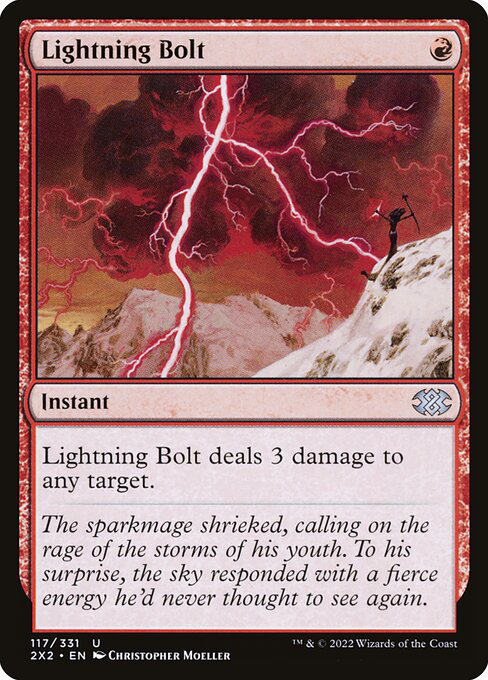

In [45]:
from PIL import Image
from IPython.display import display

# Open the image
img_path = "magic_data/Used/R/Lightning Bolt_normal.jpg"
img = Image.open(img_path)

# Get the size of the image
width, height = img.size

print(f"Image size: {width} x {height}")

# Display the image
display(img)

Let's also try removing the top of the card. This will help us check if the neural network is focussing on the color symbols in the top right of the card. 

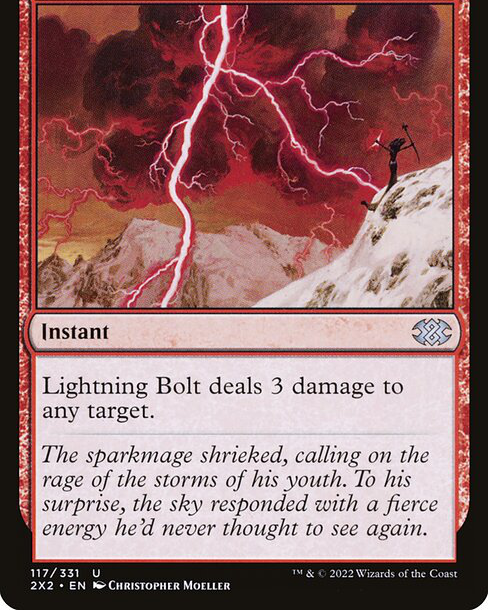

In [51]:
def remove_top_horizontal(image_path, output_path, removal_height, display_image=False):
    # Open the image
    img = Image.open(image_path)

    # Get the dimensions of the original image
    original_width, original_height = img.size

    # Calculate the coordinates for the top portion to be removed
    left = 0
    top = removal_height
    right = original_width
    bottom = original_height

    # Crop the image, excluding the top portion
    img_removed = img.crop((left, top, right, bottom))

    # Save the modified image
    img_removed.save(output_path)
    
    # Display modified image
    if display_image:
        display(img_removed)
        
# Create Test directory 
test_directory = "magic_data/Test"
os.makedirs(test_directory, exist_ok=True)

# Example 
image_path = "magic_data/Used/R/Lightning Bolt_normal.jpg"
output_path = "magic_data/Test/Lightning_Bolt_removed_horizontal.jpg"
removal_height = 70  

remove_top_horizontal(image_path, output_path, removal_height, display_image=True)

This horizontal crop seemed to work well, let's make a seperate dataset called `Crop` which will store all the cropped image versions. This will give use the flexability to use a dataset without the color symbols moving forward.  

In [52]:
def process_images(source_directory, destination_directory, removal_height):
    # Create the destination directory if it doesn't exist
    os.makedirs(destination_directory, exist_ok=True)

    # Iterate through each subdirectory (W, U, B, R, G, colorless)
    for subdirectory in os.listdir(source_directory):
        subdirectory_path = os.path.join(source_directory, subdirectory)

        # Skip if it's not a directory
        if not os.path.isdir(subdirectory_path):
            continue

        # Create a corresponding subdirectory in the destination directory
        destination_subdirectory = os.path.join(destination_directory, subdirectory)
        os.makedirs(destination_subdirectory, exist_ok=True)

        # Iterate through each image in the subdirectory
        for filename in os.listdir(subdirectory_path):
            if filename.endswith(".jpg"):
                # Get the paths for the source and destination images
                source_image_path = os.path.join(subdirectory_path, filename)
                destination_image_path = os.path.join(destination_subdirectory, filename)

                # Apply the remove_top_horizontal function
                remove_top_horizontal(source_image_path, destination_image_path, removal_height)

# Create Crop directory 
crop_directory = "magic_data/Crop"
os.makedirs(crop_directory, exist_ok=True)                
                
# Set the source and destination directories
source_directory = "magic_data/Used"
destination_directory = "magic_data/Crop"
removal_height = 70

# Process the images
process_images(source_directory, destination_directory, removal_height)

At this point, we have two directories `Used` and `Crop`, which have all the card images uncropped and cropped respectively. These directories are also stored by color, which allows us to maintain our targetted value. 

## II. Data Preprocessing 

Let's begin by defining a standard image size. Having a smaller image will allow our model to run faster, and ensuring it is a square will allow us to apply transformations to the images in a much simpler manner if we deem that to be necessary in the future. 

In [47]:
# Declare image size 
image_height = 32
image_width = 32
# image_height = height
# image_width = width
image_depth = 3

Next, we can create a preprocessing function that will flatten and standardize the images. Note that we will not be using one-hot encoding, since we plan on using `sparse_categorical_crossentropy`.

In [48]:
# Create a function to process the data
def preprocess_data(x, y):
    x = tf.image.resize(x, (image_height, image_width))  # Resize images
    x = tf.reshape(x, (len(x), image_height, image_width, image_depth))
    x = tf.image.per_image_standardization(x)  # Standardize pixel values
    y = tf.cast(y, tf.int32)  # Convert labels to integers
    return x, y

### Uncropped

Now we want to split the data into training and validation datasets. This can be easily done with `image_dataset_from_directory`, which will split the images while maintaining the 6 classes. Both of these will be 20% of the total data. 

In [49]:
from tensorflow.keras.utils import image_dataset_from_directory
import tensorflow as tf

# Create training data
print('Creating Training Dataset\n')
train_ds = image_dataset_from_directory(directory=used_directory,
                                        validation_split=0.2,
                                        subset='training',
                                        seed=0,
                                        image_size=(image_height, image_width),
                                        label_mode='int',
                                        #batch_size=batch_size,
                                        #image_batch_size=batch_size,
                                        shuffle=True,
                                        smart_resize=False)

# Apply the preprocessing function to the training dataset
train_ds = train_ds.map(preprocess_data)

# Create validation data
print('\nCreating Validation Dataset\n')
val_ds = image_dataset_from_directory(directory=used_directory,
                                      validation_split=0.2,
                                      subset='validation',
                                      seed=0,
                                      image_size=(image_height, image_width),
                                      label_mode='int',
                                      #batch_size=batch_size,
                                      #image_batch_size=batch_size,
                                      shuffle=True,
                                      smart_resize=False)

# Apply the preprocessing function to the validation dataset
val_ds = val_ds.map(preprocess_data)

Creating Training Dataset

Found 20039 files belonging to 6 classes.
Using 16032 files for training.

Creating Validation Dataset

Found 20039 files belonging to 6 classes.
Using 4007 files for validation.


### Cropped

Let's do the same for the cropped data. 

In [54]:
# Create cropped training data
print('Creating Cropped Training Dataset\n')
crop_train_ds = image_dataset_from_directory(directory=crop_directory,
                                        validation_split=0.2,
                                        subset='training',
                                        seed=0,
                                        image_size=(image_height, image_width),
                                        label_mode='int',
                                        #batch_size=batch_size,
                                        #image_batch_size=batch_size,
                                        shuffle=True,
                                        smart_resize=False)

# Apply the preprocessing function to the training dataset
crop_train_ds = crop_train_ds.map(preprocess_data)

# Create cropped validation data
print('\nCreating Cropped Validation Dataset\n')
crop_val_ds = image_dataset_from_directory(directory=crop_directory,
                                      validation_split=0.2,
                                      subset='validation',
                                      seed=0,
                                      image_size=(image_height, image_width),
                                      label_mode='int',
                                      #batch_size=batch_size,
                                      #image_batch_size=batch_size,
                                      shuffle=True,
                                      smart_resize=False)

# Apply the preprocessing function to the validation dataset
crop_val_ds = crop_val_ds.map(preprocess_data)

Creating Cropped Training Dataset

Found 20039 files belonging to 6 classes.
Using 16032 files for training.

Creating Cropped Validation Dataset

Found 20039 files belonging to 6 classes.
Using 4007 files for validation.


With the datasets properly split, we can move on to using neural networks.

## III. Benchmarking

Let's create a simple sequential model with a single dense layer to see how our model behaves. 

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Build the logistic regression model
benchmark = Sequential()
benchmark.add(Flatten(input_shape=(image_height, image_width, image_depth)))
benchmark.add(Dense(units=6, activation='softmax'))

# Compile the model
benchmark.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
benchmark.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/10
501/501 [==============================] - 108s 212ms/step - loss: 0.2772 - accuracy: 0.9172 - val_loss: 0.0989 - val_accuracy: 0.9748
Epoch 2/10
501/501 [==============================] - 106s 209ms/step - loss: 0.0738 - accuracy: 0.9809 - val_loss: 0.0653 - val_accuracy: 0.9843
Epoch 3/10
501/501 [==============================] - 110s 217ms/step - loss: 0.0463 - accuracy: 0.9873 - val_loss: 0.0662 - val_accuracy: 0.9803
Epoch 4/10
501/501 [==============================] - 92s 180ms/step - loss: 0.0356 - accuracy: 0.9907 - val_loss: 0.0528 - val_accuracy: 0.9853
Epoch 5/10
501/501 [==============================] - 112s 221ms/step - loss: 0.0232 - accuracy: 0.9945 - val_loss: 0.0501 - val_accuracy: 0.9845
Epoch 6/10
501/501 [==============================] - 150s 296ms/step - loss: 0.0194 - accuracy: 0.9951 - val_loss: 0.0440 - val_accuracy: 0.9860
Epoch 7/10
501/501 [==============================] - 106s 210ms/step - loss: 0.0174 - accuracy: 0.9951 - val_loss: 0.0545 - 

Here we see the model is highly accurate with both the validation and training data. This might indicate major flaws in our model through overfitting or an improper learning rate, and could also indicate that the data itself is flawed based on the data split. It also indicates that the model may simply be memorizing the cards. When we look at the actual loss values, we see that the validation loss is much larger than the training loss in the later epochs, which is another good indicator of overfitting. 

Let's also try the same process on the cropped data. 

In [56]:
# Compile the model
benchmark.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
benchmark.fit(crop_train_ds, epochs=epochs, validation_data=crop_val_ds)

Epoch 1/10
501/501 [==============================] - 48s 94ms/step - loss: 0.2765 - accuracy: 0.9261 - val_loss: 0.1329 - val_accuracy: 0.9648
Epoch 2/10
501/501 [==============================] - 48s 94ms/step - loss: 0.0888 - accuracy: 0.9740 - val_loss: 0.1046 - val_accuracy: 0.9725
Epoch 3/10
501/501 [==============================] - 43s 85ms/step - loss: 0.0510 - accuracy: 0.9851 - val_loss: 0.1124 - val_accuracy: 0.9743
Epoch 4/10
501/501 [==============================] - 47s 92ms/step - loss: 0.0378 - accuracy: 0.9879 - val_loss: 0.0812 - val_accuracy: 0.9758
Epoch 5/10
501/501 [==============================] - 49s 97ms/step - loss: 0.0289 - accuracy: 0.9913 - val_loss: 0.0862 - val_accuracy: 0.9760
Epoch 6/10
501/501 [==============================] - 46s 90ms/step - loss: 0.0234 - accuracy: 0.9922 - val_loss: 0.0775 - val_accuracy: 0.9795
Epoch 7/10
501/501 [==============================] - 47s 92ms/step - loss: 0.0216 - accuracy: 0.9930 - val_loss: 0.1150 - val_accuracy:

We get similar results for cropped data. This is a good first step and infering that the color symbol in the top right corner is not the defining factor for the model. 

## IV. Models

Let's begin with a model we know to work well, which is the `MiniVGGNet` model. This model is not the most complex, but given our overwelming success from just the benchmark, it is unlikely we will need anything more complex that this. 

### MiniVGGNet

In [57]:
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.layers import Reshape

As a first test let's use `MiniVGGNet` from class. 

In [58]:
class MiniVGGNet:
    def build(height, width, depth, classes):
        model = Sequential(name = 'MiniVGGNet')
        
        model.add(Reshape((height, width, depth)))
        model.add(Rescaling(1./255))
        
        model.add(Conv2D(32, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        model.add(Conv2D(32, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        model.add(Conv2D(64, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        model.add(Conv2D(64, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        model.add(Flatten())
        
        model.add(Dense(512))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        
        return model

### Uncropped MiniVGGNet 

When we are building the model, we have to make sure we change the number of classes to 6 to match our classification. 


Training Model

Epoch 1/10
501/501 [==============================] - 203s 397ms/step - loss: 0.3092 - accuracy: 0.9054 - val_loss: 4.2865 - val_accuracy: 0.3072
Epoch 2/10
501/501 [==============================] - 219s 434ms/step - loss: 0.0916 - accuracy: 0.9717 - val_loss: 0.0636 - val_accuracy: 0.9850
Epoch 3/10
501/501 [==============================] - 227s 450ms/step - loss: 0.0637 - accuracy: 0.9798 - val_loss: 0.1105 - val_accuracy: 0.9648
Epoch 4/10
501/501 [==============================] - 221s 438ms/step - loss: 0.0559 - accuracy: 0.9815 - val_loss: 0.0359 - val_accuracy: 0.9883
Epoch 5/10
501/501 [==============================] - 213s 422ms/step - loss: 0.0434 - accuracy: 0.9866 - val_loss: 0.0694 - val_accuracy: 0.9803
Epoch 6/10
501/501 [==============================] - 208s 412ms/step - loss: 0.0432 - accuracy: 0.9868 - val_loss: 0.0691 - val_accuracy: 0.9760
Epoch 7/10
501/501 [==============================] - 249s 493ms/step - loss: 0.0351 - accuracy: 0.9886 - v

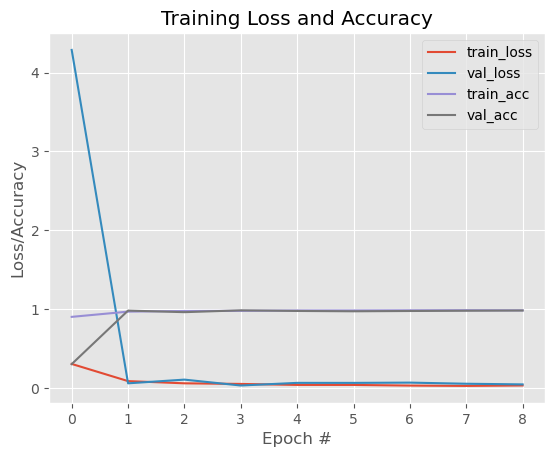

In [59]:
# Build a model
model = MiniVGGNet.build(image_height, image_width, image_depth, 6)

# Prepare the model for training
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Declare early stopping
early_stopper = EarlyStopping(patience=5, restore_best_weights=True)

# Fit the data to the training set
print('\nTraining Model\n')
H = model.fit(train_ds, validation_data=val_ds, epochs=epochs, verbose=1, callbacks=[early_stopper])

# Predict and evaluate on the validation dataset
print('\nEvaluating Model on Validation Dataset\n')
val_metrics = model.evaluate(val_ds)
print(f"Validation Loss: {val_metrics[0]}, Validation Accuracy: {val_metrics[1]}")

# Plot the training loss and accuracy
stopping_epoch = len(H.history['loss'])
plt.style.use('ggplot')
plt.figure()
plt.plot(range(stopping_epoch), H.history['loss'], label='train_loss')
plt.plot(range(stopping_epoch), H.history['val_loss'], label='val_loss')
plt.plot(range(stopping_epoch), H.history['accuracy'], label='train_acc')
plt.plot(range(stopping_epoch), H.history['val_accuracy'], label='val_acc')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

### Cropped MiniVGGNet


Training Model

Epoch 1/10
501/501 [==============================] - 139s 271ms/step - loss: 0.2609 - accuracy: 0.9167 - val_loss: 4.0324 - val_accuracy: 0.2141
Epoch 2/10
501/501 [==============================] - 135s 269ms/step - loss: 0.0807 - accuracy: 0.9742 - val_loss: 0.1393 - val_accuracy: 0.9598
Epoch 3/10
501/501 [==============================] - 136s 271ms/step - loss: 0.0609 - accuracy: 0.9801 - val_loss: 0.0922 - val_accuracy: 0.9765
Epoch 4/10
501/501 [==============================] - 131s 261ms/step - loss: 0.0497 - accuracy: 0.9843 - val_loss: 0.0847 - val_accuracy: 0.9763
Epoch 5/10
501/501 [==============================] - 139s 276ms/step - loss: 0.0439 - accuracy: 0.9850 - val_loss: 0.0396 - val_accuracy: 0.9888
Epoch 6/10
501/501 [==============================] - 143s 285ms/step - loss: 0.0399 - accuracy: 0.9858 - val_loss: 0.0679 - val_accuracy: 0.9855
Epoch 7/10
501/501 [==============================] - 142s 283ms/step - loss: 0.0309 - accuracy: 0.9903 - v

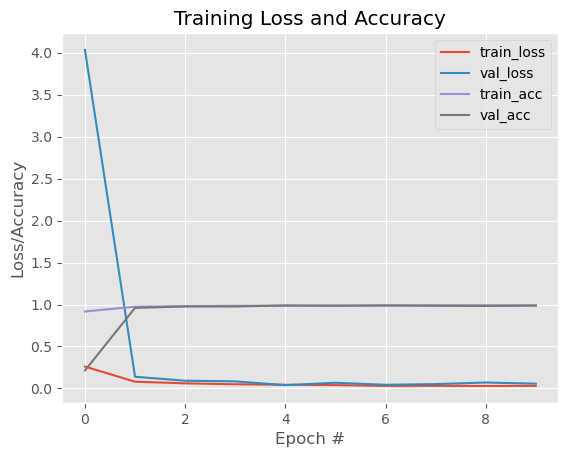

In [60]:
# Build a model
model = MiniVGGNet.build(image_height, image_width, image_depth, 6)

# Prepare the model for training
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Declare early stopping
early_stopper = EarlyStopping(patience=5, restore_best_weights=True)

# Fit the data to the training set
print('\nTraining Model\n')
H = model.fit(crop_train_ds, validation_data=crop_val_ds, epochs=epochs, verbose=1, callbacks=[early_stopper])

# Predict and evaluate on the validation dataset
print('\nEvaluating Model on Validation Dataset\n')
val_metrics = model.evaluate(crop_val_ds)
print(f"Validation Loss: {val_metrics[0]}, Validation Accuracy: {val_metrics[1]}")

# Plot the training loss and accuracy
stopping_epoch = len(H.history['loss'])
plt.style.use('ggplot')
plt.figure()
plt.plot(range(stopping_epoch), H.history['loss'], label='train_loss')
plt.plot(range(stopping_epoch), H.history['val_loss'], label='val_loss')
plt.plot(range(stopping_epoch), H.history['accuracy'], label='train_acc')
plt.plot(range(stopping_epoch), H.history['val_accuracy'], label='val_acc')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

Usually at this point, the accuracy might be terrible, and we would be left to focus on hyperparameter tuning to achieve a better accuracy. However, for this specific case we have found that our models, including the benchmark, are very good at predicting the card color. Because of this, let's try focussing on making our model as small and efficient as possible, rather than trying to increase our accuracy by neglegible amounts. 

In addition, since we have achieved similar results between the cropped and uncropped data, it is reasonable to infer that the color symbol in the top right corner of the magic card is not necessary when determining the card color.

### Simple CNN

Let's try simplifying this to the smallest CNN possible and see if we achieve similar results. 

In [61]:
class SimpleCNN:
    def build(height, width, depth, classes):
        model = Sequential(name='SimpleCNN')

        model.add(Conv2D(32, (3, 3), activation='relu',
                         input_shape=(height, width, depth)))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Flatten())
        model.add(Dense(classes, activation='softmax'))

        return model


Training Model

Epoch 1/10
501/501 [==============================] - 119s 235ms/step - loss: 0.2637 - accuracy: 0.9209 - val_loss: 0.0735 - val_accuracy: 0.9808
Epoch 2/10
501/501 [==============================] - 109s 214ms/step - loss: 0.0536 - accuracy: 0.9857 - val_loss: 0.0511 - val_accuracy: 0.9853
Epoch 3/10
501/501 [==============================] - 107s 210ms/step - loss: 0.0321 - accuracy: 0.9905 - val_loss: 0.0317 - val_accuracy: 0.9895
Epoch 4/10
501/501 [==============================] - 101s 198ms/step - loss: 0.0250 - accuracy: 0.9923 - val_loss: 0.0376 - val_accuracy: 0.9873
Epoch 5/10
501/501 [==============================] - 116s 228ms/step - loss: 0.0112 - accuracy: 0.9971 - val_loss: 0.0210 - val_accuracy: 0.9928
Epoch 6/10
501/501 [==============================] - 117s 230ms/step - loss: 0.0066 - accuracy: 0.9986 - val_loss: 0.0216 - val_accuracy: 0.9933
Epoch 7/10
501/501 [==============================] - 99s 195ms/step - loss: 0.0110 - accuracy: 0.9966 - va

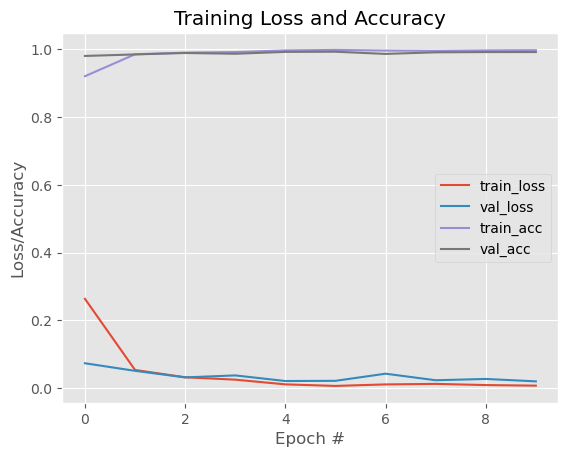

In [62]:
# Build a model
model = SimpleCNN.build(image_height, image_width, image_depth, 6)

# Prepare the model for training
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Declare early stopping
early_stopper = EarlyStopping(patience=5, restore_best_weights=True)

# Fit the data to the training set
print('\nTraining Model\n')
H = model.fit(train_ds, validation_data=val_ds, epochs=epochs, verbose=1, callbacks=[early_stopper])

# Predict and evaluate on the validation dataset
print('\nEvaluating Model on Validation Dataset\n')
val_metrics = model.evaluate(val_ds)
print(f"Validation Loss: {val_metrics[0]}, Validation Accuracy: {val_metrics[1]}")

# Plot the training loss and accuracy
stopping_epoch = len(H.history['loss'])
plt.style.use('ggplot')
plt.figure()
plt.plot(range(stopping_epoch), H.history['loss'], label='train_loss')
plt.plot(range(stopping_epoch), H.history['val_loss'], label='val_loss')
plt.plot(range(stopping_epoch), H.history['accuracy'], label='train_acc')
plt.plot(range(stopping_epoch), H.history['val_accuracy'], label='val_acc')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

Here our results are still phenominal. Since our model cannot really be simplified further, let's reduce the image size we are using. Hopefully this will help speed up the process by reducing the number of operations required.

### Simple CNN Reduced Size (16 x 16 x 3)

Well, our model still looks good, let's see how much further we can push this. We can further reduce the image size, which might also help increase the speed of model. Since we haven't seen any significant difference between the cropped and uncropped data in terms of performance, let's stick to using the uncropped version. 

In [85]:
# Declare reduced image size 
reduced_image_height = 16
reduced_image_width = 16
image_depth = 3

In [86]:
# Create a function to process the reduced data
def reduced_preprocess_data(x, y):
    print(f"Original shape: {x.shape}")
    x = tf.image.resize(x, (reduced_image_height, reduced_image_width))  # Resize images
    print(f"Resized shape: {x.shape}")
    x = tf.reshape(x, (len(x), reduced_image_height, reduced_image_width, image_depth))
    x = tf.image.per_image_standardization(x)  # Standardize pixel values
    print(f"Final shape: {x.shape}")
    y = tf.cast(y, tf.int32)  # Convert labels to integers
    return x, y

In [87]:
# Create a reduced CNN, which is identical to SimpleCNN except for the Conv2D layer being adjustable
class ReducedSimpleCNN:
    def build(height, width, depth, classes, layers):
        model = Sequential(name='ReducedSimpleCNN')

        model.add(Conv2D(layers, (3, 3), activation='relu', input_shape=(height, width, depth)))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Flatten())
        model.add(Dense(classes, activation='softmax'))

        return model

In [88]:
# Create reduced training data
print('Creating Training Dataset\n')
reduced_train_ds = image_dataset_from_directory(directory=used_directory,
                                        validation_split=0.2,
                                        subset='training',
                                        seed=0,
                                        image_size=(reduced_image_height, reduced_image_width),
                                        label_mode='int',
                                        #batch_size=batch_size,
                                        #image_batch_size=batch_size,
                                        shuffle=True,
                                        smart_resize=False)

# Apply the preprocessing function to the training dataset
reduced_train_ds = reduced_train_ds.map(reduced_preprocess_data)

# Create validation data
print('\nCreating Validation Dataset\n')
reduced_val_ds = image_dataset_from_directory(directory=used_directory,
                                      validation_split=0.2,
                                      subset='validation',
                                      seed=0,
                                      image_size=(reduced_image_height, reduced_image_width),
                                      label_mode='int',
                                      #batch_size=batch_size,
                                      #image_batch_size=batch_size,
                                      shuffle=True,
                                      smart_resize=False)

# Apply the preprocessing function to the validation dataset
reduced_val_ds = reduced_val_ds.map(reduced_preprocess_data)

Creating Training Dataset

Found 20039 files belonging to 6 classes.
Using 16032 files for training.
Original shape: (None, 16, 16, 3)
Resized shape: (None, 16, 16, 3)
Final shape: (None, 16, 16, 3)

Creating Validation Dataset

Found 20039 files belonging to 6 classes.
Using 4007 files for validation.
Original shape: (None, 16, 16, 3)
Resized shape: (None, 16, 16, 3)
Final shape: (None, 16, 16, 3)



Training Model

Epoch 1/10
501/501 [==============================] - 99s 193ms/step - loss: 0.9214 - accuracy: 0.6855 - val_loss: 0.5216 - val_accuracy: 0.8410
Epoch 2/10
501/501 [==============================] - 94s 186ms/step - loss: 0.4003 - accuracy: 0.8846 - val_loss: 0.3698 - val_accuracy: 0.8810
Epoch 3/10
501/501 [==============================] - 95s 188ms/step - loss: 0.2790 - accuracy: 0.9188 - val_loss: 0.2572 - val_accuracy: 0.9264
Epoch 4/10
501/501 [==============================] - 95s 186ms/step - loss: 0.2205 - accuracy: 0.9374 - val_loss: 0.2371 - val_accuracy: 0.9246
Epoch 5/10
501/501 [==============================] - 98s 193ms/step - loss: 0.1846 - accuracy: 0.9472 - val_loss: 0.2064 - val_accuracy: 0.9359
Epoch 6/10
501/501 [==============================] - 95s 187ms/step - loss: 0.1603 - accuracy: 0.9555 - val_loss: 0.2474 - val_accuracy: 0.9137
Epoch 7/10
501/501 [==============================] - 95s 188ms/step - loss: 0.1463 - accuracy: 0.9583 - val_loss

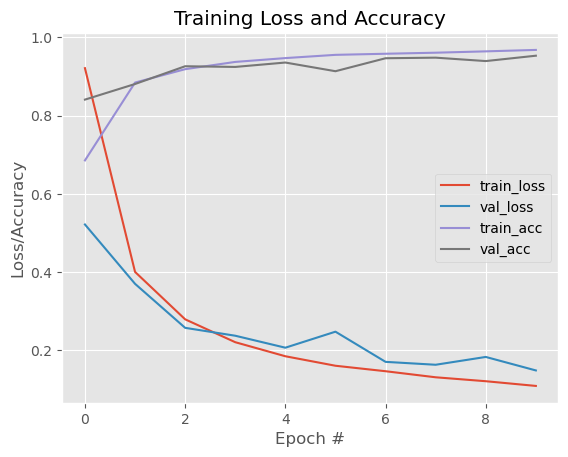

In [89]:
# Build a model
model = ReducedSimpleCNN.build(reduced_image_height, reduced_image_width, image_depth, 6, 16)

# Prepare the model for training
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Declare early stopping
early_stopper = EarlyStopping(patience=5, restore_best_weights=True)

# Fit the data to the training set
print('\nTraining Model\n')
H = model.fit(reduced_train_ds, validation_data=reduced_val_ds, epochs=epochs, verbose=1, callbacks=[early_stopper])

# Predict and evaluate on the validation dataset
print('\nEvaluating Model on Validation Dataset\n')
val_metrics = model.evaluate(reduced_val_ds)
print(f"Validation Loss: {val_metrics[0]}, Validation Accuracy: {val_metrics[1]}")

# Plot the training loss and accuracy
stopping_epoch = len(H.history['loss'])
plt.style.use('ggplot')
plt.figure()
plt.plot(range(stopping_epoch), H.history['loss'], label='train_loss')
plt.plot(range(stopping_epoch), H.history['val_loss'], label='val_loss')
plt.plot(range(stopping_epoch), H.history['accuracy'], label='train_acc')
plt.plot(range(stopping_epoch), H.history['val_accuracy'], label='val_acc')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

We there is a slight dip in the accuracy, from 99% to 95%, but other than that the model looks pretty good. Let's try taking it a step further.

### Simple CNN Reduced Size (4 x 4 x 3)

Let's be honest here, 4 by 4 is really small. If we start going lower, we will encounter some issues with the neural networks itself, such as the MaxPooling layer not having enough data to work with. This is defintely ambitious, but it's worth a shot. 

In [93]:
# Declare reduced image size 
reduced_image_height = 4
reduced_image_width = 4
image_depth = 3

In [94]:
# Create reduced training data
print('Creating Training Dataset\n')
reduced_train_ds = image_dataset_from_directory(directory=used_directory,
                                        validation_split=0.2,
                                        subset='training',
                                        seed=0,
                                        image_size=(reduced_image_height, reduced_image_width),
                                        label_mode='int',
                                        #batch_size=batch_size,
                                        #image_batch_size=batch_size,
                                        shuffle=True,
                                        smart_resize=False)

# Apply the preprocessing function to the training dataset
reduced_train_ds = reduced_train_ds.map(reduced_preprocess_data)

# Create validation data
print('\nCreating Validation Dataset\n')
reduced_val_ds = image_dataset_from_directory(directory=used_directory,
                                      validation_split=0.2,
                                      subset='validation',
                                      seed=0,
                                      image_size=(reduced_image_height, reduced_image_width),
                                      label_mode='int',
                                      #batch_size=batch_size,
                                      #image_batch_size=batch_size,
                                      shuffle=True,
                                      smart_resize=False)

# Apply the preprocessing function to the validation dataset
reduced_val_ds = reduced_val_ds.map(reduced_preprocess_data)

Creating Training Dataset

Found 20039 files belonging to 6 classes.
Using 16032 files for training.
Original shape: (None, 4, 4, 3)
Resized shape: (None, 4, 4, 3)
Final shape: (None, 4, 4, 3)

Creating Validation Dataset

Found 20039 files belonging to 6 classes.
Using 4007 files for validation.
Original shape: (None, 4, 4, 3)
Resized shape: (None, 4, 4, 3)
Final shape: (None, 4, 4, 3)



Training Model

Epoch 1/10
501/501 [==============================] - 92s 180ms/step - loss: 1.7244 - accuracy: 0.2873 - val_loss: 1.5047 - val_accuracy: 0.4659
Epoch 2/10
501/501 [==============================] - 91s 180ms/step - loss: 1.3782 - accuracy: 0.4997 - val_loss: 1.2748 - val_accuracy: 0.5096
Epoch 3/10
501/501 [==============================] - 93s 183ms/step - loss: 1.2166 - accuracy: 0.5223 - val_loss: 1.1690 - val_accuracy: 0.5251
Epoch 4/10
501/501 [==============================] - 92s 182ms/step - loss: 1.1443 - accuracy: 0.5393 - val_loss: 1.1179 - val_accuracy: 0.5386
Epoch 5/10
501/501 [==============================] - 93s 183ms/step - loss: 1.1068 - accuracy: 0.5429 - val_loss: 1.0890 - val_accuracy: 0.5428
Epoch 6/10
501/501 [==============================] - 93s 182ms/step - loss: 1.0833 - accuracy: 0.5420 - val_loss: 1.0699 - val_accuracy: 0.5433
Epoch 7/10
501/501 [==============================] - 91s 180ms/step - loss: 1.0659 - accuracy: 0.5470 - val_loss

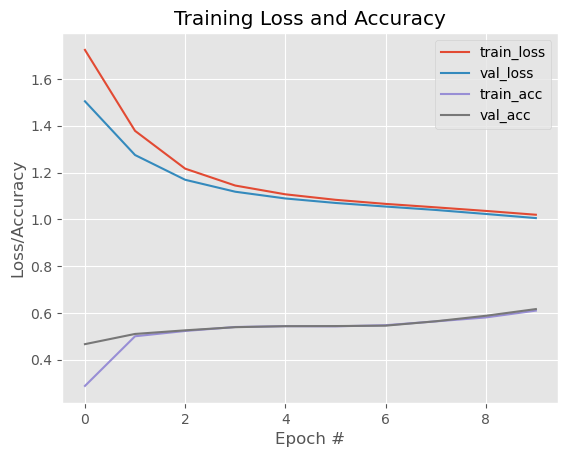

In [95]:
# Build a model
model = ReducedSimpleCNN.build(reduced_image_height, reduced_image_width, image_depth, 6, 3)

# Prepare the model for training
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Declare early stopping
early_stopper = EarlyStopping(patience=5, restore_best_weights=True)

# Fit the data to the training set
print('\nTraining Model\n')
H = model.fit(reduced_train_ds, validation_data=reduced_val_ds, epochs=epochs, verbose=1, callbacks=[early_stopper])

# Predict and evaluate on the validation dataset
print('\nEvaluating Model on Validation Dataset\n')
val_metrics = model.evaluate(reduced_val_ds)
print(f"Validation Loss: {val_metrics[0]}, Validation Accuracy: {val_metrics[1]}")

# Plot the training loss and accuracy
stopping_epoch = len(H.history['loss'])
plt.style.use('ggplot')
plt.figure()
plt.plot(range(stopping_epoch), H.history['loss'], label='train_loss')
plt.plot(range(stopping_epoch), H.history['val_loss'], label='val_loss')
plt.plot(range(stopping_epoch), H.history['accuracy'], label='train_acc')
plt.plot(range(stopping_epoch), H.history['val_accuracy'], label='val_acc')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

As expected, the accuracy dipped significantly here, with only around 60% accuracy. We have definitely reached a limit on input size. In terms of runtime, we are definitely getting diminishing returns, with the runtime only being reduced by a couple of seconds, at the cost of accuracy. At the end of the day, it is simply not worth it to push the model to its limits when we can achieve such good results in a similar timeframe by using a 32 x 32 image.  

## V. Predicting a New Card

Let's try predicting the color of a single card. With Magic the Gathering periodically releasing new cards, we have access to some data which is not yet part of the database. Let's use the card `Spelunking` as an example. 

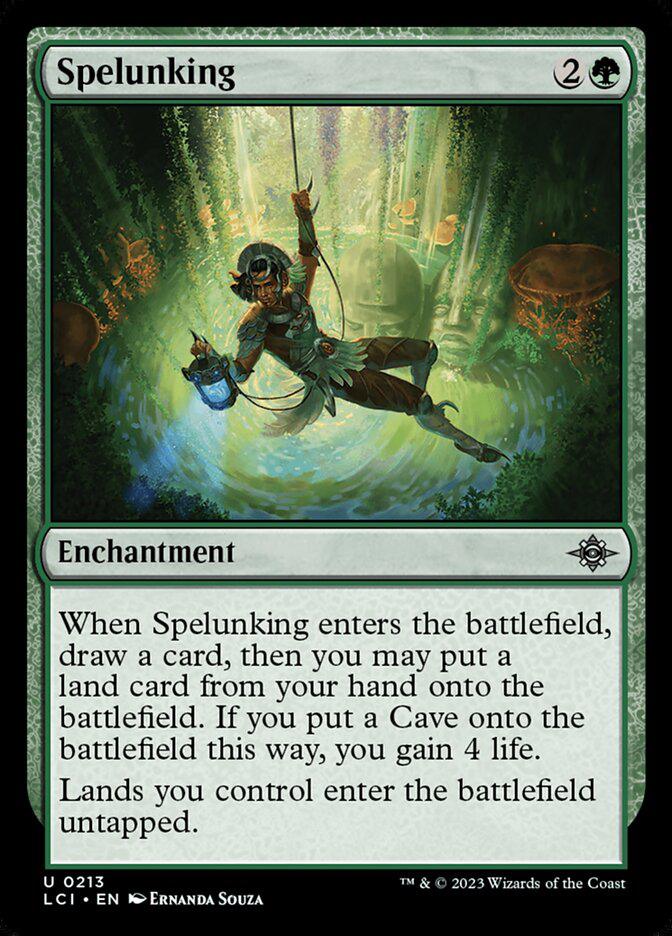

Image Size: (672, 936)


In [109]:
# Declare the path to the image
single_image_path = 'magic_data/lci-213-spelunking.jpeg'

# Display the card
img = Image.open(single_image_path)
display(img)

# Display the size
img_size = img.size
print(f"Image Size: {img_size}")

Note that this card image is a different format and size from our original images, being a 672 x 936 `jpeg`. This shows the versitality of our code, which through reshaping can process images of different sizes. We also want to make sure to use our better performing models, so let's reuse our 32 x 32 input SimpleCNN model.

In [114]:
# Build a model
model = SimpleCNN.build(image_height, image_width, image_depth, 6)

# Prepare the model for training
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Declare early stopping
early_stopper = EarlyStopping(patience=5, restore_best_weights=True)

# Fit the data to the training set
print('\nTraining Model\n')
H = model.fit(train_ds, validation_data=val_ds, epochs=epochs, verbose=1, callbacks=[early_stopper])

# Predict and evaluate on the validation dataset
print('\nEvaluating Model on Validation Dataset\n')
val_metrics = model.evaluate(val_ds)
print(f"Validation Loss: {val_metrics[0]}, Validation Accuracy: {val_metrics[1]}")


Training Model

Epoch 1/10
501/501 [==============================] - 117s 231ms/step - loss: 0.2440 - accuracy: 0.9260 - val_loss: 0.0645 - val_accuracy: 0.9815
Epoch 2/10
501/501 [==============================] - 110s 217ms/step - loss: 0.0569 - accuracy: 0.9845 - val_loss: 0.0503 - val_accuracy: 0.9855
Epoch 3/10
501/501 [==============================] - 112s 220ms/step - loss: 0.0309 - accuracy: 0.9905 - val_loss: 0.1321 - val_accuracy: 0.9566
Epoch 4/10
501/501 [==============================] - 120s 237ms/step - loss: 0.0235 - accuracy: 0.9926 - val_loss: 0.0353 - val_accuracy: 0.9903
Epoch 5/10
501/501 [==============================] - 109s 215ms/step - loss: 0.0138 - accuracy: 0.9956 - val_loss: 0.0281 - val_accuracy: 0.9905
Epoch 6/10
501/501 [==============================] - 109s 213ms/step - loss: 0.0173 - accuracy: 0.9939 - val_loss: 0.0282 - val_accuracy: 0.9913
Epoch 7/10
501/501 [==============================] - 108s 212ms/step - loss: 0.0050 - accuracy: 0.9984 - v

Now we can predict the card color from the model. 

In [116]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import os

# Load the image
img = image.load_img(single_image_path, target_size=(image_height, image_width))

# Convert the image to a NumPy array
img_array = image.img_to_array(img)

# Reshape and preprocess the image (same as preprocess)
img_array = tf.image.resize(img_array, (image_height, image_width))
img_array = tf.expand_dims(img_array, axis=0) 
img_array = tf.image.per_image_standardization(img_array)

# Predict using the model
predictions = model.predict(img_array)

# Obtain the predicted class
predicted_class = tf.argmax(predictions, axis=1).numpy()

# Obtain the prediction probability
probabilities = tf.nn.softmax(predictions).numpy()[0]

# Retrieve class names from directory structure
class_names = sorted([dirname for dirname in os.listdir(used_directory) if os.path.isdir(os.path.join(used_directory, dirname))])

print(f"Predicted class: {predicted_class}")

if predicted_class[0] < len(class_names):
    predicted_color = class_names[predicted_class[0]]
    print(f"Predicted color: {predicted_color}\n")
    
    # Display probabilities for each class
    for i, prob in enumerate(probabilities):
        print(f"Probability of {class_names[i]}: {prob:.4f}")
        
else:
    print("Unable to determine predicted color.")

1/1 [==============================] - 0s 109ms/step
Predicted class: [1]
Predicted color: G

Probability of B: 0.1296
Probability of G: 0.3522
Probability of R: 0.1296
Probability of U: 0.1296
Probability of W: 0.1296
Probability of colorless: 0.1296


From our model, it seems we are acurately able to predict the card color to be green, with a certainty of 35%. Although this is not the best probablilty, it is miles ahead of the probablity of any other color, all of which are within the same 13% range. This is a good indicator that our model will consistently find the correct color, and maintain the overall 99% accuracy. 

## VI. Conclusions

In conclusion, we successfully employed a convolution neural network to predict the color of cards throughout Magic the Gathering history. From the benchmark, we found that our problem was quite simple for a neural network to solve, and achieving an absurdly high 99% accuracy was feasible from the start. Because of this, our project goal evolved from reaching the highest accuracy possible to creating the smallest viable model that would still consistently predict card colors. 

After some experimentation, we found that a single Convolution layer with MaxPooling and an output Dense layer was more than enough to achieve high accuracy. We also found resizing the image to a reduced size, from 32 x 32 to 16 x 16, had a negligible impact on the model's performance, but reducing it significantly to 4 x 4 significantly impacted the overall accuracy. We also found that such optimizations of the model did not greatly help with the runtime of the model. 

Additional experiments were done to explore the neural network further. The first was the cropping of the image, which displayed that the color symbols at the top of the card were unnecessary to maintain a high accuracy. The second experiment, which employed the single-layer model, showed that a card that had not previously been introduced to the model could also be accurately classified in terms of color. This proves a certain level of versatility and usefulness that the model provides. 

Further work could be done to improve this project and the model used. First and foremost, we could attempt to augment and modify the input images to increase our model's consistency and make it more capable of handling interesting test cases such as lower-resolution card images. Secondly, one of the glaring restrictions of our model is that it only takes cards that fit under one classification and completely omits cards that feature combinations of colors. We could fix this by allowing the model to accommodate multiple categories while ensuring our training data is color-balanced through data augmentation. Finally, an exciting recommendation that did not pan out was the use of `Grad Cam` to visualize which aspect of the card was the most important for the model. Given enough time, I would have liked to get that module to work, and the insight it provides may allow the model to be further refined. All of this combined work could lead to a very robust model that could be adapted to handle user-input images of cards and create a usable UI to process card data. 